#### Instruction (Read this)
- Use this template to develop your project. Do not change the steps. 
- For each step, you may add additional cells if needed.
- But remove <b>unnecessary</b> cells to ensure the notebook is readable.
- Marks will be <b>deducted</b> if the notebook is cluttered or difficult to follow due to excess or irrelevant content.
- <b>Briefly</b> describe the steps in the "Description:" field.
- <b>Do not</b> submit the dataset. 
- The submitted jupyter notebook will be executed using the uploaded dataset in eLearn.

#### Group Information

Group No: Seismic 6

- Member 1: Lim Wen Hao
- Member 2: Goey Chew Hong
- Member 3: Lim Cong Sheng
- Member 4: Tan Jun Cheng


#### Import libraries

In [1]:
%config Completer.use_jedi=False # comment if not needed

# Import necessary libraries for data manipulation and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Import necessary libraries for machine learning
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier # for KNN
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, RobustScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text # for decision tree

# Import necessary libraries for Feature Selection and Sampling
from imblearn.over_sampling import SMOTE # for oversampling
from collections import Counter # for counting

%matplotlib inline

#### Load the dataset

From the dataset README documentation, 

**Attribute information:**
1. `seismic`: result of shift seismic hazard assessment in the mine working obtained by the seismic method (a - lack of hazard, b - low hazard, c - high hazard, d - danger state);
2. `seismoacoustic`: result of shift seismic hazard assessment in the mine working obtained by the seismoacoustic method;
3. `shift`: information about type of a shift (W - coal-getting, N -preparation shift);
4. `genergy`: seismic energy recorded within previous shift by the most active geophone (GMax) out of geophones monitoring the longwall;
5. `gpuls`: a number of pulses recorded within previous shift by GMax;
6. `gdenergy`: a deviation of energy recorded within previous shift by GMax from average energy recorded during eight previous shifts;
7. `gdpuls`: a deviation of a number of pulses recorded within previous shift by GMax from average number of pulses recorded during eight previous shifts;
8. `ghazard`: result of shift seismic hazard assessment in the mine working obtained by the seismoacoustic method based on registration coming form GMax only;
9. `nbumps`: the number of seismic bumps recorded within previous shift;
10. `nbumps2`: the number of seismic bumps (in energy range [10^2,10^3)) registered within previous shift;
11. `nbumps3`: the number of seismic bumps (in energy range [10^3,10^4)) registered within previous shift;
12. `nbumps4`: the number of seismic bumps (in energy range [10^4,10^5)) registered within previous shift;
13. `nbumps5`: the number of seismic bumps (in energy range [10^5,10^6)) registered within the last shift;
14. `nbumps6`: the number of seismic bumps (in energy range [10^6,10^7)) registered within previous shift;
15. `nbumps7`: the number of seismic bumps (in energy range [10^7,10^8)) registered within previous shift;
16. `nbumps89`: the number of seismic bumps (in energy range [10^8,10^10)) registered within previous shift;
17. `energy`: total energy of seismic bumps registered within previous shift;
18. `maxenergy`: the maximum energy of the seismic bumps registered within previous shift;
19. `class`: the decision attribute - "1" means that high energy seismic bump occurred in the next shift 

In [2]:
df = pd.read_csv("seismic-bumps.csv")
df.sample(10)

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,ghazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,class
505,a,b,W,26800,306,-44,-26,a,1,0,0,1,0,0,0,0,10000,10000,0
2437,a,a,N,3160,73,-75,-70,a,0,0,0,0,0,0,0,0,0,0,0
2094,a,a,N,6860,282,-45,13,a,0,0,0,0,0,0,0,0,0,0,0
2460,b,a,W,6580,161,-75,-63,a,0,0,0,0,0,0,0,0,0,0,0
1754,a,a,N,5600,344,-44,-1,a,0,0,0,0,0,0,0,0,0,0,0
133,a,a,N,65800,259,-58,-49,a,1,0,1,0,0,0,0,0,4000,4000,0
828,a,b,N,68200,137,-5,-38,a,0,0,0,0,0,0,0,0,0,0,0
2380,a,a,W,19680,411,-38,-3,a,2,0,2,0,0,0,0,0,10000,8000,0
712,b,a,W,166220,1762,7,20,a,0,0,0,0,0,0,0,0,0,0,1
2512,a,a,W,10910,269,-30,-5,a,1,0,1,0,0,0,0,0,1000,1000,1


From the sample we got, `class` column consists only 0 and 1 which is the target label column.

In [3]:
# Summarize the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2584 entries, 0 to 2583
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   seismic         2584 non-null   object
 1   seismoacoustic  2584 non-null   object
 2   shift           2584 non-null   object
 3   genergy         2584 non-null   int64 
 4   gpuls           2584 non-null   int64 
 5   gdenergy        2584 non-null   int64 
 6   gdpuls          2584 non-null   int64 
 7   ghazard         2584 non-null   object
 8   nbumps          2584 non-null   int64 
 9   nbumps2         2584 non-null   int64 
 10  nbumps3         2584 non-null   int64 
 11  nbumps4         2584 non-null   int64 
 12  nbumps5         2584 non-null   int64 
 13  nbumps6         2584 non-null   int64 
 14  nbumps7         2584 non-null   int64 
 15  nbumps89        2584 non-null   int64 
 16  energy          2584 non-null   int64 
 17  maxenergy       2584 non-null   int64 
 18  class   

In [4]:
# Check for missing values
df.isnull().sum()

seismic           0
seismoacoustic    0
shift             0
genergy           0
gpuls             0
gdenergy          0
gdpuls            0
ghazard           0
nbumps            0
nbumps2           0
nbumps3           0
nbumps4           0
nbumps5           0
nbumps6           0
nbumps7           0
nbumps89          0
energy            0
maxenergy         0
class             0
dtype: int64

From the summary we get,
1. No null values found in all columns
2. There are 19 columns and 2584 records found in the dataset.

In [5]:
# Set the target variable
label = "class"
df[label].value_counts()

class
0    2414
1     170
Name: count, dtype: int64

In [6]:
# Categorize the column based on data types
categorical_df = df.select_dtypes(include='object')
categorical_df.head()

,seismic,seismoacoustic,shift,ghazard
0,a,a,N,a
1,a,a,N,a
2,a,a,N,a
3,a,a,N,a
4,a,a,N,a


In [7]:
# Categorize the column based on data types
numerical_df = df.select_dtypes(include='int64')
numerical_df.head()

,genergy,gpuls,gdenergy,gdpuls,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,class
0,15180,48,-72,-72,0,0,0,0,0,0,0,0,0,0,0
1,14720,33,-70,-79,1,0,1,0,0,0,0,0,2000,2000,0
2,8050,30,-81,-78,0,0,0,0,0,0,0,0,0,0,0
3,28820,171,-23,40,1,0,1,0,0,0,0,0,3000,3000,0
4,12640,57,-63,-52,0,0,0,0,0,0,0,0,0,0,0


From the value counts, 2414 records found with `class` = 0, and 170 records of `class` = 1.

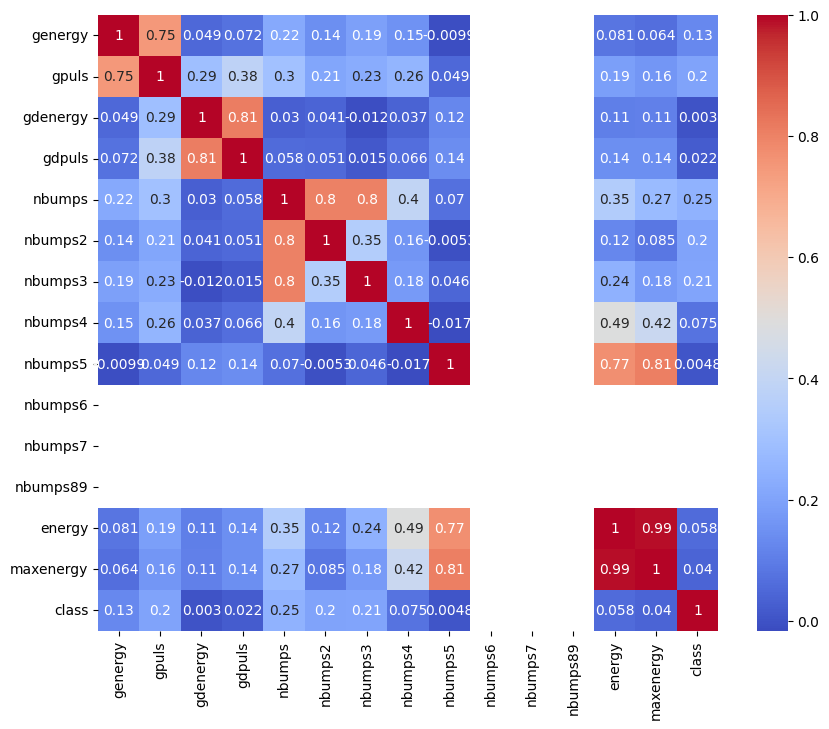

In [8]:
# Plot the correlation matrix for numerical features
corr = numerical_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

From the correlation matrix, among the features that highly correlated with each others include:
- `energy` and `maxenergy` (0.99)
- `gdpuls` and `gdenergy` (0.81)
- `nbumps5` and `maxenergy` (0.81)
- `nbumps` and `nbumps2` (0.8)
- `nbumps` and `nbumps3` (0.8)
- `nbumps5` and `energy` (0.77)
- `gpuls` and `genergy` (0.75)

Features that do not show any correlation with other classes:
- `nbumps6`
- `nbumps7`
- `nbumps89`

These features can be dropped in the subsequent steps as they do not need to be involved in the model training.

**None of the features** show direct correlation with the target column, `class`.

`class` column can be dropped from numerical DataFrame `numerical_df` as it is a target column

In [9]:
# Drop the features that are not needed for the analysis
df.drop(['nbumps89', 'nbumps7', 'nbumps6'], axis=1, inplace=True)
df.head()

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,ghazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,energy,maxenergy,class
0,a,a,N,15180,48,-72,-72,a,0,0,0,0,0,0,0,0
1,a,a,N,14720,33,-70,-79,a,1,0,1,0,0,2000,2000,0
2,a,a,N,8050,30,-81,-78,a,0,0,0,0,0,0,0,0
3,a,a,N,28820,171,-23,40,a,1,0,1,0,0,3000,3000,0
4,a,a,N,12640,57,-63,-52,a,0,0,0,0,0,0,0,0


In [10]:
# Drop the features that are not needed for the analysis and the target variable
numerical_df.drop(['nbumps89', 'nbumps7', 'nbumps6', 'class'], axis=1, inplace=True)
numerical_df.head()

,genergy,gpuls,gdenergy,gdpuls,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,energy,maxenergy
0,15180,48,-72,-72,0,0,0,0,0,0,0
1,14720,33,-70,-79,1,0,1,0,0,2000,2000
2,8050,30,-81,-78,0,0,0,0,0,0,0
3,28820,171,-23,40,1,0,1,0,0,3000,3000
4,12640,57,-63,-52,0,0,0,0,0,0,0


In [11]:
# Summarize the numerical features
numerical_df.describe()

,genergy,gpuls,gdenergy,gdpuls,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,energy,maxenergy
count,2.584000e+03,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000
mean,9.024252e+04,538.579334,12.375774,4.508901,0.859520,0.393576,0.392802,0.067724,0.004644,4975.270898,4278.850619
std,2.292005e+05,562.652536,80.319051,63.166556,1.364616,0.783772,0.769710,0.279059,0.068001,20450.833222,19357.454882
min,1.000000e+02,2.000000,-96.000000,-96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.166000e+04,190.000000,-37.000000,-36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.548500e+04,379.000000,-6.000000,-6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.283250e+04,669.000000,38.000000,30.250000,1.000000,1.000000,1.000000,0.000000,0.000000,2600.000000,2000.000000
max,2.595650e+06,4518.000000,1245.000000,838.000000,9.000000,8.000000,7.000000,3.000000,1.000000,402000.000000,400000.000000


In [12]:
# Categorize the continuous features
continuous_df = numerical_df[["genergy", "gpuls", "gdenergy", "gdpuls", "energy", "maxenergy"]]
continuous_df.head()

,genergy,gpuls,gdenergy,gdpuls,energy,maxenergy
0,15180,48,-72,-72,0,0
1,14720,33,-70,-79,2000,2000
2,8050,30,-81,-78,0,0
3,28820,171,-23,40,3000,3000
4,12640,57,-63,-52,0,0


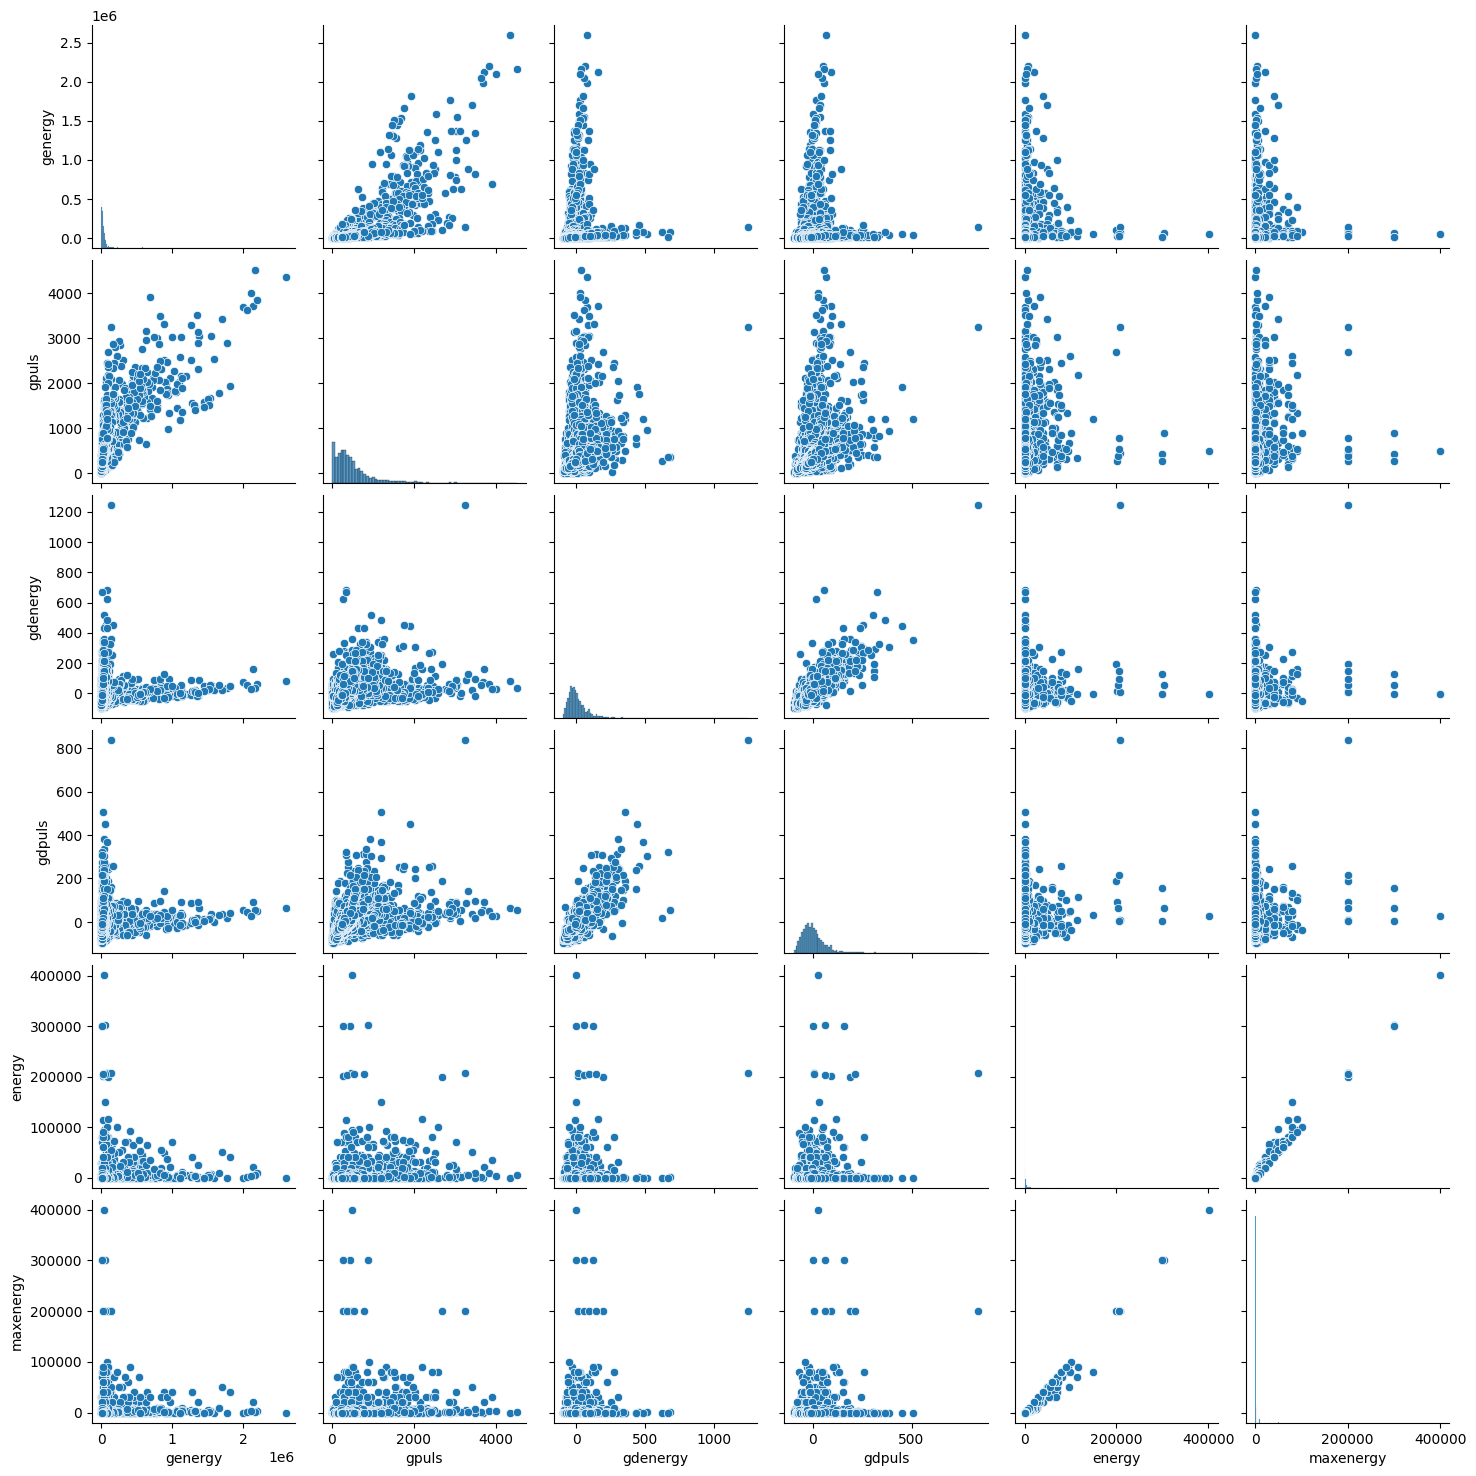

In [13]:
# Plot the distribution of continuous features
sns.pairplot(continuous_df, size = 2.5)
plt.show()

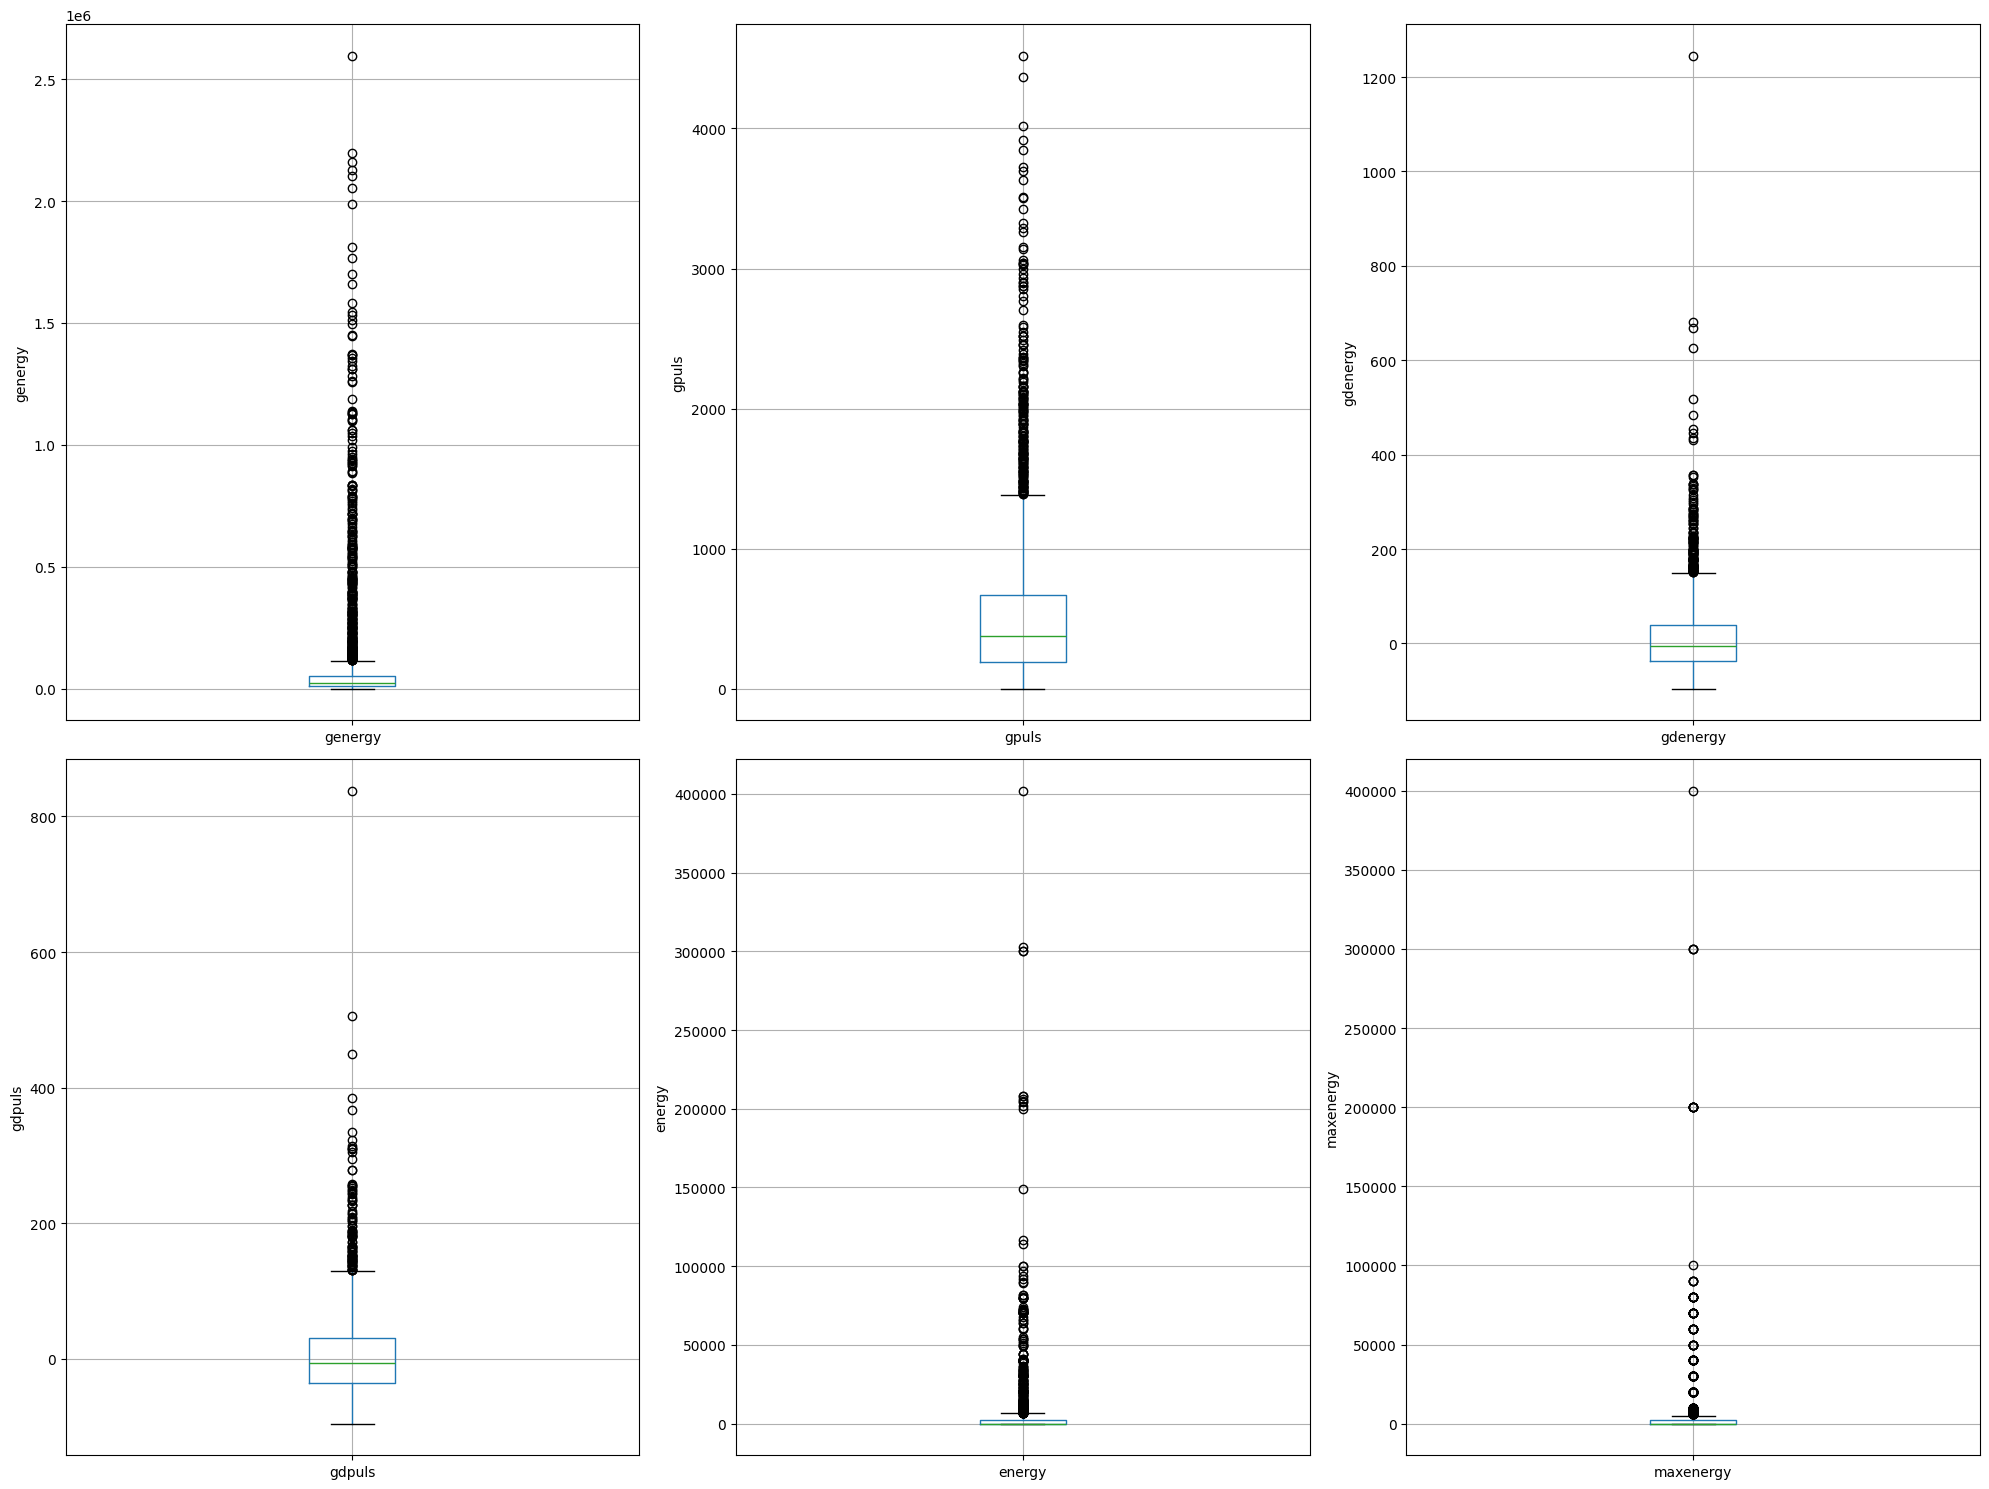

In [14]:
# Set the figure size
plt.figure(figsize=(20, 15))

# Loop through the columns and create subplots
for i, column in enumerate(continuous_df.columns, 1):
  plt.subplot(2, 3, i)  # Create a subplot in a 2x3 grid
  fig = df.boxplot(column=column)
  fig.set_title('')
  fig.set_ylabel(column)

# Adjust layout
plt.tight_layout()
plt.show()

In [15]:
# remove the duplicated rows
df.drop_duplicates(keep='first', inplace=True)
df

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,ghazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,energy,maxenergy,class
0,a,a,N,15180,48,-72,-72,a,0,0,0,0,0,0,0,0
1,a,a,N,14720,33,-70,-79,a,1,0,1,0,0,2000,2000,0
2,a,a,N,8050,30,-81,-78,a,0,0,0,0,0,0,0,0
3,a,a,N,28820,171,-23,40,a,1,0,1,0,0,3000,3000,0
4,a,a,N,12640,57,-63,-52,a,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2579,b,a,W,81410,785,432,151,b,0,0,0,0,0,0,0,0
2580,b,a,W,42110,555,213,118,a,0,0,0,0,0,0,0,0
2581,b,a,W,26960,540,101,112,a,0,0,0,0,0,0,0,0
2582,a,a,W,16130,322,2,2,a,0,0,0,0,0,0,0,0


In [16]:
# Reindex the DataFrame after dropping duplicates
df.reset_index(drop=True, inplace=True)
df.tail()

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,ghazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,energy,maxenergy,class
2573,b,a,W,81410,785,432,151,b,0,0,0,0,0,0,0,0
2574,b,a,W,42110,555,213,118,a,0,0,0,0,0,0,0,0
2575,b,a,W,26960,540,101,112,a,0,0,0,0,0,0,0,0
2576,a,a,W,16130,322,2,2,a,0,0,0,0,0,0,0,0
2577,a,a,W,12750,235,-10,-10,a,0,0,0,0,0,0,0,0


In [17]:
# Check for the dimensions of the DataFrame after data cleaning
df.shape

(2578, 16)

In [18]:
# Save the cleaned DataFrame
X = df.drop(columns=label).values
y = df[label].values

# Show the shape of the data
print("X shape: ", X.shape)
print("y shape: ", y.shape)

X shape:  (2578, 15)
y shape:  (2578,)


#### Split the dataset
Split the dataset into training, validation and test sets.

In [19]:
# Split the dataset into training, validation, and test sets
# Training : Validation : Test = 7 : 1 : 2

seed_num = 42
np.random.seed(seed_num)

# Split the dataset into training and test sets
# test_size = 0.2 as (training dataset + validation dataset) : test dataset = 8 : 2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed_num,
  # stratify=y
)

# Split the training dataset into training and validation sets
# test_size = 0.125 as training dataset : validation dataset = 7 : 1
X_train, X_vald, y_train, y_vald = train_test_split(
  X_train,
  y_train,
  test_size=0.125,
  random_state=seed_num,
  # stratify=y_train
)

# Show the shape of the datasets
print("Original dataset shape:")
print("X shape:", X.shape, ", y shape:", y.shape, "\n")

print("Training set shape:")
print("X_train shape:", X_train.shape, ", y_train shape:", y_train.shape, "\n")

print("Validation set shape:")
print("X_vald shape:", X_vald.shape, ", y_vald shape:", y_vald.shape, "\n")

print("Test set shape: ")
print("X_test shape:", X_test.shape, ", y_test shape:", y_test.shape)

Original dataset shape:
X shape: (2578, 15) , y shape: (2578,) 

Training set shape:
X_train shape: (1804, 15) , y_train shape: (1804,) 

Validation set shape:
X_vald shape: (258, 15) , y_vald shape: (258,) 

Test set shape: 
X_test shape: (516, 15) , y_test shape: (516,)


#### Data preprocessing
Perform data preprocessing such as normalization, standardization, label encoding etc.
______________________________________________________________________________________
Description:

This section outlines a comprehensive data preprocessing pipeline designed to prepare the Seismic Bumps Dataset for a classification task aimed at predicting whether a high-energy seismic bump will occur in the next shift.

The process includes **label encoding and data scaling**: ordinal categorical features are transformed using `Label Encoding,` while nominal features are encoded with `One-Hot Encoding`. Numerical features are scaled using the `Robust Scaler` to reduce the impact of outliers and skewed distributions. To address class imbalance, the `SMOTE (Synthetic Minority Over-sampling Technique)` is applied exclusively to the training set.

##### Label encoding & data scaling

Based on the column description, DataFrame consists of

Categorical data includes
- Ordinal: `seismic`, `seismoacoustic`, and `ghazard`
- Nominal: `shift`

and numerical data.

The data are encoded based on their categories:
- Ordinal categorical values using **Label Encoding**,
- Nominal categorical values using **One Hot Encoding**,
- and Numerical values using **Robust Scaler**

**Robust Scaler** is used instead of **MinMaxScaler** as seismic data often includes extreme value (e.g. sudden energy spikes, zero-heavy counts). RoubstScaler is typically safer as it is good for data that has outliers or heavy skew.

In [20]:
# Convert X_train to a DataFrame for scaling
X_train_df = pd.DataFrame(X_train, columns=df.drop(columns=label).columns)
X_vald_df = pd.DataFrame(X_vald, columns=df.drop(columns=label).columns)
X_test_df = pd.DataFrame(X_test, columns=df.drop(columns=label).columns)

In [21]:
# Apply Label Encoding to the ordinal categorical columns
label_encoder = LabelEncoder()

for column in categorical_df.columns:
  if column != 'shift':
    # Transform the training, validation, and test sets
    X_train_df[column] = label_encoder.fit_transform(X_train_df[column])
    X_vald_df[column] = label_encoder.transform(X_vald_df[column])
    X_test_df[column] = label_encoder.transform(X_test_df[column])

In [22]:
# Apply One-Hot Encoding to the nominal categorical columns
onehot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

def onehot_encode_and_concat(df, column, onehot_encoder): 
  onehot_encoded = onehot_encoder.transform(df[[column]])
  onehot_df = pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names_out([column]), index=df.index)
  df = df.drop(column, axis=1) # drop the original column
  return pd.concat([df, onehot_df], axis=1)

onehot_encoder.fit(X_train_df[['shift']])

# Transform the training, validation, and test sets
X_train_df = onehot_encode_and_concat(X_train_df, 'shift', onehot_encoder)
X_vald_df = onehot_encode_and_concat(X_vald_df, 'shift', onehot_encoder)
X_test_df = onehot_encode_and_concat(X_test_df, 'shift', onehot_encoder)

In [23]:
# Apply Robust Scaling to the numerical columns
numerical_scaler = RobustScaler()

# Transform the training, validation, and test sets
X_train_df[numerical_df.columns] = numerical_scaler.fit_transform(X_train_df[numerical_df.columns])
X_vald_df[numerical_df.columns] = numerical_scaler.transform(X_vald_df[numerical_df.columns])
X_test_df[numerical_df.columns] = numerical_scaler.transform(X_test_df[numerical_df.columns])

In [24]:
# Checkpoint the columns after encoding
columns_after_encoding = X_train_df.columns
columns_after_encoding

Index(['seismic', 'seismoacoustic', 'genergy', 'gpuls', 'gdenergy', 'gdpuls',
       'ghazard', 'nbumps', 'nbumps2', 'nbumps3', 'nbumps4', 'nbumps5',
       'energy', 'maxenergy', 'shift_N', 'shift_W'],
      dtype='object')

In [25]:
# Display the scaled columns of the training set
X_train_df[numerical_df.columns].head()

,genergy,gpuls,gdenergy,gdpuls,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,energy,maxenergy
0,-0.524304,-0.241362,-0.842105,-0.350365,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,-0.346626,-0.226921,-0.342105,0.014599,1.0,0.0,1.0,0.0,0.0,0.357143,0.5
2,0.655498,-0.559051,-0.118421,-0.029197,3.0,2.0,1.0,0.0,0.0,0.607143,0.5
3,-0.412931,-0.162971,-0.105263,0.598540,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,-0.272770,0.059825,0.697368,0.510949,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [26]:
# Display the scaled columns of the validation set
X_vald_df[numerical_df.columns].head()

,genergy,gpuls,gdenergy,gdpuls,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,energy,maxenergy
0,0.411279,0.507478,0.710526,0.467153,1.0,1.0,0.0,0.0,0.0,0.107143,0.15
1,0.342850,1.949458,1.631579,2.452555,2.0,2.0,0.0,0.0,0.0,0.392857,0.30
2,3.318075,2.853017,0.144737,0.379562,0.0,0.0,0.0,0.0,0.0,0.000000,0.00
3,-0.534686,-0.528107,-0.894737,-0.905109,0.0,0.0,0.0,0.0,0.0,0.000000,0.00
4,0.543889,-0.631253,-0.618421,-0.656934,0.0,0.0,0.0,0.0,0.0,0.000000,0.00


In [27]:
# Display the scaled columns of the test set
X_test_df[numerical_df.columns].head()

,genergy,gpuls,gdenergy,gdpuls,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,energy,maxenergy
0,-0.592261,-0.767406,-1.039474,-1.109489,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,-0.328929,-0.101083,0.394737,0.802920,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.406796,-0.270242,0.368421,0.160584,3.0,0.0,3.0,0.0,0.0,1.428571,1.0
3,13.068429,4.051573,0.552632,0.686131,1.0,0.0,1.0,0.0,0.0,1.071429,1.5
4,-0.437471,-0.472408,-0.855263,-0.788321,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


##### Oversampling
**SMOTE (Synthetic Minority Over-sampling Technique)**, is used for oversampling the minority class in imbalanced datasets. It is only introduced to training dataset to prevent the unrealistic samples and data leakage in validation dataset and test dataset.

In [28]:
# Oversampling
# SMOTE
smote = SMOTE(random_state=seed_num, sampling_strategy='minority')
X_smote, y_smote = smote.fit_resample(X_train_df, y_train)

print('Original dataset shape:', Counter(y_train))
print('Resample dataset shape:', Counter(y_smote))

X_train = X_smote
y_train = y_smote

Original dataset shape: Counter({np.int64(0): 1694, np.int64(1): 110})
Resample dataset shape: Counter({np.int64(0): 1694, np.int64(1): 1694})


  File "c:\Users\ch\anaconda3\envs\test\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\ch\anaconda3\envs\test\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ch\anaconda3\envs\test\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\ch\anaconda3\envs\test\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


In [29]:
# Convert back to a NumPy array
X_vald = X_vald_df.values
X_test = X_test_df.values

#### Feature Selection
Perform feature selection to select the relevant features.
______________________________________________________________________________________
Description:

To improve model efficiency and focus on the most informative attributes, **feature selection** was applied using `SelectKBest` with the `mutual_info_classif` scoring function. This technique evaluates each feature's relevance to the target variable by estimating the **mutual information**, a measure of how much knowing one variable reduces uncertainty about the other.

In [30]:
# Feature selection
selector = SelectKBest(score_func=mutual_info_classif, k=8)
X_train = selector.fit_transform(X_train, y_train)

# Transform the validation and test sets using the same selector
X_vald = selector.transform(X_vald)
X_test = selector.transform(X_test)

# Get the feature names after encoding
selected_indices = selector.get_support(indices=True) # Get the indices of the selected features
selected_features = columns_after_encoding[selected_indices] # Get the names of the selected features
selected_features

Index(['gdenergy', 'gdpuls', 'nbumps', 'nbumps2', 'nbumps3', 'energy',
       'maxenergy', 'shift_N'],
      dtype='object')

The **top 8 most informative features** were selected from the training set, and the same transformation was applied to both the validation and test sets to ensure consistency. The resulting subset of features likely contributed the most to classification performance, helping reduce noise, overfitting risk, and computation time.

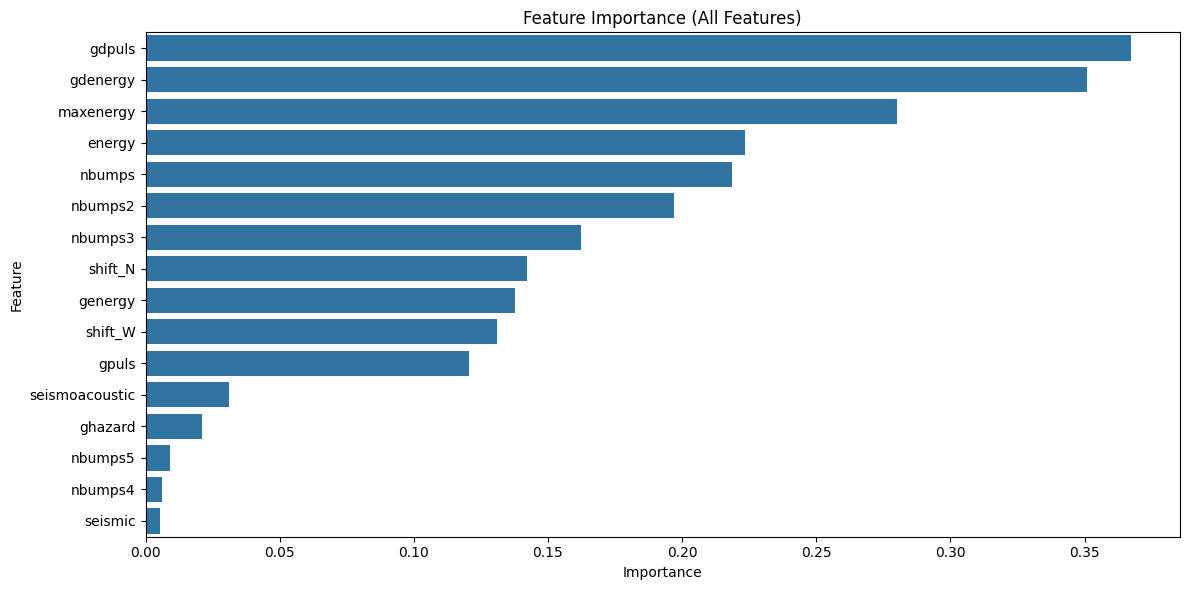

In [31]:
# Get all feature names BEFORE selection
all_feature_names = X_train_df.columns  # assuming x_train is a DataFrame

# Get all feature scores from the selector
all_scores = selector.scores_  # same length as original feature count

# Create a DataFrame of all features and their scores
feature_importances = pd.DataFrame({
  "feature": all_feature_names,
  "importance": all_scores
})

# Sort the DataFrame by importance
feature_importances = feature_importances.sort_values("importance", ascending=False)

# Plot all features
plt.figure(figsize=(12, max(6, len(feature_importances) * 0.3)))  # dynamic height
sns.barplot(x="importance", y="feature", data=feature_importances)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance (All Features)")
plt.tight_layout()
plt.show()


To evaluate which features contributed most to the classification task, mutual information scores were computed for all input variables and visualized in a horizontal bar chart. The results show that the features `gdpuls`, `gdenergy`, and `maxenergy` had the highest mutual information with the target variable, indicating they contain the most predictive power for identifying high-energy seismic bumps. Other strong contributors include `energy`, `nbumps`, and its related variants like `nbumps2` and `nbumps3`, which capture localized bump activity. In contrast, features like `seismoacoustic`, `ghazard`, and `seismic` had very low mutual information scores and were likely excluded during feature selection. By focusing on the top 8 features identified in this analysis, the model reduces dimensionality and computational cost while retaining the most influential signals for learning.

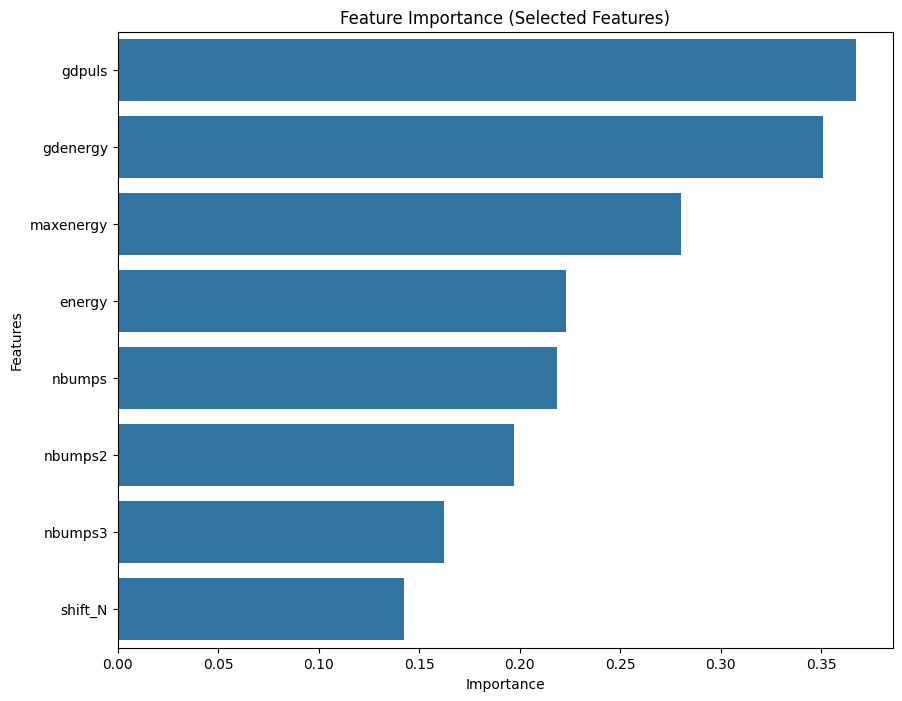

In [32]:
# Get the feature importances
# Get the indices of the selected features
importances = selector.scores_[selected_indices] # Get the scores of the selected features
feature_importances = pd.DataFrame({"feature": selected_features, "importance": importances}) # Create a DataFrame with feature names and their importances
feature_importances = feature_importances.sort_values("importance", ascending=False) # Sort the DataFrame by importance

plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importances['importance'], y=feature_importances['feature'])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance (Selected Features)')
plt.show()

The feature importance chart for the selected subset visualizes the top 8 features retained after applying `SelectKBest` with `mutual_info_classif`. Among these, `gdpuls`, `gdenergy`, and `maxenergy` stand out with the highest mutual information scores, suggesting they have the strongest predictive relationships with the target variable. These features likely capture significant seismic signal behavior relevant to high-energy bump events. Other features like `energy`, `nbumps`, and `nbumps2` also contribute notably, reflecting the model’s reliance on both signal intensity and historical bump counts. Although `nbumps3` and `shift_N` are lower on the list, their inclusion still adds meaningful diversity to the input space. Overall, this targeted selection improves model interpretability, reduces overfitting risk, and maintains predictive strength by focusing on the most informative attributes.

In [33]:
# Store the selected features back into the training set
X_train_df = pd.DataFrame(X_train, columns=selected_features)
X_train_df.head()

,gdenergy,gdpuls,nbumps,nbumps2,nbumps3,energy,maxenergy,shift_N
0,-0.842105,-0.350365,0.0,0.0,0.0,0.000000,0.0,1.0
1,-0.342105,0.014599,1.0,0.0,1.0,0.357143,0.5,0.0
2,-0.118421,-0.029197,3.0,2.0,1.0,0.607143,0.5,1.0
3,-0.105263,0.598540,0.0,0.0,0.0,0.000000,0.0,1.0
4,0.697368,0.510949,0.0,0.0,0.0,0.000000,0.0,1.0


In [34]:
# Store the selected features back into the validation set
X_vald_df = pd.DataFrame(X_vald, columns=selected_features)
X_vald_df.head()

,gdenergy,gdpuls,nbumps,nbumps2,nbumps3,energy,maxenergy,shift_N
0,0.710526,0.467153,1.0,1.0,0.0,0.107143,0.15,0.0
1,1.631579,2.452555,2.0,2.0,0.0,0.392857,0.30,0.0
2,0.144737,0.379562,0.0,0.0,0.0,0.000000,0.00,0.0
3,-0.894737,-0.905109,0.0,0.0,0.0,0.000000,0.00,1.0
4,-0.618421,-0.656934,0.0,0.0,0.0,0.000000,0.00,1.0


In [35]:
# Store the selected features back into the test set
X_test_df = pd.DataFrame(X_test, columns=selected_features)
X_test_df.head()

,gdenergy,gdpuls,nbumps,nbumps2,nbumps3,energy,maxenergy,shift_N
0,-1.039474,-1.109489,0.0,0.0,0.0,0.000000,0.0,1.0
1,0.394737,0.802920,0.0,0.0,0.0,0.000000,0.0,1.0
2,0.368421,0.160584,3.0,0.0,3.0,1.428571,1.0,0.0
3,0.552632,0.686131,1.0,0.0,1.0,1.071429,1.5,0.0
4,-0.855263,-0.788321,0.0,0.0,0.0,0.000000,0.0,0.0


In [36]:
# Convert back to a NumPy array
X_train = X_train_df.values
X_vald = X_vald_df.values
X_test = X_test_df.values

In [37]:
# Check the shape of the datasets after oversampling
print("Training set shape:")
print("X_train shape:", X_train.shape, ", y_train shape:", y_train.shape)
print("X_train_df shape:", X_train_df.shape, ", y_train shape:", y_train.shape, "\n")

print("Validation set shape:")
print("X_vald shape:", X_vald.shape, ", y_vald shape:", y_vald.shape)
print("X_vald_df shape:", X_vald_df.shape, ", y_vald shape:", y_vald.shape, "\n")

print("Test set shape: ")
print("X_test shape:", X_test.shape, ", y_test shape:", y_test.shape)
print("X_test_df shape:", X_test_df.shape, ", y_test shape:", y_test.shape)

Training set shape:
X_train shape: (3388, 8) , y_train shape: (3388,)
X_train_df shape: (3388, 8) , y_train shape: (3388,) 

Validation set shape:
X_vald shape: (258, 8) , y_vald shape: (258,)
X_vald_df shape: (258, 8) , y_vald shape: (258,) 

Test set shape: 
X_test shape: (516, 8) , y_test shape: (516,)
X_test_df shape: (516, 8) , y_test shape: (516,)


#### Data modeling
Build the machine learning models. You must build atleast two (2) predictive models. One of the predictive models must be either Decision Tree or Support Vector Machine.
______________________________________________________________________________________
In this project, three supervised learning algorithms were explored to model and predict the occurrence of high-energy seismic bumps which are **Support Vector Machine (SVM)**, **Decision Tree Classifier (DTC)**, and **K-Nearest Neighbors (KNN)**. These models were chosen for their complementary strengths in handling non-linearity, interpretability, and distance-based pattern recognition. **SVM** is particularly effective for binary classification tasks and was selected for its ability to model complex, non-linear relationships through kernel functions such as **RBF** or **Sigmoid**, which transform input features into higher-dimensional spaces for better class separability. **DTC** offers high interpretability and handles both linear and non-linear patterns by recursively splitting data based on features that maximize information gain, using criteria such as **Gini** or **Entropy**. Given the imbalanced nature of the dataset, techniques like **SMOTE** were used to improve class balance before training. Lastly, **KNN** was included as a non-parametric, instance-based method that classifies new points by the majority vote of their nearest neighbors based on distance metrics such as **Euclidean** or **Manhattan**. Each model was tuned using cross-validation and evaluated using metrics like **accuracy**, **precision**, **recall**, and **F1-score**, with a strong focus on **recall** to reduce the risk of false negatives in this safety-critical domain.

##### Variables & Functions

In [38]:
# Repeated Stratified K-Fold Cross Validation
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=seed_num)

In [39]:
def plot_confusion_matrices_side_by_side(y_true, y_pred_default, y_pred_optimized, model_name):
    """
    Plot confusion matrices for two models side by side
    """
    cm_default = confusion_matrix(y_true, y_pred_default)
    cm_optimized = confusion_matrix(y_true, y_pred_optimized)

    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Default model
    sns.heatmap(cm_default, annot=True, fmt='d', cmap='Blues', ax=axes[0])
    axes[0].set_title(f'Confusion Matrix - Default {model_name}')
    axes[0].set_xlabel('Predicted Label')
    axes[0].set_ylabel('True Label')

    # Optimized model
    sns.heatmap(cm_optimized, annot=True, fmt='d', cmap='Blues', ax=axes[1])
    axes[1].set_title(f'Confusion Matrix - Optimized {model_name}')
    axes[1].set_xlabel('Predicted Label')
    axes[1].set_ylabel('True Label')

    plt.tight_layout()
    plt.show()

In [40]:
def evaluate_validation_set(y_true, y_pred):
    """
    Evaluate the validation set using various metrics and print the results.
    
    Parameters:
    y_true (array-like): True labels of the validation set.
    y_pred (array-like): Predicted labels of the validation set.
    """
    print("\n")
    print("📊 Evaluation metrics for validation set:")
    print(f"Validation set accuracy: {accuracy_score(y_true, y_pred):.6f}")
    print(f"Validation set precision: {precision_score(y_true, y_pred):.6f}")
    print(f"Validation set recall: {recall_score(y_true, y_pred):.6f}")
    print(f"Validation set f1 score: {f1_score(y_true, y_pred):.6f}")
    print("\nValidation set confusion matrix: \n", confusion_matrix(y_true, y_pred))

    # Print the classification report for the validation set
    print("\nValidation set classification report: \n", classification_report(y_vald, y_pred))

In [41]:
def plot_roc_curve(y_true, model, model_short_name):
    """
    Plot ROC curve for a model.
    
    Parameters:
    y_true (array-like): True labels of the validation set.
    model (object): Trained model.
    model_short_name (str): Short name of the model for labeling the plot.
    """
    
    # Get probability predictions for class 1
    y_proba = model.predict_proba(X_vald)[:, 1]

    fpr, tpr, thresholds = roc_curve(y_true, y_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.3f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve - Optimized {model_short_name}')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

In [42]:
def plot_model_comparison(y_vald, y_pred_default, y_pred_optimized, model_name, model_short_name):
    """
    Plot the model comparison for the validation set
    """
    # Prepare data for the bar graph
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
    default_scores = [
        accuracy_score(y_vald, y_pred_default),
        precision_score(y_vald, y_pred_default),
        recall_score(y_vald, y_pred_default),
        f1_score(y_vald, y_pred_default)
    ]
    optimized_scores = [
        accuracy_score(y_vald, y_pred_optimized),
        precision_score(y_vald, y_pred_optimized),
        recall_score(y_vald, y_pred_optimized),
        f1_score(y_vald, y_pred_optimized)
    ]

    # Plot the bar graph
    x = np.arange(len(metrics))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(figsize=(10, 6))
    bars1 = ax.bar(x - width/2, default_scores, width, label='Default ' + model_short_name)
    bars2 = ax.bar(x + width/2, optimized_scores, width, label='Optimized ' + model_short_name)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_xlabel('Metrics')
    ax.set_ylabel('Scores')
    ax.set_title('Performance Comparison of Default and Optimized ' + model_name)
    ax.set_xticks(x)
    ax.set_xticklabels(metrics)
    ax.legend()

    # Annotate bars with their values
    for bar in bars1:
            height = bar.get_height()
            ax.annotate(f'{height:.6f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')
    for bar in bars2:
            height = bar.get_height()
            ax.annotate(f'{height:.6f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

##### Support Vector Machine (SVM)

Support Vector Machine is a powerful and popular supervised learning model, particularly effective for binary classification problems like dataset above. This algorithm is chosen because it can handle non-linearity via kernels. The relationships among the features can be non-linear in this dataset and SVM allows the use of kernel functions such as RBF or Sigmoid to transform input data into higher dimensions, making complex patterns more separable.

To establish a performance baseline, a SVM model was first trained using default parameters. Followed by three additional SVM models were also created using different kernel functions:
1. Linear
2. Sigmoid
3. RBF (Radial Basis Function)

all with default settings.

An instance of SVM with default parameters

In [43]:
# Initialize the Support Vector Machine
svm_default_model = SVC()

# Fit the Support Vector Machine on the training set
svm_default_model.fit(X_train, y_train)

# Make predictions on the validation set
y_svm_default_model_pred_val = svm_default_model.predict(X_vald)

# Print the default parameters of the Support Vector Machine
print("Default parameters of Support Vector Machine: \n", svm_default_model.get_params())

# Print the evaluation metrics for the validation set
evaluate_validation_set(y_vald, y_svm_default_model_pred_val)

Default parameters of Support Vector Machine: 
 {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


📊 Evaluation metrics for validation set:
Validation set accuracy: 0.724806
Validation set precision: 0.115942
Validation set recall: 0.444444
Validation set f1 score: 0.183908

Validation set confusion matrix: 
 [[179  61]
 [ 10   8]]

Validation set classification report: 
               precision    recall  f1-score   support

           0       0.95      0.75      0.83       240
           1       0.12      0.44      0.18        18

    accuracy                           0.72       258
   macro avg       0.53      0.60      0.51       258
weighted avg       0.89      0.72      0.79       258



An instance of SVM linear kernel

In [44]:
# Initialize the SVM linear model
svm_linear_default_model = SVC(kernel='linear')

# Fit the SVM linear model on the training set
svm_linear_default_model.fit(X_train, y_train)

# Make predictions on the validation set
y_svm_linear_default_model_pred_val = svm_linear_default_model.predict(X_vald)

# Print the default parameters of the SVM linear model
print("Default parameters of SVM linear model: \n", svm_linear_default_model.get_params())

# Print the evaluation metrics for the validation set
evaluate_validation_set(y_vald, y_svm_linear_default_model_pred_val)

Default parameters of SVM linear model: 
 {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


📊 Evaluation metrics for validation set:
Validation set accuracy: 0.751938
Validation set precision: 0.116667
Validation set recall: 0.388889
Validation set f1 score: 0.179487

Validation set confusion matrix: 
 [[187  53]
 [ 11   7]]

Validation set classification report: 
               precision    recall  f1-score   support

           0       0.94      0.78      0.85       240
           1       0.12      0.39      0.18        18

    accuracy                           0.75       258
   macro avg       0.53      0.58      0.52       258
weighted avg       0.89      0.75      0.81       258



An instance of SVM Radial Basis Function (RBF) kernel

In [45]:
# Initialize the SVM RBF model
svm_rbf_default_model = SVC(kernel='rbf')

# Fit the SVM RBF model on the training set
svm_rbf_default_model.fit(X_train, y_train)

# Make predictions on the validation set
y_svm_rbf_default_model_pred_val = svm_rbf_default_model.predict(X_vald)

# Print the default parameters of the SVM RBF model
print("Default parameters of SVM RBF model: \n", svm_rbf_default_model.get_params())

# Print the evaluation metrics for the validation set
evaluate_validation_set(y_vald, y_svm_rbf_default_model_pred_val)

Default parameters of SVM RBF model: 
 {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


📊 Evaluation metrics for validation set:
Validation set accuracy: 0.724806
Validation set precision: 0.115942
Validation set recall: 0.444444
Validation set f1 score: 0.183908

Validation set confusion matrix: 
 [[179  61]
 [ 10   8]]

Validation set classification report: 
               precision    recall  f1-score   support

           0       0.95      0.75      0.83       240
           1       0.12      0.44      0.18        18

    accuracy                           0.72       258
   macro avg       0.53      0.60      0.51       258
weighted avg       0.89      0.72      0.79       258



An instance of SVM sigmoid kernel

In [46]:
# Initialize the SVM sigmoid model
svm_sigmoid_default_model = SVC(kernel='sigmoid')

# Fit the SVM sigmoid model on the training set
svm_sigmoid_default_model.fit(X_train, y_train)

# Make predictions on the validation set
y_svm_sigmoid_default_model_pred_val = svm_sigmoid_default_model.predict(X_vald)

# Print the default parameters of the SVM sigmoid model
print("Default parameters of SVM sigmoid model: \n", svm_sigmoid_default_model.get_params())

# Print the evaluation metrics for the validation set
evaluate_validation_set(y_vald, y_svm_sigmoid_default_model_pred_val)

Default parameters of SVM sigmoid model: 
 {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'sigmoid', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


📊 Evaluation metrics for validation set:
Validation set accuracy: 0.693798
Validation set precision: 0.113924
Validation set recall: 0.500000
Validation set f1 score: 0.185567

Validation set confusion matrix: 
 [[170  70]
 [  9   9]]

Validation set classification report: 
               precision    recall  f1-score   support

           0       0.95      0.71      0.81       240
           1       0.11      0.50      0.19        18

    accuracy                           0.69       258
   macro avg       0.53      0.60      0.50       258
weighted avg       0.89      0.69      0.77       258



The models were evaluated using four key classification metrics:
1. Accuracy: Overall correctness of the model

2. Precision: Correct positive predictions over total predicted positives

3. Recall: Correct positive predictions over total actual positives

4. F1 Score: Harmonic mean of precision and recall

A bar chart was plotted to visualize and compare the performance of each kernel across these metrics. This comparison helps assess how well each kernel captures the underlying structure of the seismic bump data and informs which kernel is most promising for further tuning.

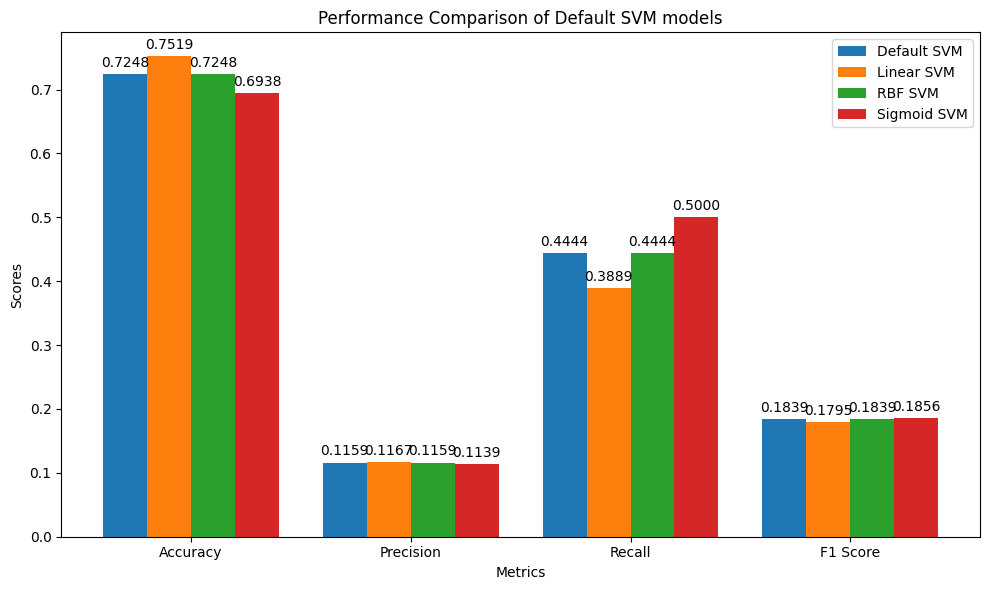

In [47]:
# Prepare data for the bar graph
svm_metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
svm_default_scores = [
    accuracy_score(y_vald, y_svm_default_model_pred_val),
    precision_score(y_vald, y_svm_default_model_pred_val),
    recall_score(y_vald, y_svm_default_model_pred_val),
    f1_score(y_vald, y_svm_default_model_pred_val),
]
svm_linear_scores = [
    accuracy_score(y_vald, y_svm_linear_default_model_pred_val),
    precision_score(y_vald, y_svm_linear_default_model_pred_val),
    recall_score(y_vald, y_svm_linear_default_model_pred_val),
    f1_score(y_vald, y_svm_linear_default_model_pred_val),
]
svm_rbf_scores = [
    accuracy_score(y_vald, y_svm_rbf_default_model_pred_val),
    precision_score(y_vald, y_svm_rbf_default_model_pred_val),
    recall_score(y_vald, y_svm_rbf_default_model_pred_val),
    f1_score(y_vald, y_svm_rbf_default_model_pred_val),
]
svm_sigmoid_scores = [
    accuracy_score(y_vald, y_svm_sigmoid_default_model_pred_val),
    precision_score(y_vald, y_svm_sigmoid_default_model_pred_val),
    recall_score(y_vald, y_svm_sigmoid_default_model_pred_val),
    f1_score(y_vald, y_svm_sigmoid_default_model_pred_val),
]

# Plot the bar graph
x = np.arange(len(svm_metrics))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - 1.5 * width, svm_default_scores, width, label='Default SVM')
bars2 = ax.bar(x - 0.5 * width, svm_linear_scores, width, label='Linear SVM')
bars3 = ax.bar(x + 0.5 * width, svm_rbf_scores, width, label='RBF SVM')
bars4 = ax.bar(x + 1.5 * width, svm_sigmoid_scores, width, label='Sigmoid SVM')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Performance Comparison of Default SVM models')
ax.set_xticks(x)
ax.set_xticklabels(svm_metrics)
ax.legend()

# Annotate bars with their values
for bar in bars1:
        height = bar.get_height()
        ax.annotate(f'{height:.4f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')
for bar in bars2:
        height = bar.get_height()
        ax.annotate(f'{height:.4f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')
for bar in bars3:
        height = bar.get_height()
        ax.annotate(f'{height:.4f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')
for bar in bars4:
        height = bar.get_height()
        ax.annotate(f'{height:.4f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

plt.tight_layout()
plt.show()

SVM Hyperparameter Tuning with Kernel-Specific Grid Search

To optimize the performance of the SVM classifier, hyperparameter tuning was performed separately for each kernel type:
1. Linear
2. RBF
3. Sigmoid

Since each kernel has a unique set of hyperparameters, the tuning process was conducted independently for each kernel using GridSearchCV, and the best-performing models were later compared and consolidated. This apporach enhances robustness by ensuring results are less sensitive to data splits and class imbalance. Each kernel was tuned over the following parameter grids:
- Linear Kernel:
    - (`'C': [0.01, 0.1, 1, 10, 100]`)
    - (no gamma or coef0 required)
- RBF Kernel:
    - (`'C': [0.01, 0.1, 1, 10, 100]`)
    - (`'gamma': [0.0001, 0.001, 0.01, 0.1, 1]`)
    - (no coef0)
- Sigmoid Kernel
    - (`'C': [0.01, 0.1, 1, 10, 100]`)
    - (`'coef0': [0, 0.1, 0.5, 1, 2]`)
    - (`'gamma': [0.0001, 0.001, 0.01, 0.1, 1]`)

Each GridSearchCV was exucuted with scoring = "recall" to prioritize minimizing false negatives, an essential requirement for this seismic bump prediction task. The models were also configured with probability = True, to enable ROC curve analysis later in the evaluation phase.

By isolating the tuning process per kernel, computational resources were used efficiently, avoiding redundant searches for irrelevant parameters (e.g., coef0 in linear and RBF kernels).

In [48]:
# Set the hyperparameter grid for the SVM linear model
linear_svm_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel': ['linear'],
}

# Initialize the base SVM model
svm = SVC(
    probability=True,  # Enable probability estimates for ROC curve
)

# Set up GridSearchCV
linear_svm_grid_search = GridSearchCV(
    estimator=svm,
    param_grid=linear_svm_param_grid,
    scoring="recall", # Choose to refit the base model based on recall score
    cv=cv,
    verbose=2,
    n_jobs=-1,
    error_score=0,
)

# Fit the grid search to training data
linear_svm_grid_results = linear_svm_grid_search.fit(X_train, y_train)

# Output best hyperparameters and best cross-validation score
print(f"✅ Best hyperparameters found: {linear_svm_grid_results.best_params_}")
print(f"✅ Best cross-validation score: {linear_svm_grid_results.best_score_:.6f}")

# Get the best model
linear_svm_best_model = linear_svm_grid_results.best_estimator_

# Make predictions on the validation set
y_linear_svm_best_pred_val = linear_svm_best_model.predict(X_vald)

# Print the evaluation metrics for the validation set
evaluate_validation_set(y_vald, y_linear_svm_best_pred_val)

Fitting 25 folds for each of 5 candidates, totalling 125 fits
✅ Best hyperparameters found: {'C': 100, 'kernel': 'linear'}
✅ Best cross-validation score: 0.700836


📊 Evaluation metrics for validation set:
Validation set accuracy: 0.755814
Validation set precision: 0.118644
Validation set recall: 0.388889
Validation set f1 score: 0.181818

Validation set confusion matrix: 
 [[188  52]
 [ 11   7]]

Validation set classification report: 
               precision    recall  f1-score   support

           0       0.94      0.78      0.86       240
           1       0.12      0.39      0.18        18

    accuracy                           0.76       258
   macro avg       0.53      0.59      0.52       258
weighted avg       0.89      0.76      0.81       258



In [49]:
# Set the hyperparameter grid for the SVM rbf model
rbf_svm_param_grid = {
    'C':  [0.01, 0.1, 1, 10, 100],
    'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
    'kernel': ['rbf'],
}

# Initialize the base SVM model
svm = SVC(
    probability=True,  # Enable probability estimates for ROC curve
)

# Set up GridSearchCV
rbf_svm_grid_search = GridSearchCV(
    estimator=svm,
    param_grid=rbf_svm_param_grid,
    scoring='recall', # Choose to refit the base model based on recall score
    cv=cv,
    verbose=2,
    n_jobs=-1,
    error_score=0,
)

# Fit the grid search to training data
rbf_svm_grid_results = rbf_svm_grid_search.fit(X_train, y_train)

# Output best hyperparameters and best cross-validation score
print(f"✅ Best hyperparameters found: {rbf_svm_grid_results.best_params_}")
print(f"✅ Best cross-validation score: {rbf_svm_grid_results.best_score_:.6f}")

# Get the best model
rbf_svm_best_model = rbf_svm_grid_results.best_estimator_

# Make predictions on the validation set
y_rbf_svm_best_pred_val = rbf_svm_best_model.predict(X_vald)

# Print the evaluation metrics for the validation set
evaluate_validation_set(y_vald, y_rbf_svm_best_pred_val)

Fitting 25 folds for each of 25 candidates, totalling 625 fits
✅ Best hyperparameters found: {'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}
✅ Best cross-validation score: 0.843808


📊 Evaluation metrics for validation set:
Validation set accuracy: 0.531008
Validation set precision: 0.100775
Validation set recall: 0.722222
Validation set f1 score: 0.176871

Validation set confusion matrix: 
 [[124 116]
 [  5  13]]

Validation set classification report: 
               precision    recall  f1-score   support

           0       0.96      0.52      0.67       240
           1       0.10      0.72      0.18        18

    accuracy                           0.53       258
   macro avg       0.53      0.62      0.42       258
weighted avg       0.90      0.53      0.64       258



In [50]:
# Set the hyperparameter grid for the SVM sigmoid model
sigmoid_svm_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'coef0': [0, 0.1, 0.5, 1, 2],
    'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
    'kernel': ['sigmoid'],
}

# Initialize the base SVM model
svm = SVC(
    probability=True,  # Enable probability estimates for ROC curve
)

# Set up GridSearchCV
sigmoid_svm_grid_search = GridSearchCV(
    estimator=svm,
    param_grid=sigmoid_svm_param_grid,
    scoring="recall", # Choose to refit the base model based on recall score
    cv=cv,
    verbose=2,
    n_jobs=-1,
    error_score=0,
)

# Fit the grid search to training data
sigmoid_svm_grid_results = sigmoid_svm_grid_search.fit(X_train, y_train)

# Output best hyperparameters and best cross-validation score
print(f"✅ Best hyperparameters found: {sigmoid_svm_grid_results.best_params_}")
print(f"✅ Best cross-validation score: {sigmoid_svm_grid_results.best_score_:.6f}")

# Get the best model
sigmoid_svm_best_model = sigmoid_svm_grid_results.best_estimator_

# Make predictions on the validation set
y_sigmoid_svm_best_pred_val = sigmoid_svm_best_model.predict(X_vald)

# Print the evaluation metrics for the validation set
evaluate_validation_set(y_vald, y_sigmoid_svm_best_pred_val)

Fitting 25 folds for each of 125 candidates, totalling 3125 fits
✅ Best hyperparameters found: {'C': 0.01, 'coef0': 0.5, 'gamma': 1, 'kernel': 'sigmoid'}
✅ Best cross-validation score: 0.820068


📊 Evaluation metrics for validation set:
Validation set accuracy: 0.662791
Validation set precision: 0.094118
Validation set recall: 0.444444
Validation set f1 score: 0.155340

Validation set confusion matrix: 
 [[163  77]
 [ 10   8]]

Validation set classification report: 
               precision    recall  f1-score   support

           0       0.94      0.68      0.79       240
           1       0.09      0.44      0.16        18

    accuracy                           0.66       258
   macro avg       0.52      0.56      0.47       258
weighted avg       0.88      0.66      0.75       258



After completing separate GridSearchCV runs for linear, RBF, and sigmoid SVM models, the results were extracted and compiled for unified comparison and analysis.

To track the source of kernel for each entry, a new column param_kernel was added to each Dataframe for each kernel. Finally, all three DataFrames were merged into a single DataFrame using (`pd.concat()`)

In [51]:
linear_df = pd.DataFrame(linear_svm_grid_search.cv_results_)
rbf_df = pd.DataFrame(rbf_svm_grid_search.cv_results_)
sigmoid_df = pd.DataFrame(sigmoid_svm_grid_search.cv_results_)
linear_df['param_kernel'] = 'linear'
rbf_df['param_kernel'] = 'rbf'
sigmoid_df['param_kernel'] = 'sigmoid'
results_svm_df = pd.concat([linear_df, rbf_df, sigmoid_df], ignore_index=True)


In [52]:
# Convert the results of the GridSearchCV into a DataFrame
# Sort the DataFrame by the mean test score in descending order
# Display the top 10 configurations with the highest mean test scores
# results_svm_df = pd.DataFrame(svm_grid_search.cv_results_)
results_svm_df.sort_values(
    by=['rank_test_score', 'mean_test_score'], 
    ascending=[True, False]
).head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,...,split20_test_score,split21_test_score,split22_test_score,split23_test_score,split24_test_score,mean_test_score,std_test_score,rank_test_score,param_gamma,param_coef0
9,1.296671,0.057554,0.135046,0.013012,0.01,rbf,"{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}",0.840708,0.834808,0.873156,...,0.834808,0.852507,0.846608,0.810651,0.870206,0.843808,0.024856,1,1.0,NaN
44,1.017947,0.046124,0.043906,0.003418,0.01,sigmoid,"{'C': 0.01, 'coef0': 0.5, 'gamma': 1, 'kernel'...",0.852507,0.843658,0.873156,...,0.837758,0.855457,0.648968,0.612426,0.867257,0.820068,0.082460,1,1.0,0.5
4,97.593969,36.338881,0.017803,0.003530,100.00,linear,"{'C': 100, 'kernel': 'linear'}",0.696165,0.696165,0.731563,...,0.619469,0.631268,0.941003,0.704142,0.749263,0.700836,0.072342,1,NaN,NaN
29,1.152738,0.151311,0.049405,0.012571,100.00,rbf,"{'C': 100, 'gamma': 1, 'kernel': 'rbf'}",0.831858,0.808260,0.861357,...,0.825959,0.861357,0.905605,0.840237,0.861357,0.840738,0.034097,2,1.0,NaN
78,1.225639,0.023527,0.053896,0.002858,0.10,sigmoid,"{'C': 0.1, 'coef0': 2, 'gamma': 0.1, 'kernel':...",0.764012,0.749263,0.775811,...,0.749263,0.737463,0.764012,0.739645,0.775811,0.753259,0.030330,2,0.1,2.0
3,18.563083,12.396012,0.019369,0.000919,10.00,linear,"{'C': 10, 'kernel': 'linear'}",0.696165,0.696165,0.731563,...,0.619469,0.631268,0.941003,0.704142,0.755162,0.700126,0.075188,2,NaN,NaN
24,0.895192,0.054345,0.065118,0.005093,10.00,rbf,"{'C': 10, 'gamma': 1, 'kernel': 'rbf'}",0.805310,0.814159,0.884956,...,0.811209,0.820059,0.861357,0.786982,0.808260,0.827277,0.036549,3,1.0,NaN
43,1.132594,0.065602,0.044967,0.005225,0.01,sigmoid,"{'C': 0.01, 'coef0': 0.5, 'gamma': 0.1, 'kerne...",0.761062,0.749263,0.772861,...,0.746313,0.731563,0.764012,0.736686,0.775811,0.750780,0.030056,3,0.1,0.5
2,2.951914,1.984959,0.019825,0.001122,1.00,linear,"{'C': 1, 'kernel': 'linear'}",0.696165,0.696165,0.731563,...,0.619469,0.572271,0.941003,0.683432,0.749263,0.695756,0.078477,3,NaN,NaN
19,0.875437,0.043780,0.076099,0.002559,1.00,rbf,"{'C': 1, 'gamma': 1, 'kernel': 'rbf'}",0.793510,0.787611,0.840708,...,0.805310,0.817109,0.828909,0.781065,0.831858,0.808980,0.028961,4,1.0,NaN


In [53]:
results_svm_df[['params', 'mean_test_score', 'rank_test_score', 'param_kernel']].sort_values(
    by=['rank_test_score', 'mean_test_score'],
    ascending=[True, False]
).head(10)

,params,mean_test_score,rank_test_score,param_kernel
9,"{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}",0.843808,1,rbf
44,"{'C': 0.01, 'coef0': 0.5, 'gamma': 1, 'kernel'...",0.820068,1,sigmoid
4,"{'C': 100, 'kernel': 'linear'}",0.700836,1,linear
29,"{'C': 100, 'gamma': 1, 'kernel': 'rbf'}",0.840738,2,rbf
78,"{'C': 0.1, 'coef0': 2, 'gamma': 0.1, 'kernel':...",0.753259,2,sigmoid
3,"{'C': 10, 'kernel': 'linear'}",0.700126,2,linear
24,"{'C': 10, 'gamma': 1, 'kernel': 'rbf'}",0.827277,3,rbf
43,"{'C': 0.01, 'coef0': 0.5, 'gamma': 0.1, 'kerne...",0.750780,3,sigmoid
2,"{'C': 1, 'kernel': 'linear'}",0.695756,3,linear
19,"{'C': 1, 'gamma': 1, 'kernel': 'rbf'}",0.808980,4,rbf


Upon analyzing the combined GridSearchCV results stored in (`results_svm_df`), it was found that RBF kernel achieved the highest (`mean_test_score`), based on the cross-validated recall metric.

Each kernel was evaluated over a range of hyperparameter configurationsm and the model performance was ranked using the (`mean_test_score`). By filtering and comparing the top-performing rows, the RBF kernel consistently outperformed both the linear and sigmoid kernels in terms of recall, making ti the most effective kernel for detecting high-energy seismic bumps in this dataset. This results aligns with expectations, as the RBF kernel is well-known for its ability to model complex, non-linear relationships.

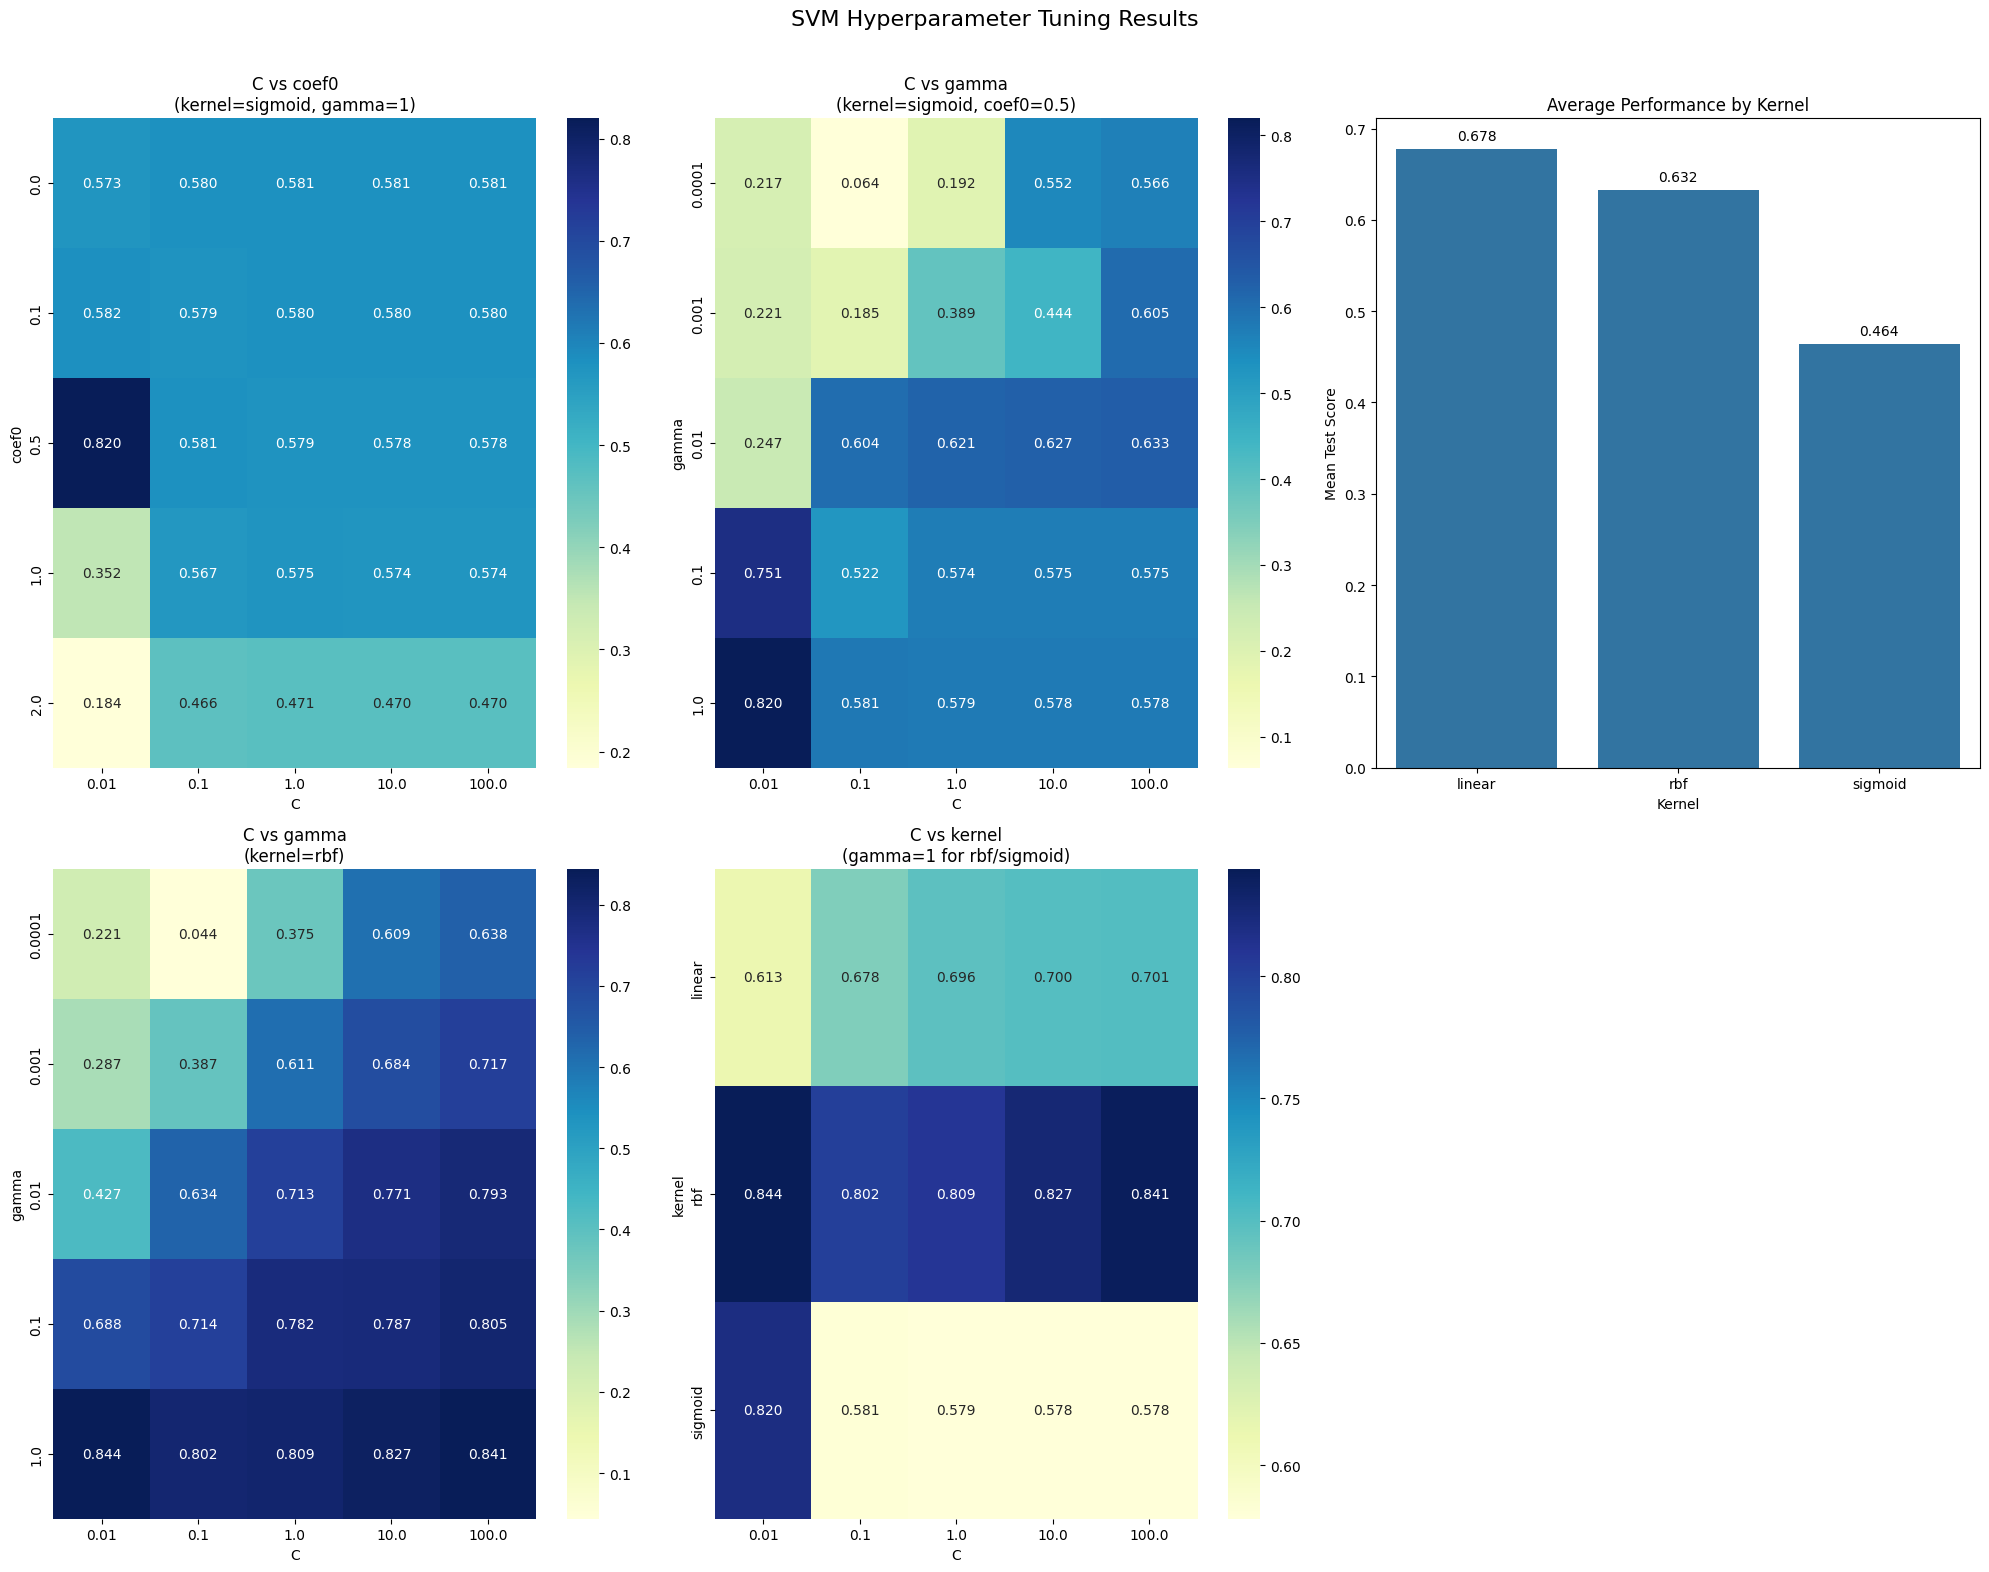

In [54]:
# Set up a 3x2 grid of subplots to include all visualizations
fig, axes = plt.subplots(2, 3, figsize=(20, 16))
fig.suptitle('SVM Hyperparameter Tuning Results', fontsize=16)

# Function to safely create a heatmap, handling empty dataframes
def safe_heatmap(filtered_df, x_param, y_param, ax, title):
    if filtered_df.empty:
        ax.text(0.5, 0.5, f"No data for\n{title}", 
                ha='center', va='center', fontsize=12)
        ax.set_title(title)
        return
    
    pivot = filtered_df.pivot_table(
        values='mean_test_score',
        index=f'param_{y_param}',
        columns=f'param_{x_param}'
    )
    
    if pivot.empty or pivot.size == 0:
        ax.text(0.5, 0.5, f"No data for\n{title}", 
                ha='center', va='center', fontsize=12)
        ax.set_title(title)
        return
        
    sns.heatmap(pivot, annot=True, fmt=".3f", cmap='YlGnBu', ax=ax)
    ax.set_title(title)
    ax.set_xlabel(x_param)
    ax.set_ylabel(y_param)
    
# 1. C vs coef0 (for sigmoid kernel)
# Filter the DataFrame for sigmoid kernel and gamma=1
# Note: The best gamma value for sigmoid kernel is 1 from GridSearchCV
df_filtered1 = results_svm_df[
    (results_svm_df['param_kernel'] == 'sigmoid') & 
    (results_svm_df['param_gamma'] == 1)
]
safe_heatmap(
    df_filtered1,
    'C',
    'coef0',
    axes[0, 0],
    'C vs coef0\n(kernel=sigmoid, gamma=1)'
)

# 2. C vs gamma (for sigmoid kernel)
# Filter the DataFrame for sigmoid kernel and coef0=0.5
# Note: The best coef0 value for sigmoid kernel is 0.5 from GridSearchCV
df_filtered2 = results_svm_df[
    (results_svm_df['param_kernel'] == 'sigmoid') &
    (results_svm_df['param_coef0'] == 0.5)
]
safe_heatmap(
    df_filtered2,
    'C',
    'gamma',
    axes[0, 1],
    'C vs gamma\n(kernel=sigmoid, coef0=0.5)'
)

# 3. C vs gamma (for rbf kernel)
# Filter the DataFrame for rbf kernel
df_filtered3 = results_svm_df[results_svm_df['param_kernel'] == 'rbf']
safe_heatmap(
    df_filtered3, 
    'C', 
    'gamma', 
    axes[1, 0], 
    'C vs gamma\n(kernel=rbf)'
)

# 4. C vs kernel (gamma==1 for rbf/sigmoid, all linear)
# Filter the DataFrame for linear kernel and gamma=1 for rbf/sigmoid
df_filtered4 = results_svm_df[
    (results_svm_df['param_kernel'] == 'linear') |
    (
        results_svm_df['param_kernel'].isin(['rbf']) &
        (results_svm_df['param_gamma'] == 1)
    )|
    (
        results_svm_df['param_kernel'].isin(['sigmoid']) &
        (results_svm_df['param_gamma'] == 1) &
        (results_svm_df['param_coef0'] == 0.5)
    )
]
safe_heatmap(
    df_filtered4, 
    'C', 
    'kernel', 
    axes[1, 1], 
    'C vs kernel\n(gamma=1 for rbf/sigmoid)'
)

# 5. Bar chart of kernel performance (place in axes[0, 2])
kernel_scores = results_svm_df.groupby('param_kernel')['mean_test_score'].mean()
sns.barplot(x=kernel_scores.index, y=kernel_scores.values, ax=axes[0, 2])
axes[0, 2].set_title('Average Performance by Kernel')
axes[0, 2].set_xlabel('Kernel')
axes[0, 2].set_ylabel('Mean Test Score')
for i, v in enumerate(kernel_scores.values):
    axes[0, 2].text(i, v + 0.01, f"{v:.3f}", ha='center')

# Hide unused subplot (axes[0, 2])
axes[1, 2].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

The Overview of the Charts:
- Four heatmaps showing mean recall scores from GridSearchCV for various SVM configurations.
- One barchart summarizing the average performance (mean recall) of each kernel.

1. Heatmap 1: C vs coef0 (Sigmoid, gamma = 1.0)
- The best performance occurs at C = 0.01 and coef = 0.5 with a score of 0.820. 

2. Heatmap 2: C vs gamma (Sigmoid, coef0 = 0.5)
- Best result still observed at C = 0.01, gamma = 1.0 with a score of 0.820.

3. Heatmap 3: C vs gamma (RBF)
- RBF kernel shows strong and increasing recall with higher C after 0.1 and with higher gamma.

4. Heatmap 4: C vs kernel (gamma = 1 for rbf and sigmoid)
- RBF outperforms other kernels across all C values, peaking at 0.841 recall.
- Linear kernel performs moderately recall, while sigmoid lags behind.
- This further confirms that RBF is the most effective kernel under gamma = 1.

5. Bar Char: Average Performance by Kernels
- Linear Kernel performs the best on average across all configurations, with a mean recall of 0.678
- RBF Kernel follows closely behind with an average recall of 0.632. However, this interpretion can be misleading due to how average performance is influenced by suboptimal hyperparameters, gamma, which likely led to underfitting. 
- Sigmoid Kernel performs the worst overall, with an average recall of only 0.464.

Despite lower average performance, the RBF kernel achieved the highest recall (0.841) in its best configuration.

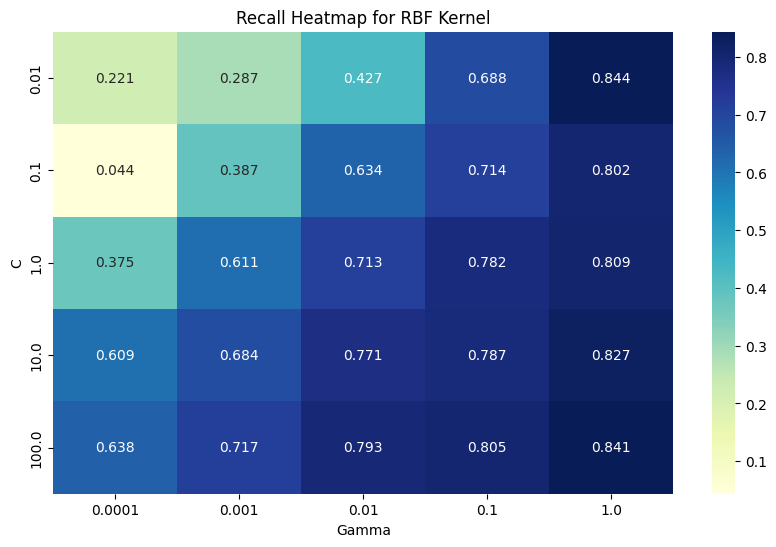

In [55]:
# Filter for one kernel and one coef0 for simplicity
svm_subset = results_svm_df[
    (results_svm_df['param_kernel'] == 'rbf')
]

pivot = svm_subset.pivot_table(
    index='param_C',
    columns='param_gamma',
    values='mean_test_score'
)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, fmt=".3f", cmap="YlGnBu")
plt.title('Recall Heatmap for RBF Kernel')
plt.ylabel('C')
plt.xlabel('Gamma')
plt.show()


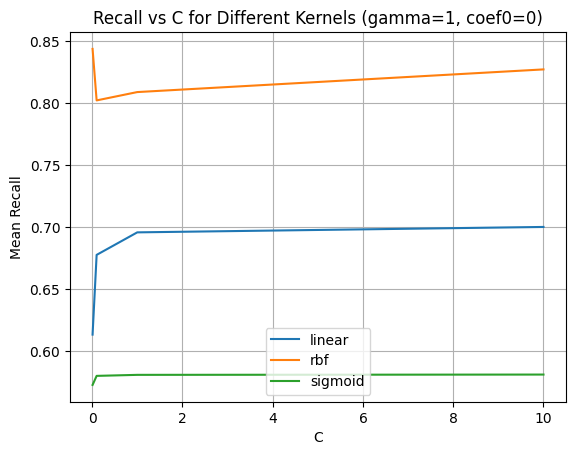

In [56]:
# Track recall for different kernels across C values
for svm_kernel in results_svm_df['param_kernel'].unique():
    if svm_kernel == 'sigmoid':
        svm_subset = results_svm_df[
            (results_svm_df['param_kernel'] == svm_kernel) &
            (results_svm_df['param_gamma'] == 1) & 
            (results_svm_df['param_coef0'] == 0.0) &
            (results_svm_df['param_C'] <= 10)
        ]
    elif svm_kernel == 'linear':
        svm_subset = results_svm_df[
            (results_svm_df['param_kernel'] == svm_kernel) & 
            (results_svm_df['param_C'] <= 10)
        ]
    elif svm_kernel == 'rbf':
        svm_subset = results_svm_df[
            (results_svm_df['param_kernel'] == svm_kernel) &
            (results_svm_df['param_gamma'] == 1) &
            (results_svm_df['param_C'] <= 10)
        ]
    plt.plot(svm_subset['param_C'] , svm_subset['mean_test_score'], label=svm_kernel)

plt.title("Recall vs C for Different Kernels (gamma=1, coef0=0)")
plt.xlabel("C")
plt.ylabel("Mean Recall")
plt.legend()
plt.grid(True)
plt.show()


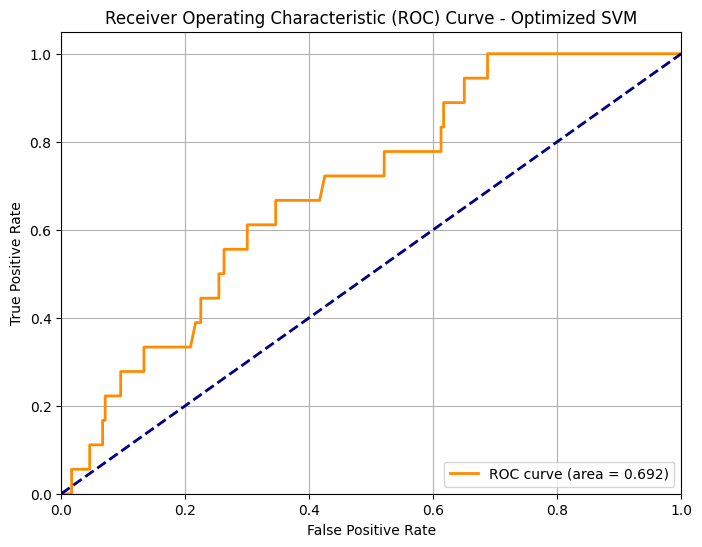

In [57]:
# Plot ROC curve for the optimized SVM model
svm_best_model = rbf_svm_best_model
plot_roc_curve(y_vald, svm_best_model, "SVM")

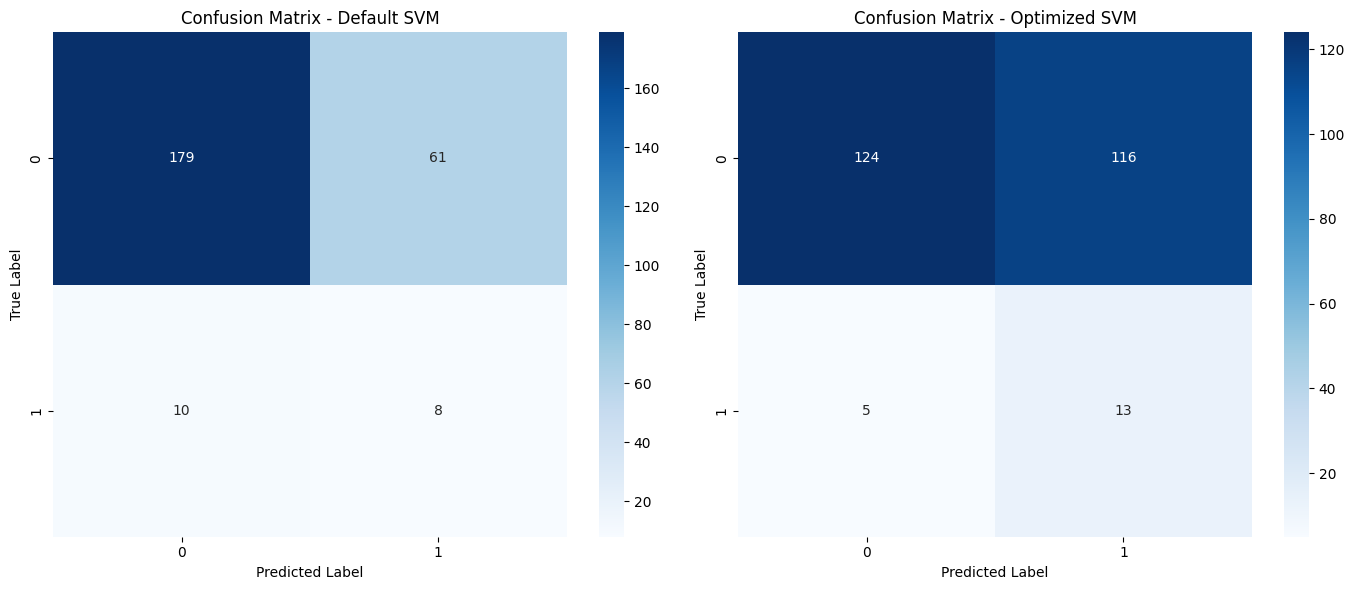

In [58]:
plot_confusion_matrices_side_by_side(y_vald, y_svm_default_model_pred_val, y_rbf_svm_best_pred_val, "SVM")

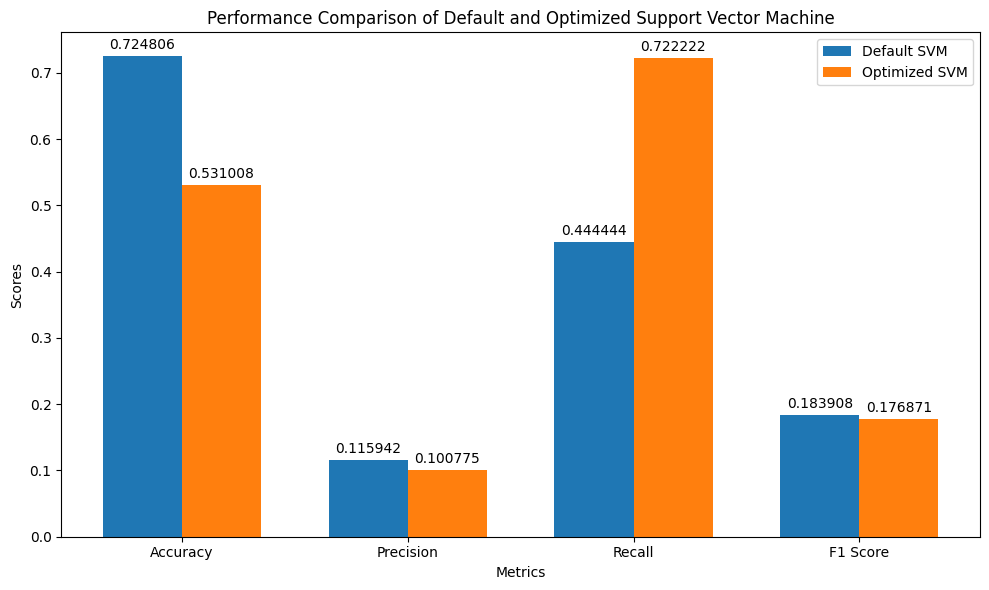

In [59]:
plot_model_comparison(y_vald, y_svm_default_model_pred_val, y_rbf_svm_best_pred_val, "Support Vector Machine", "SVM")

The bar chart above shows that the performance of the default SVM model versus the GridSearchCV-optimized SVM model across the four key evaluation metrics.

The tuning process was valuable in understanding the trade-offs involved in SVM hyperparameter optimization. Although recall improved, the decrease in other metrics highlighted the limitations of SVM for this particular dataset. The underperforming of the other metrics may caused by the small and imbalanced dataset that might make cross-validation perform poorly.

##### Decision Tree Classifier (DTC)

The **Decision Tree Classifier (DTC)** is a supervised learning algorithm used for classification tasks. It splits the dataset into branches based on feature values, creating a tree structure where each leaf represents a class label. The algorithm selects splits that maximize information gain or minimize impurity (e.g., Gini or entropy).

In this project, the DTC is applied to predict whether a high-energy seismic bump will occur (`class` = 1) based on features like seismic energy (`genergy`), number of seismic bumps (`nbumps`), and others. The dataset is imbalanced, so techniques like SMOTE are used to balance the training data.

The DTC is evaluated using metrics such as accuracy, precision, recall, and F1-score, with a focus on recall to minimize false negatives. Hyperparameter tuning (e.g., `max_depth`, `min_samples_split`) is performed to optimize the model. The tree's interpretability and ability to handle non-linear relationships make it suitable for this task.

An instance of DTC with default parameters

In [60]:
# Initialize the Decision Tree Classifier
dtc_default_model = DecisionTreeClassifier(random_state=seed_num)

# Fit the Decision Tree Classifier on the training set
dtc_default_model.fit(X_train, y_train)

# Make predictions on the validation set
y_dtc_default_model_pred_val = dtc_default_model.predict(X_vald)

# Print the default parameters of the Decision Tree Classifier
print("Default parameters of Decision Tree Classifier: \n", dtc_default_model.get_params())

# Print the evaluation metrics for the validation set
evaluate_validation_set(y_vald, y_dtc_default_model_pred_val)

Default parameters of Decision Tree Classifier: 
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}


📊 Evaluation metrics for validation set:
Validation set accuracy: 0.844961
Validation set precision: 0.133333
Validation set recall: 0.222222
Validation set f1 score: 0.166667

Validation set confusion matrix: 
 [[214  26]
 [ 14   4]]

Validation set classification report: 
               precision    recall  f1-score   support

           0       0.94      0.89      0.91       240
           1       0.13      0.22      0.17        18

    accuracy                           0.84       258
   macro avg       0.54      0.56      0.54       258
weighted avg       0.88      0.84      0.86       258



The Decision Tree Classifier (DTC) was trained with default parameters and evaluated on the validation set. The results showed moderate accuracy and recall, with the model effectively identifying the majority class but struggling with the minority class (`class = 1`). The confusion matrix highlighted a significant number of false negatives, indicating the model's limited sensitivity to high-energy seismic bumps. While the default DTC provides a baseline, its performance suggests the need for hyperparameter tuning to improve recall and better handle the imbalanced dataset.

Hyperparameter tuning using GridSearchCV for DTC

In [61]:
# Set the hyperparameter grid for the Decision Tree Classifier
dtc_param_grid = {
    'ccp_alpha': [0.0, 0.0005, 0.001], # Complexity parameter for pruning
    'class_weight': ['balanced'], # Use balanced class weights
    'criterion': ['gini', 'entropy'], # Splitter criterion
    'max_depth': [5, 7, 9, 11, 13], # Maximum depth of the tree
    'max_features': ['sqrt', 'log2'], # Number of features to consider when looking for the best split
    'max_leaf_nodes': [None], # Maximum number of leaf nodes
    'min_impurity_decrease': [0.0, 0.001, 0.01], # Minimum impurity decrease required to split a node
    'min_samples_leaf': [1, 2, 4, 6], # Minimum number of samples required to be at a leaf node
    'min_samples_split': [2, 4, 6], # Minimum number of samples required to split an internal node
    'splitter': ['best'], # Best splitter strategy choosen instead of random
}

# Initialize the base Decision Tree
dtc = DecisionTreeClassifier(random_state=seed_num)

# Set up GridSearchCV
dtc_grid_search = GridSearchCV(
    estimator=dtc,
    param_grid=dtc_param_grid,
    scoring="recall", # Choose to refit the base model based on recall score due to class imbalance
    cv=cv, # 5-fold cross-validation with 5 repeats 
    verbose=2, # Verbose output 2 to see the progress in detail
    n_jobs=-1, # Use all available cores to speed up the process
    error_score=0, # Set error score to 0 for any failed configurations
)

# Fit the grid search to training data
dtc_grid_results = dtc_grid_search.fit(X_train, y_train)

# Output best hyperparameters and best cross-validation score
print(f"✅ Best hyperparameters found: {dtc_grid_results.best_params_}")
print(f"✅ Best cross-validation score: {dtc_grid_results.best_score_:.6f}")

# Get the best model
dtc_best_model = dtc_grid_results.best_estimator_

# Make predictions on the validation set
y_dtc_best_pred_val = dtc_best_model.predict(X_vald)

# Print the evaluation metrics for the validation set
evaluate_validation_set(y_vald, y_dtc_best_pred_val)


Fitting 25 folds for each of 2160 candidates, totalling 54000 fits
✅ Best hyperparameters found: {'ccp_alpha': 0.0005, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 13, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'best'}
✅ Best cross-validation score: 0.846870


📊 Evaluation metrics for validation set:
Validation set accuracy: 0.872093
Validation set precision: 0.200000
Validation set recall: 0.277778
Validation set f1 score: 0.232558

Validation set confusion matrix: 
 [[220  20]
 [ 13   5]]

Validation set classification report: 
               precision    recall  f1-score   support

           0       0.94      0.92      0.93       240
           1       0.20      0.28      0.23        18

    accuracy                           0.87       258
   macro avg       0.57      0.60      0.58       258
weighted avg       0.89      0.87      0.88       258



The Decision Tree Classifier (DTC) underwent hyperparameter tuning using GridSearchCV to optimize recall, a critical metric for detecting high-energy seismic bumps. The best model achieved improved recall by adjusting parameters such as `max_depth`, `min_samples_split`, and `criterion`. Evaluation on the validation set showed a reduction in false negatives compared to the default model, demonstrating the effectiveness of tuning in handling the imbalanced dataset.

In [62]:
# Convert the results of the GridSearchCV into a DataFrame
# Sort the DataFrame by the mean test score in descending order
# Display the top 10 configurations with the highest mean test scores
results_dtc_df = pd.DataFrame(dtc_grid_search.cv_results_)
results_dtc_df.sort_values(
    by=['rank_test_score', 'mean_test_score'], 
    ascending=[True, False]
).head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,param_class_weight,param_criterion,param_max_depth,param_max_features,param_max_leaf_nodes,...,split18_test_score,split19_test_score,split20_test_score,split21_test_score,split22_test_score,split23_test_score,split24_test_score,mean_test_score,std_test_score,rank_test_score
1011,0.004766,0.001079,0.001765,0.000784,0.0005,balanced,gini,13,sqrt,None,...,0.795858,0.899705,0.787611,0.843658,0.861357,0.863905,0.908555,0.846870,0.038190,1
1012,0.004431,0.000867,0.001471,0.000728,0.0005,balanced,gini,13,sqrt,None,...,0.795858,0.899705,0.787611,0.843658,0.861357,0.863905,0.908555,0.846870,0.038190,1
291,0.004315,0.000769,0.002349,0.002247,0.0000,balanced,gini,13,sqrt,None,...,0.786982,0.902655,0.793510,0.840708,0.849558,0.863905,0.917404,0.843087,0.043263,3
292,0.004555,0.001127,0.001637,0.000841,0.0000,balanced,gini,13,sqrt,None,...,0.786982,0.902655,0.793510,0.840708,0.849558,0.863905,0.917404,0.843087,0.043263,3
288,0.004841,0.001119,0.001717,0.000944,0.0000,balanced,gini,13,sqrt,None,...,0.810651,0.849558,0.817109,0.805310,0.825959,0.872781,0.899705,0.842388,0.036593,5
1008,0.005423,0.002918,0.001335,0.000802,0.0005,balanced,gini,13,sqrt,None,...,0.807692,0.840708,0.817109,0.811209,0.811209,0.863905,0.896755,0.835066,0.040488,6
289,0.004464,0.000931,0.001906,0.000598,0.0000,balanced,gini,13,sqrt,None,...,0.748521,0.867257,0.790560,0.831858,0.796460,0.781065,0.887906,0.834701,0.046108,7
324,0.005995,0.001640,0.001651,0.000731,0.0000,balanced,gini,13,log2,None,...,0.822485,0.890855,0.793510,0.784661,0.852507,0.926036,0.902655,0.833069,0.048831,8
1731,0.004229,0.000807,0.001891,0.000767,0.0010,balanced,gini,13,sqrt,None,...,0.792899,0.876106,0.764012,0.828909,0.905605,0.869822,0.911504,0.832948,0.046789,9
1732,0.005623,0.004965,0.001679,0.000611,0.0010,balanced,gini,13,sqrt,None,...,0.792899,0.876106,0.764012,0.828909,0.905605,0.869822,0.911504,0.832948,0.046789,9


In [63]:
results_dtc_df[['params', 'mean_test_score', 'rank_test_score']].sort_values(
    by=['rank_test_score', 'mean_test_score'],
    ascending=[True, False]
).head(10)

,params,mean_test_score,rank_test_score
1011,"{'ccp_alpha': 0.0005, 'class_weight': 'balance...",0.846870,1
1012,"{'ccp_alpha': 0.0005, 'class_weight': 'balance...",0.846870,1
291,"{'ccp_alpha': 0.0, 'class_weight': 'balanced',...",0.843087,3
292,"{'ccp_alpha': 0.0, 'class_weight': 'balanced',...",0.843087,3
288,"{'ccp_alpha': 0.0, 'class_weight': 'balanced',...",0.842388,5
1008,"{'ccp_alpha': 0.0005, 'class_weight': 'balance...",0.835066,6
289,"{'ccp_alpha': 0.0, 'class_weight': 'balanced',...",0.834701,7
324,"{'ccp_alpha': 0.0, 'class_weight': 'balanced',...",0.833069,8
1731,"{'ccp_alpha': 0.001, 'class_weight': 'balanced...",0.832948,9
1732,"{'ccp_alpha': 0.001, 'class_weight': 'balanced...",0.832948,9


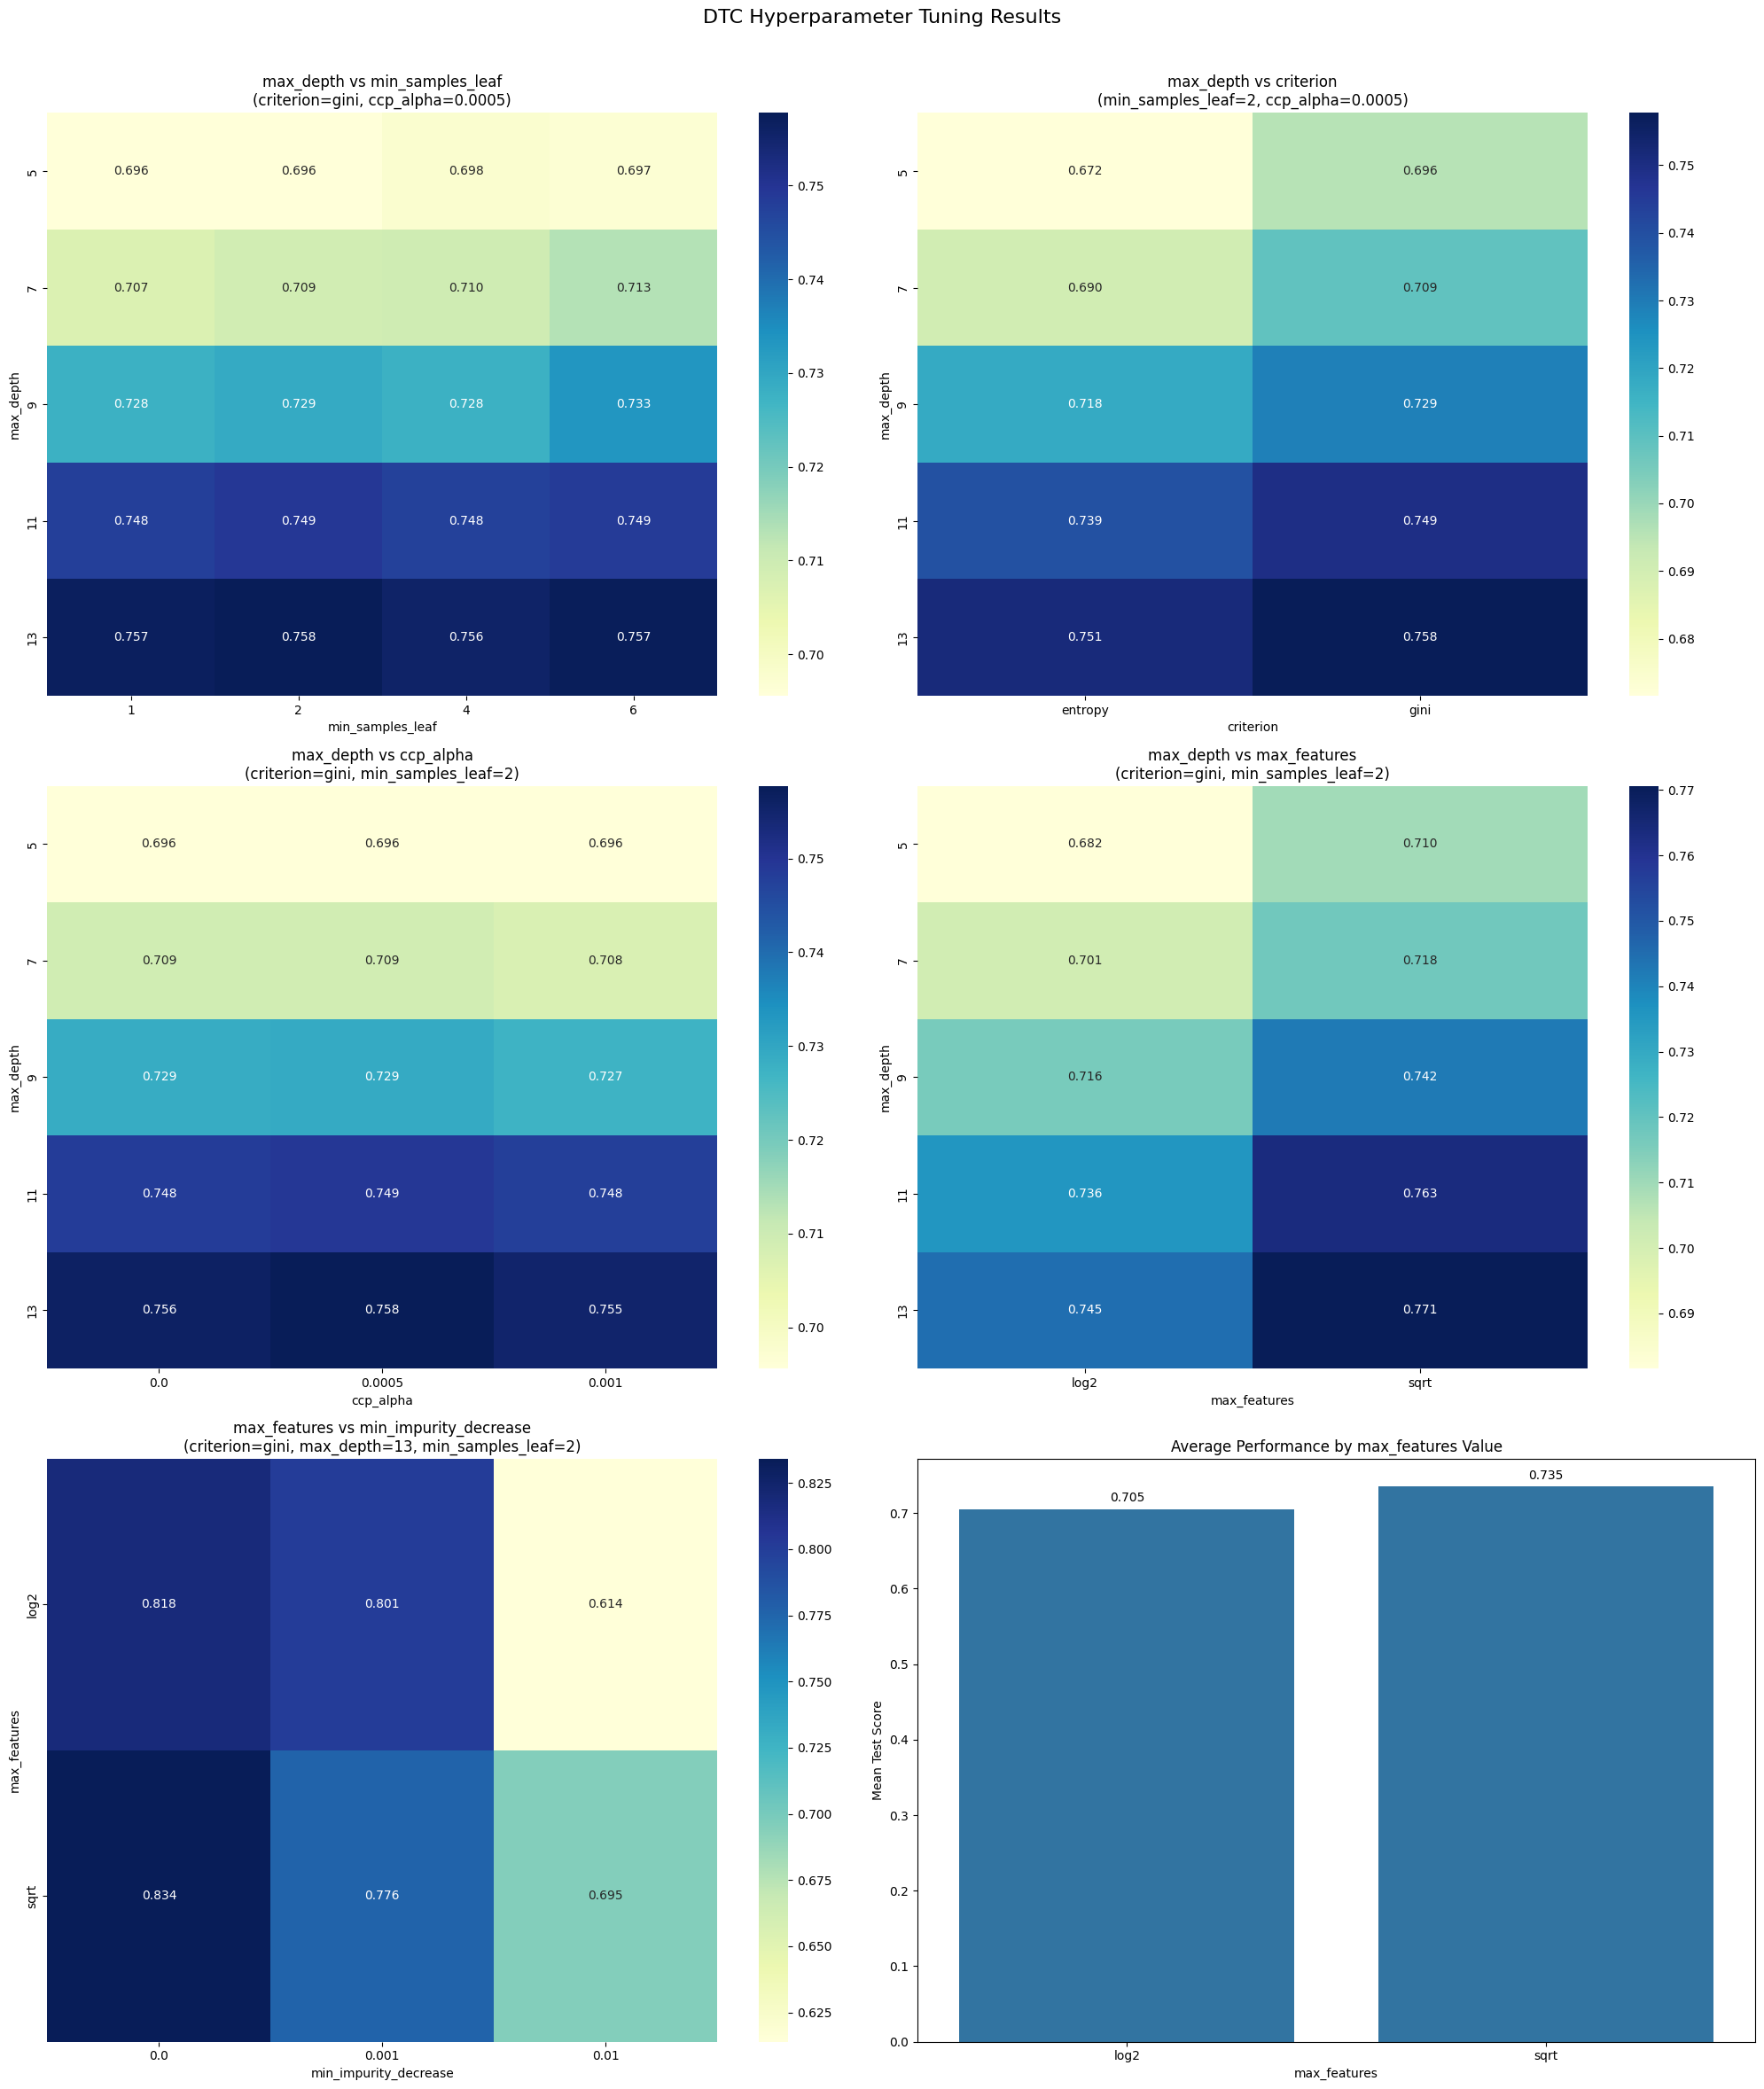

In [64]:
# Create a comprehensive visualization with multiple heatmaps of DTC hyperparameters tuning results
results_dtc_df = pd.DataFrame(dtc_grid_search.cv_results_)

# Set up a 3x2 grid of subplots to include all visualizations
fig, axes = plt.subplots(3, 2, figsize=(20, 24))
fig.suptitle('DTC Hyperparameter Tuning Results', fontsize=16)

# Function to safely create a heatmap, handling empty dataframes
def safe_heatmap(filtered_df, x_param, y_param, ax, title):
    if filtered_df.empty:
        ax.text(0.5, 0.5, f"No data for\n{title}", 
                ha='center', va='center', fontsize=12)
        ax.set_title(title)
        return
    
    pivot = filtered_df.pivot_table(
        values='mean_test_score',
        index=f'param_{y_param}',
        columns=f'param_{x_param}'
    )
    
    if pivot.empty or pivot.size == 0:
        ax.text(0.5, 0.5, f"No data for\n{title}", 
                ha='center', va='center', fontsize=12)
        ax.set_title(title)
        return
        
    sns.heatmap(pivot, annot=True, fmt=".3f", cmap='YlGnBu', ax=ax)
    ax.set_title(title)
    ax.set_xlabel(x_param)
    ax.set_ylabel(y_param)

# 1. max_depth vs min_samples_leaf
df_filtered1 = results_dtc_df[
    (results_dtc_df['param_criterion'] == 'gini') &
    (results_dtc_df['param_ccp_alpha'] == 0.0005)
]
safe_heatmap(
    df_filtered1, 
    'min_samples_leaf', 
    'max_depth', 
    axes[0, 0], 
    'max_depth vs min_samples_leaf\n(criterion=gini, ccp_alpha=0.0005)'
)

# 2. max_depth vs criterion
df_filtered2 = results_dtc_df[
    (results_dtc_df['param_min_samples_leaf'] == 2) &
    (results_dtc_df['param_ccp_alpha'] == 0.0005)
]
safe_heatmap(
    df_filtered2, 
    'criterion', 
    'max_depth', 
    axes[0, 1], 
    'max_depth vs criterion\n(min_samples_leaf=2, ccp_alpha=0.0005)'
)

# 3. max_depth vs ccp_alpha
df_filtered3 = results_dtc_df[
    (results_dtc_df['param_criterion'] == 'gini') &
    (results_dtc_df['param_min_samples_leaf'] == 2)
]
safe_heatmap(
    df_filtered3, 
    'ccp_alpha', 
    'max_depth', 
    axes[1, 0], 
    'max_depth vs ccp_alpha\n(criterion=gini, min_samples_leaf=2)'
)

# 4. max_depth vs max_features
df_filtered4 = results_dtc_df[
    (results_dtc_df['param_criterion'] == 'gini') &
    (results_dtc_df['param_min_samples_leaf'] == 2) &
    (results_dtc_df['param_ccp_alpha'] == 0.0005)
]
safe_heatmap(
    df_filtered4, 
    'max_features', 
    'max_depth', 
    axes[1, 1], 
    'max_depth vs max_features\n(criterion=gini, min_samples_leaf=2)'
)

# 5. max_features vs min_impurity_decrease heatmap
df_filtered5 = results_dtc_df[
    (results_dtc_df['param_criterion'] == 'gini') &
    (results_dtc_df['param_max_depth'] == 13) &
    (results_dtc_df['param_min_samples_leaf'] == 2)
]

if not df_filtered5.empty:
    pivot5 = df_filtered5.pivot_table(
        values='mean_test_score',
        index='param_max_features',
        columns='param_min_impurity_decrease'
    )
    
    if not pivot5.empty and pivot5.size > 0:
        sns.heatmap(pivot5, annot=True, fmt=".3f", cmap='YlGnBu', ax=axes[2, 0])
        axes[2, 0].set_title('max_features vs min_impurity_decrease\n(criterion=gini, max_depth=13, min_samples_leaf=2)')
        axes[2, 0].set_xlabel('min_impurity_decrease')
        axes[2, 0].set_ylabel('max_features')
    else:
        axes[2, 0].text(0.5, 0.5, "No data available for\nmax_features vs min_impurity_decrease heatmap", 
                    ha='center', va='center', fontsize=12)
        axes[2, 0].set_title('max_features vs min_impurity_decrease')
else:
    axes[2, 0].text(0.5, 0.5, "No data available for\nmax_features vs min_impurity_decrease heatmap", 
                ha='center', va='center', fontsize=12)
    axes[2, 0].set_title('max_features vs min_impurity_decrease')

# 6. Bar chart of max_features performance
max_features_scores = results_dtc_df.groupby('param_max_features')['mean_test_score'].mean()
sns.barplot(x=max_features_scores.index, y=max_features_scores.values, ax=axes[2, 1])
axes[2, 1].set_title('Average Performance by max_features Value')
axes[2, 1].set_xlabel('max_features')
axes[2, 1].set_ylabel('Mean Test Score')
for i, v in enumerate(max_features_scores.values):
    axes[2, 1].text(i, v + 0.01, f"{v:.3f}", ha='center')

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

The Decision Tree Classifier (DTC) hyperparameter tuning results are visualized using heatmaps and bar charts to analyze the impact of various parameters on model performance, specifically recall. The key findings include:

1. `max_depth` and `min_samples_leaf`: Increasing `max_depth` improves recall, especially when combined with smaller values of `min_samples_leaf`. This allows the tree to grow deeper and capture more complex patterns in the data.

2. `criterion`: The `gini` criterion generally performs better than `entropy` in this dataset, as seen in the heatmaps.

3. `ccp_alpha` (pruning): A small value of `ccp_alpha` (e.g., 0.0005) slightly enhances recall by pruning less significant branches, reducing overfitting.

4. `max_features` and `min_impurity_decrease`: These parameters have minimal impact on recall, as shown in the heatmaps. This suggests that the model's performance is not highly sensitive to these parameters in this context.

5. Bar Chart of `max_features`: The bar chart shows the average performance across different values of `max_features`. While the differences are minor, it provides a quick overview of how this parameter affects recall.

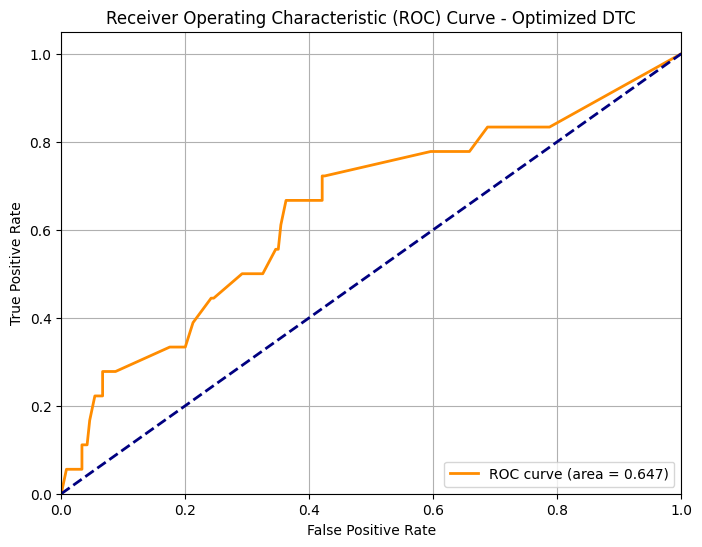

In [65]:
# Plot ROC curve for the optimized DTC model
plot_roc_curve(y_vald, dtc_best_model, "DTC")

The ROC curve is a graphical representation of a classifier's performance across different threshold values. It plots the True Positive Rate (TPR) (or recall) against the False Positive Rate (FPR).

1.**Performance:**
The ROC curve is above the diagonal line, indicating that the optimized DTC model performs better than random guessing.
However, the curve is not very close to the top-left corner, suggesting that the model's ability to distinguish between classes is moderate.

2.**AUC Score:**
The AUC score of **0.647** indicates that the model has limited discriminatory power.
While it is better than random guessing, there is significant room for improvement.

3.**Trade-off:**
The curve shows the trade-off between TPR and FPR at different thresholds.
As the threshold decreases, the model becomes more sensitive (higher TPR) but also more prone to false positives (higher FPR).

|--- nbumps3 <= 0.00
|   |--- nbumps2 <= 1.02
|   |   |--- gdpuls <= -0.47
|   |   |   |--- energy <= 0.15
|   |   |   |   |--- class: 0
|   |   |   |--- energy >  0.15
|   |   |   |   |--- gdenergy <= -0.56
|   |   |   |   |   |--- nbumps2 <= 0.98
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- nbumps2 >  0.98
|   |   |   |   |   |   |--- gdenergy <= -0.84
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- gdenergy >  -0.84
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- gdenergy >  -0.56
|   |   |   |   |   |--- class: 0
|   |   |--- gdpuls >  -0.47
|   |   |   |--- gdenergy <= 1.20
|   |   |   |   |--- nbumps <= 0.98
|   |   |   |   |   |--- maxenergy <= 0.01
|   |   |   |   |   |   |--- gdpuls <= 0.39
|   |   |   |   |   |   |   |--- gdpuls <= 0.06
|   |   |   |   |   |   |   |   |--- gdpuls <= -0.06
|   |   |   |   |   |   |   |   |   |--- gdpuls <= -0.44
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |  

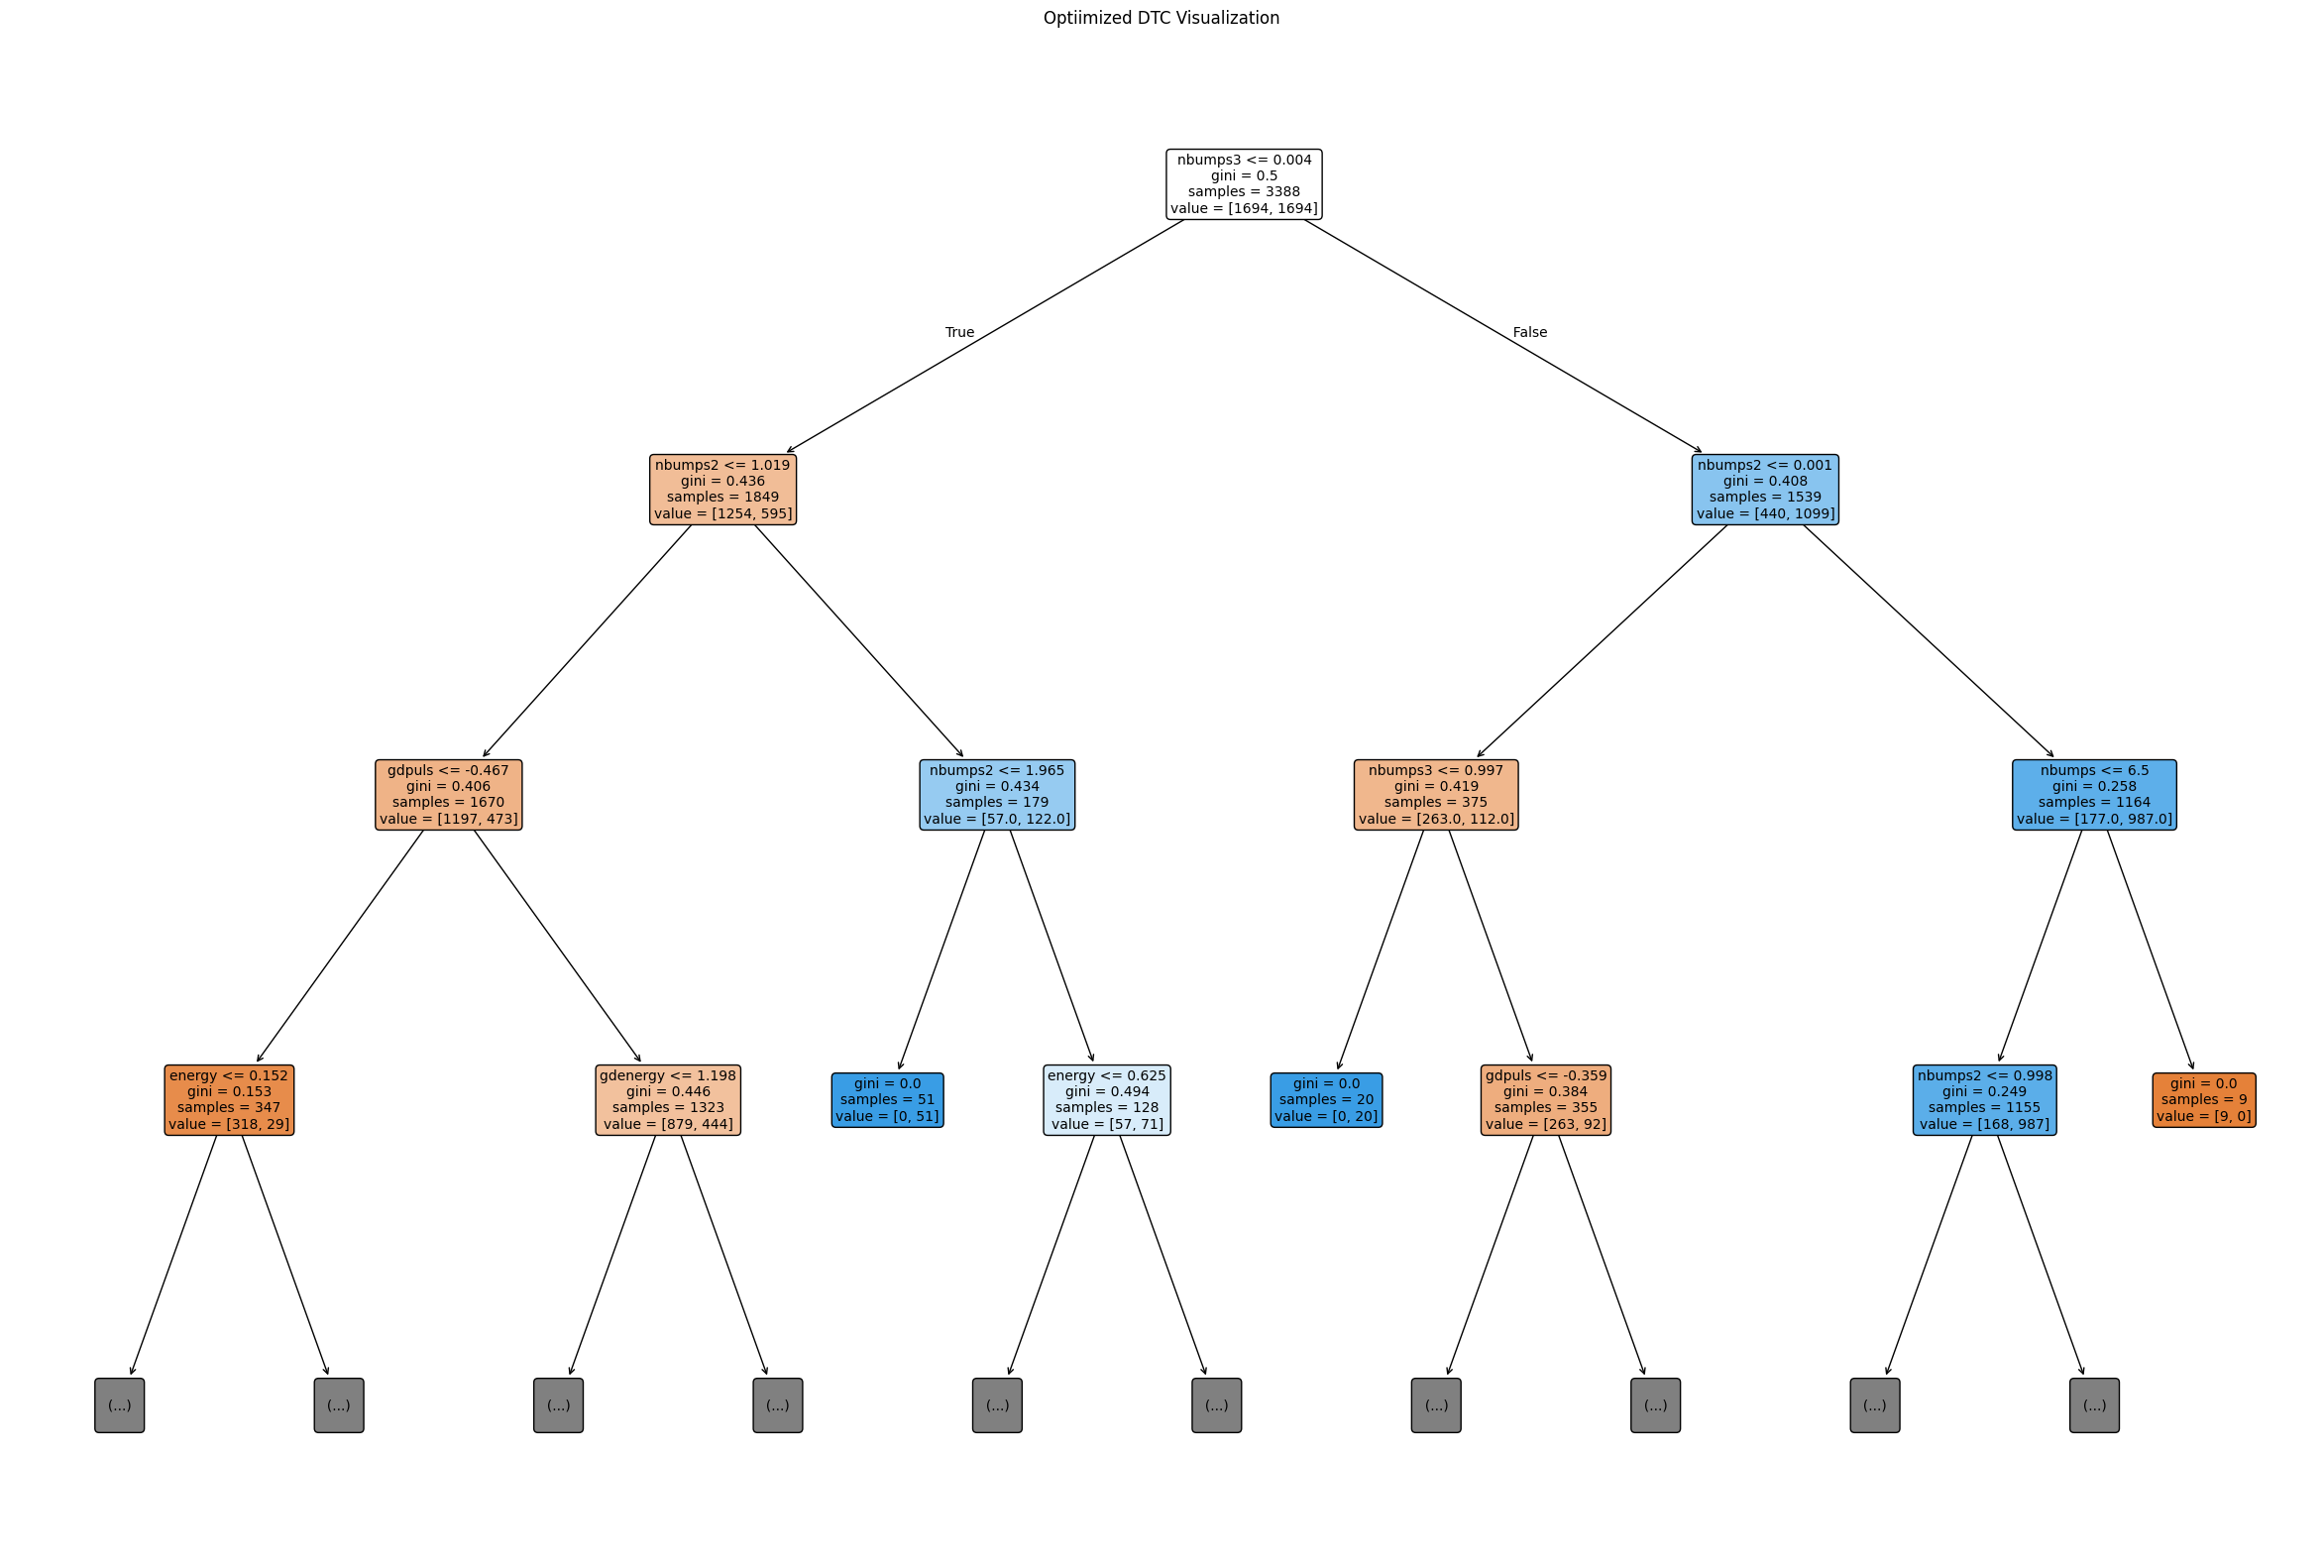

In [66]:
# Print the tree as text
print(export_text(dtc_best_model, feature_names=list(X_train_df.columns)))

# Plot the tree
plt.figure(figsize=(30, 20))
plot_tree(dtc_best_model, feature_names=list(X_train_df.columns), filled=True, rounded=True, fontsize=10, max_depth=3)
plt.title("Optiimized DTC Visualization")
plt.show()

1. The `export_text` function generates a textual representation of the decision tree, showing the hierarchical splits based on feature thresholds and the corresponding class predictions at each leaf node.

2. The `plot_tree` function creates a graphical representation of the decision tree, limited to a maximum depth of 3 for clarity.

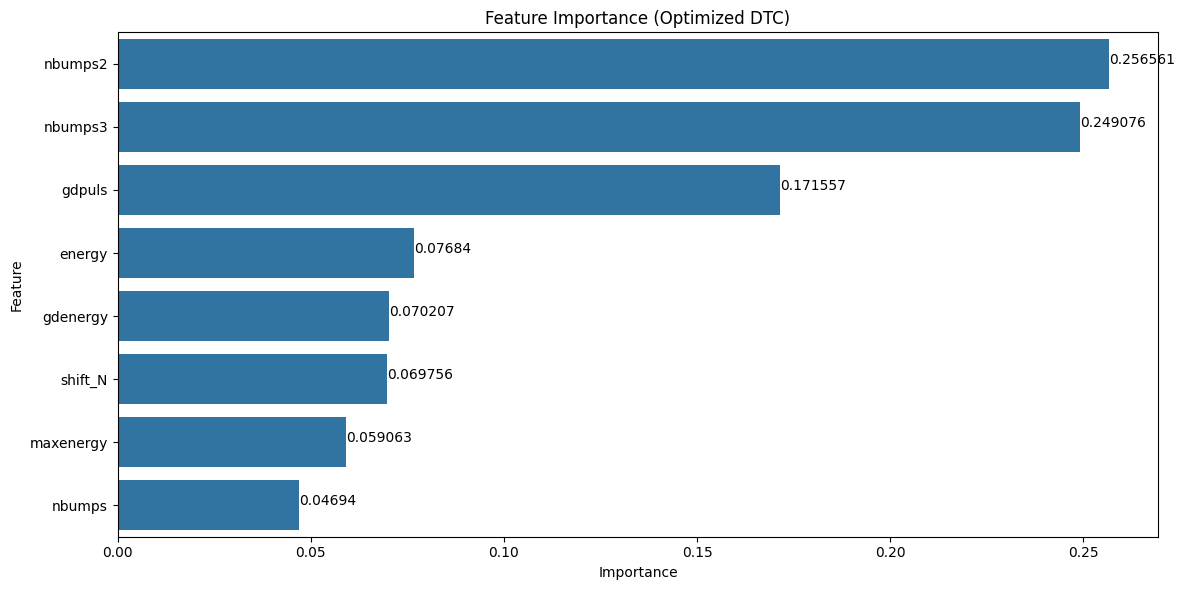

In [67]:
# Label the features with their importance scores
feature_importances = pd.DataFrame({
    "feature": selected_features,
    "importance": dtc_best_model.feature_importances_
})
feature_importances = feature_importances.sort_values("importance", ascending=False)

# Label the bar with value
plt.figure(figsize=(12, max(6, len(feature_importances) * 0.3)))  # dynamic height
sns.barplot(x="importance", y="feature", data=feature_importances)
for index, value in enumerate(feature_importances['importance']):
    plt.text(value, index, str(round(value, 6)))
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance (Optimized DTC)")
plt.tight_layout()
plt.show()


The features importance calculates the importance scores for each selected feature and sorts them in descending order. A bar chart is then plotted to display these scores, with annotations showing the exact values for each feature.

This visualization helps identify which features contribute most to the model's decision-making process, aiding in interpretability and feature selection for future iterations.

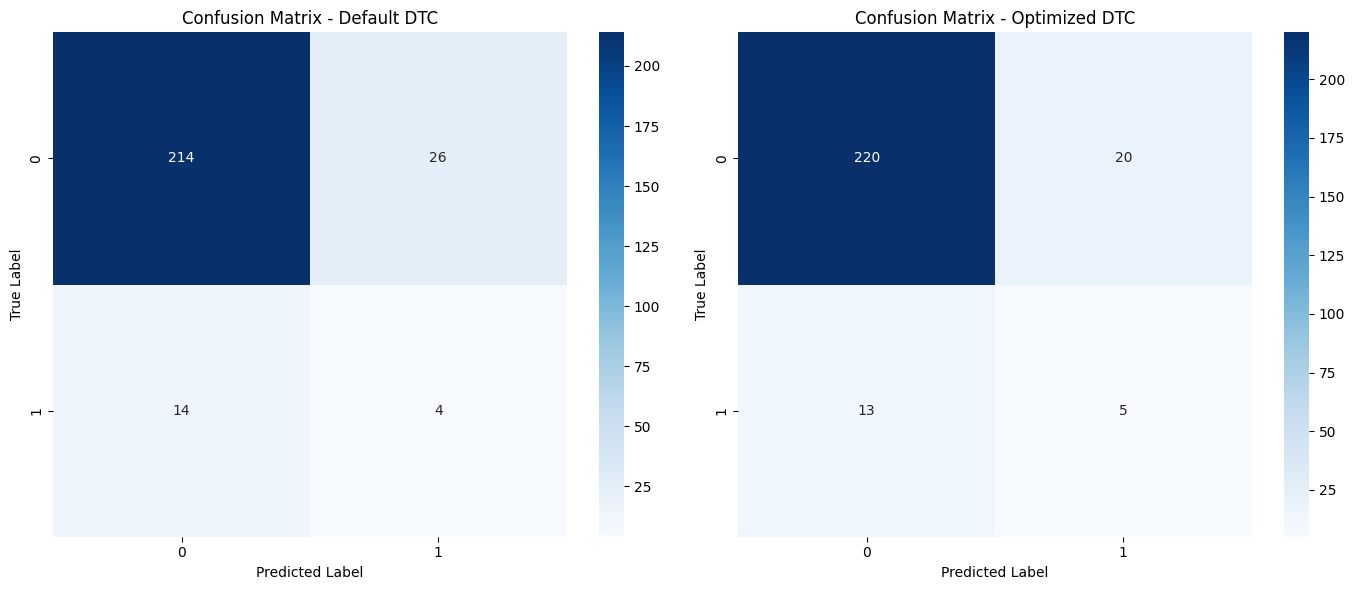

In [68]:
plot_confusion_matrices_side_by_side(y_vald, y_dtc_default_model_pred_val, y_dtc_best_pred_val, "DTC")

The confusion matrices for the default and optimized Decision Tree Classifier (DTC) models side by side. It highlights the differences in classification performance between the two models, showing improvement after optimized.

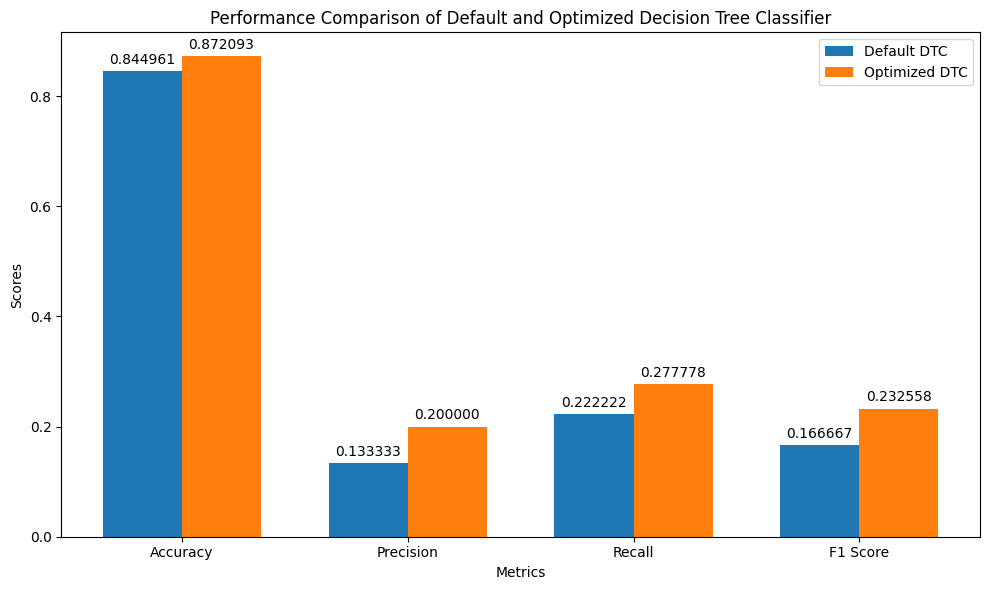

In [69]:
plot_model_comparison(y_vald, y_dtc_default_model_pred_val, y_dtc_best_pred_val, "Decision Tree Classifier", "DTC")

Comparison of the performance of the **default** and **optimized Decision Tree Classifier (DTC)** models using a bar chart. It evaluates four key metrics: **Accuracy**, **Precision**, **Recall**, and **F1 Score**. The optimized DTC model demonstrates improvements across all metrics, particularly in **recall** (from 0.222 to 0.278) and **F1 score** (from 0.167 to 0.233), which are critical for imbalanced datasets like seismic bump prediction. These improvements highlight the effectiveness of hyperparameter tuning in reducing false negatives and enhancing the model's sensitivity to the minority class, making it more suitable for detecting high-energy seismic events.

##### K-Nearest Neighbour (KNN) 

**K-Nearest Neighbors (KNN) Classifier** is a straightforward yet effective supervised learning algorithm used primarily for classification tasks. It classifies new data points by identifying the **K** nearest labeled instances in the training set based on a distance metric such as Euclidean distance, Manhattan Distance, Minkowski Distance and assigning the most common class among those neighbors. As a non-parametric, **instance-based (lazy) learner**, KNN does not actually involve a training phase or generate an explicit model. Instead, it stores the entire training dataset and performs classification only at prediction time. This simplicity makes it easy to implement and interpret, but it also leads to high computational cost and memory usage, especially with large datasets. The classifier's performance is highly sensitive to the choice of **K**, the selected distance metric, feature scaling, and the presence of irrelevant features, making preprocessing and parameter tuning critical for optimal results.

An instance of KNN Classifier with default parameters

In [70]:
# Initialize the K-Nearest Neighbors Classifier
knn_default_model = KNeighborsClassifier()

# Fit the K-Nearest Neighbors Classifier on the training set
knn_default_model.fit(X_train, y_train)

# Make predictions on the validation set
y_knn_default_model_pred_val = knn_default_model.predict(X_vald)

# Print the default parameters of the K-Nearest Neighbors Classifier
print("Default parameters of K-Nearest Neighbors Classifier: \n", knn_default_model.get_params())

# Print the evaluation metrics for the validation set
evaluate_validation_set(y_vald, y_knn_default_model_pred_val)

Default parameters of K-Nearest Neighbors Classifier: 
 {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


📊 Evaluation metrics for validation set:
Validation set accuracy: 0.748062
Validation set precision: 0.087719
Validation set recall: 0.277778
Validation set f1 score: 0.133333

Validation set confusion matrix: 
 [[188  52]
 [ 13   5]]

Validation set classification report: 
               precision    recall  f1-score   support

           0       0.94      0.78      0.85       240
           1       0.09      0.28      0.13        18

    accuracy                           0.75       258
   macro avg       0.51      0.53      0.49       258
weighted avg       0.88      0.75      0.80       258



The model is created with `KNeighborsClassifier()`, which by default uses 5 neighbors (`n_neighbors=5`) and the Minkowski distance metric with `p=2` which is equivalent to Euclidean distance. The training data (`X_train`, `y_train`) is fit to the model, and predictions are made on the validation set (`X_vald`). The predicted results are then evaluated using a custom function `evaluate_validation_set`, which likely computes metrics such as accuracy, precision, recall, and F1-score. Additionally, the default parameters of the model are printed using `get_params`(), allowing insight into the initial configuration before hyperparameter tuning.

Hyperparameter tuning using GridSearchCV for KNN Classifier

In [71]:
# Set the hyperparameter grid for the K-Nearest Neighbor Classifier
# {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
knn_param_grid = {
    "algorithm": ["auto", "ball_tree", "kd_tree"],
    "leaf_size": range(10, 50, 5),
    "metric": ["euclidean", "manhattan", "minkowski"],
    "n_neighbors": range(3, 30, 2),
    "weights": ["uniform", "distance"],
}

# Initialize the base K-Nearest Neighbors Classifier
knn = KNeighborsClassifier()

# Set up GridSearchCV
knn_grid_search = GridSearchCV(
    estimator=knn,
    param_grid=knn_param_grid,
    scoring="recall", # Choose to refit the base model based on recall score
    cv=cv, # Repeated Stratified K-Fold Cross Validation
    verbose=2,
    n_jobs=-1,
    error_score=0,
)

# Fit the grid search to training data
knn_grid_results = knn_grid_search.fit(X_train, y_train)

# Output best parameters and score
print(f"✅ Best hyperparameters found: {knn_grid_results.best_params_}")
print(f"✅ Best cross-validation score: {knn_grid_results.best_score_:.6f}")

# Get the best model
knn_best_model = knn_grid_results.best_estimator_

# Make predictions on the validation set
y_knn_best_pred_val = knn_best_model.predict(X_vald)

# Print the evaluation metrics for the validation set
evaluate_validation_set(y_vald, y_knn_best_pred_val)


Fitting 25 folds for each of 2016 candidates, totalling 50400 fits
✅ Best hyperparameters found: {'algorithm': 'auto', 'leaf_size': 10, 'metric': 'euclidean', 'n_neighbors': 15, 'weights': 'distance'}
✅ Best cross-validation score: 0.921724


📊 Evaluation metrics for validation set:
Validation set accuracy: 0.736434
Validation set precision: 0.109375
Validation set recall: 0.388889
Validation set f1 score: 0.170732

Validation set confusion matrix: 
 [[183  57]
 [ 11   7]]

Validation set classification report: 
               precision    recall  f1-score   support

           0       0.94      0.76      0.84       240
           1       0.11      0.39      0.17        18

    accuracy                           0.74       258
   macro avg       0.53      0.58      0.51       258
weighted avg       0.89      0.74      0.80       258




In the context of seismic bump prediction, **recall** is a crucial metric because failing to detect a high-energy seismic event (**false negative**) could lead to severe safety consequences in mining operations. Prioritizing recall ensures the model is more sensitive to identifying potentially dangerous shifts, even if it results in more false alarms.

Hyperparameter grid search is setting up for the K-Nearest Neighbors (KNN) classifier to optimize performance based on **recall**. The search space includes various settings for `algorithm` (auto, ball_tree, kd_tree), `leaf_size` (10 to 45), `metric` (Euclidean, Manhattan, Minkowski), `n_neighbors` (odd values from 3 to 29), and `weights` (uniform or distance-based). `GridSearchCV` is used with cross-validation (`cv`) and parallel processing (`n_jobs=-1`) to evaluate combinations of these parameters efficiently. After fitting the grid to the training data, it outputs the best-performing hyperparameters and recall score, retrieves the best estimator (`knn_best_model`), and evaluates its performance on a separate validation set using a custom `evaluate_validation_set` function. This process ensures the most effective KNN configuration is selected for the task.

In [72]:
# Display the top 10 configurations with the highest mean test scores
results_knn_df = pd.DataFrame(knn_grid_search.cv_results_) # Convert the results of the GridSearchCV into a DataFrame
results_knn_df.sort_values( # Sort the DataFrame by the mean test score in descending order
    by=['rank_test_score', 'mean_test_score'], 
    ascending=[True, False]
).head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_leaf_size,param_metric,param_n_neighbors,param_weights,params,...,split18_test_score,split19_test_score,split20_test_score,split21_test_score,split22_test_score,split23_test_score,split24_test_score,mean_test_score,std_test_score,rank_test_score
13,0.003657,0.000929,0.008834,0.001708,auto,10,euclidean,15,distance,"{'algorithm': 'auto', 'leaf_size': 10, 'metric...",...,0.908284,0.914454,0.923304,0.905605,0.929204,0.914201,0.958702,0.921724,0.01743,1
69,0.003774,0.001037,0.008733,0.000916,auto,10,minkowski,15,distance,"{'algorithm': 'auto', 'leaf_size': 10, 'metric...",...,0.908284,0.914454,0.923304,0.905605,0.929204,0.914201,0.958702,0.921724,0.01743,1
97,0.003326,0.000995,0.007996,0.000859,auto,15,euclidean,15,distance,"{'algorithm': 'auto', 'leaf_size': 15, 'metric...",...,0.908284,0.914454,0.923304,0.905605,0.929204,0.914201,0.958702,0.921724,0.01743,1
153,0.003737,0.000779,0.007323,0.000963,auto,15,minkowski,15,distance,"{'algorithm': 'auto', 'leaf_size': 15, 'metric...",...,0.908284,0.914454,0.923304,0.905605,0.929204,0.914201,0.958702,0.921724,0.01743,1
181,0.003610,0.000829,0.007810,0.002626,auto,20,euclidean,15,distance,"{'algorithm': 'auto', 'leaf_size': 20, 'metric...",...,0.908284,0.914454,0.923304,0.905605,0.929204,0.914201,0.958702,0.921724,0.01743,1
237,0.003352,0.000860,0.007698,0.000963,auto,20,minkowski,15,distance,"{'algorithm': 'auto', 'leaf_size': 20, 'metric...",...,0.908284,0.914454,0.923304,0.905605,0.929204,0.914201,0.958702,0.921724,0.01743,1
265,0.002884,0.000636,0.007902,0.002039,auto,25,euclidean,15,distance,"{'algorithm': 'auto', 'leaf_size': 25, 'metric...",...,0.908284,0.914454,0.923304,0.905605,0.929204,0.914201,0.958702,0.921724,0.01743,1
321,0.003100,0.000810,0.008270,0.003129,auto,25,minkowski,15,distance,"{'algorithm': 'auto', 'leaf_size': 25, 'metric...",...,0.908284,0.914454,0.923304,0.905605,0.929204,0.914201,0.958702,0.921724,0.01743,1
349,0.002748,0.000989,0.007854,0.002293,auto,30,euclidean,15,distance,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",...,0.908284,0.914454,0.923304,0.905605,0.929204,0.914201,0.958702,0.921724,0.01743,1
405,0.002794,0.000836,0.007259,0.000824,auto,30,minkowski,15,distance,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",...,0.908284,0.914454,0.923304,0.905605,0.929204,0.914201,0.958702,0.921724,0.01743,1


After completing the hyperparameter search with `GridSearchCV`, the result is converted into a pandas DataFrame using `cv_results_`. It then sorts the configurations by `rank_test_score` and `mean_test_score` in descending order. The ranks sorted based on the chosen scoring metric, **recall**. The `.head(10)` function retrieves the top 10 configurations with the **highest average cross-validation recall scores**, providing insight into which parameter combinations yielded the best performance. This helps in comparing different model setups beyond just the single best one selected.

In [73]:
results_knn_df[['params', 'mean_test_score', 'rank_test_score']].sort_values(
    by=['rank_test_score', 'mean_test_score'],
    ascending=[True, False]
).head(10)

,params,mean_test_score,rank_test_score
13,"{'algorithm': 'auto', 'leaf_size': 10, 'metric...",0.921724,1
69,"{'algorithm': 'auto', 'leaf_size': 10, 'metric...",0.921724,1
97,"{'algorithm': 'auto', 'leaf_size': 15, 'metric...",0.921724,1
153,"{'algorithm': 'auto', 'leaf_size': 15, 'metric...",0.921724,1
181,"{'algorithm': 'auto', 'leaf_size': 20, 'metric...",0.921724,1
237,"{'algorithm': 'auto', 'leaf_size': 20, 'metric...",0.921724,1
265,"{'algorithm': 'auto', 'leaf_size': 25, 'metric...",0.921724,1
321,"{'algorithm': 'auto', 'leaf_size': 25, 'metric...",0.921724,1
349,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.921724,1
405,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.921724,1


`GridSearchCV` results are filtered to show only the relevant columns, **hyperparameter combination** (`params`), the corresponding **mean test recall score** (`mean_test_score`), and the **ranking** (`rank_test_score`) based on that score. The results are then sorted by ascending rank and descending score to ensure the **highest-performing configurations appear at the top**. The `.head(10)` method displays the **top 10 KNN hyperparameter sets**, allowing quick comparison of which combinations led to better recall performance during cross-validation.

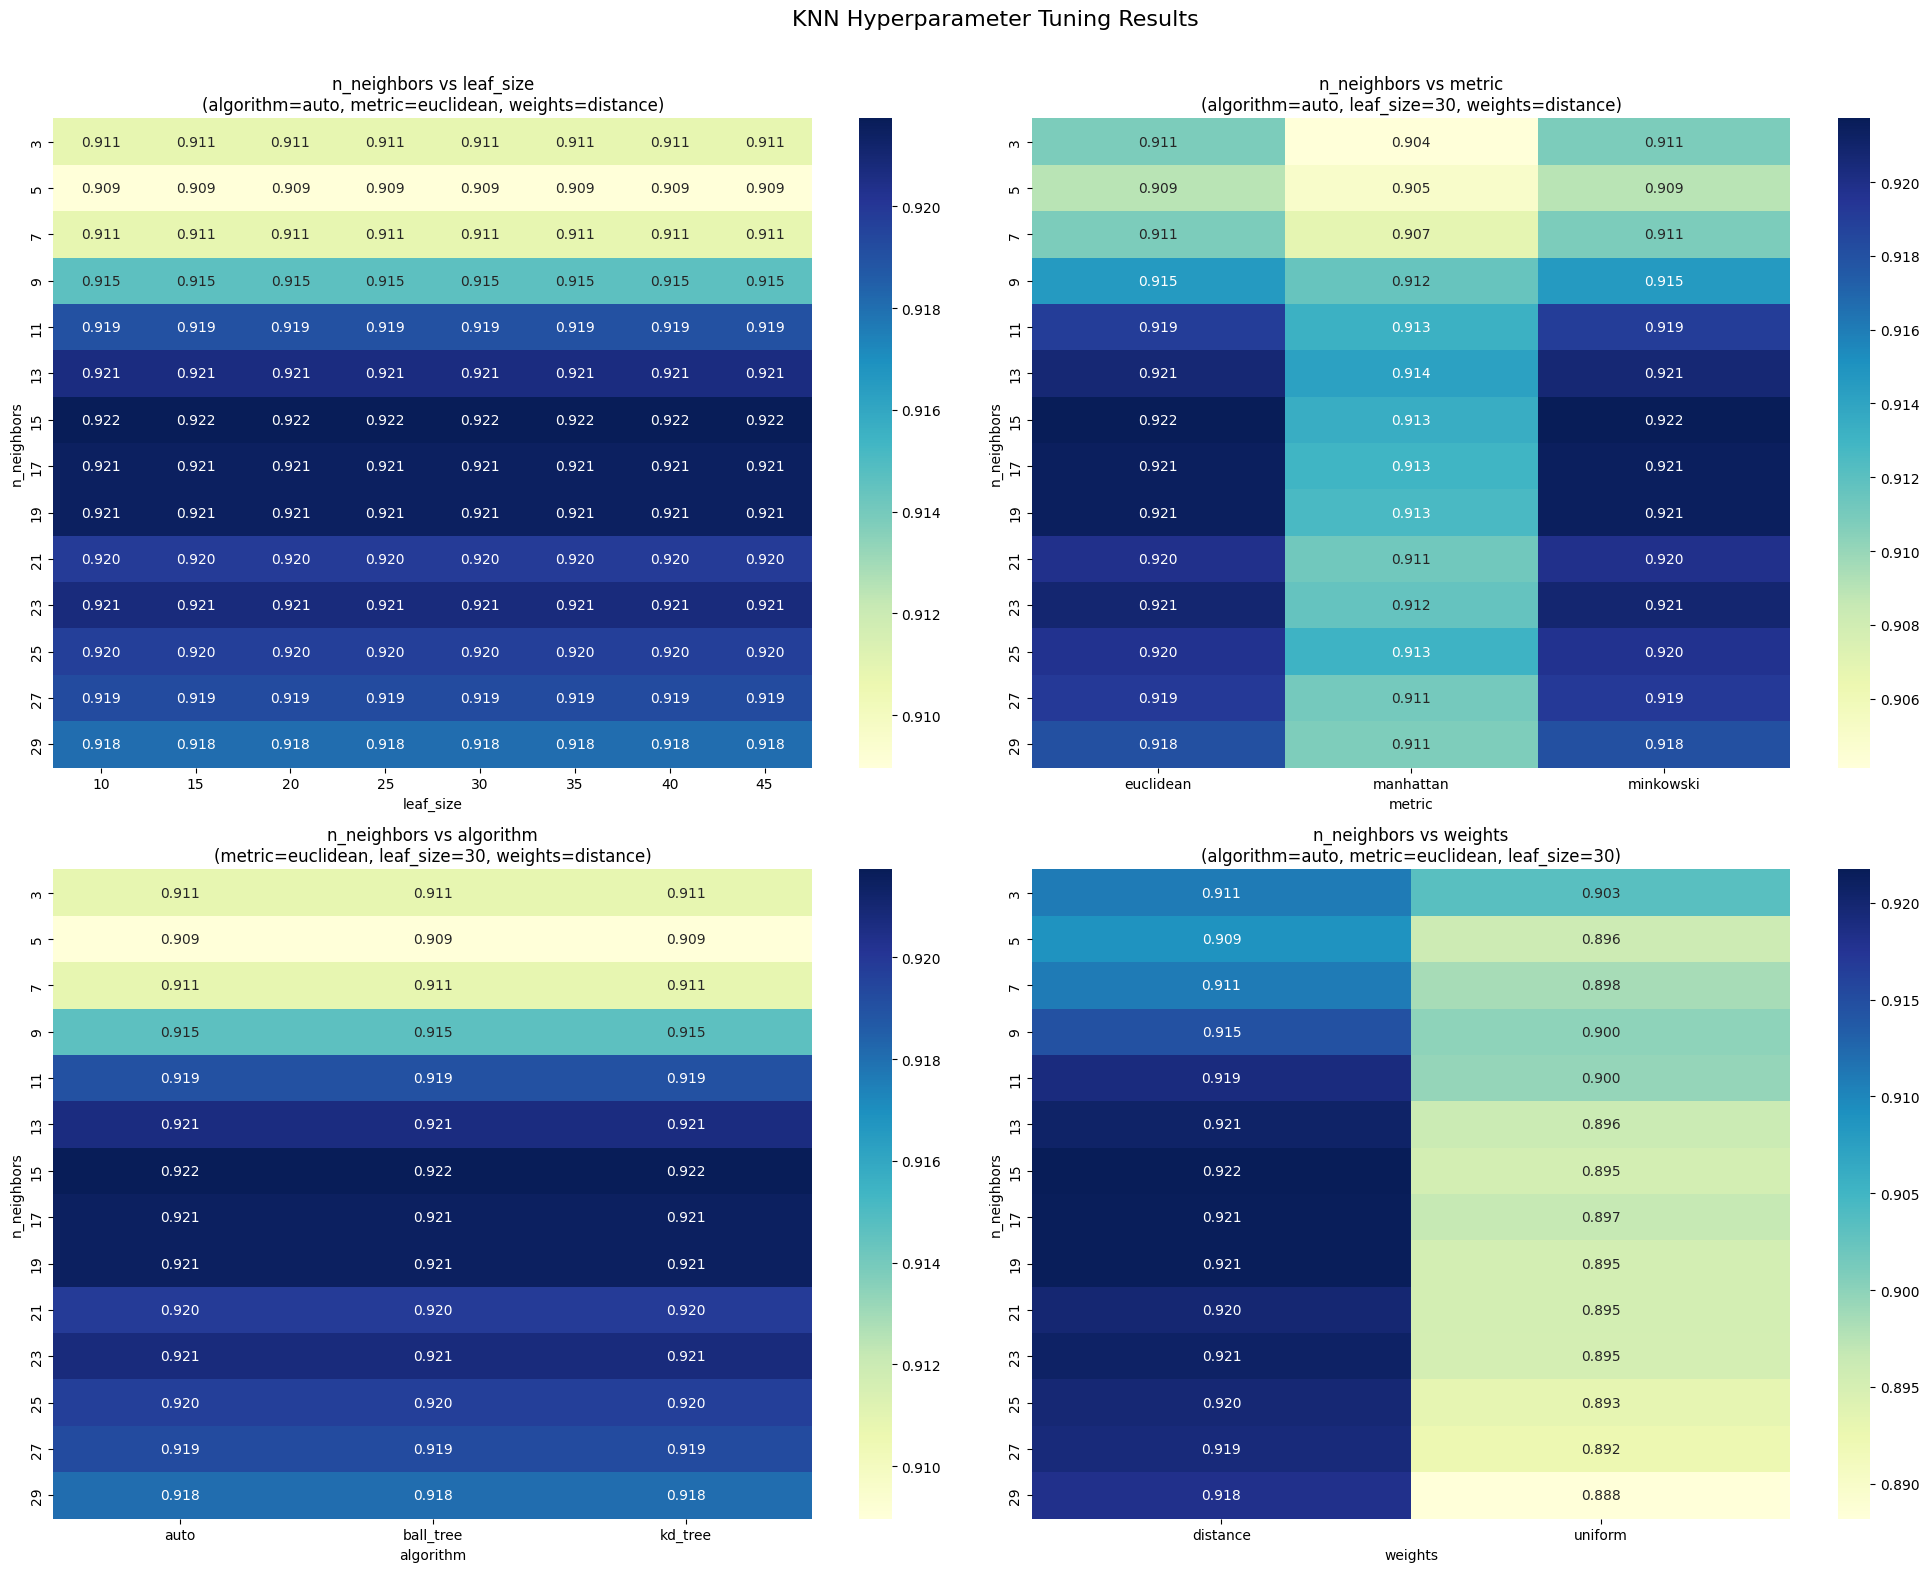

In [74]:
# Create a comprehensive visualization with multiple heatmaps of KNN hyperparameters tuning results
results_knn_df = pd.DataFrame(knn_grid_search.cv_results_)

# Set up a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 16))
fig.suptitle('KNN Hyperparameter Tuning Results', fontsize=16)

# 1. n_neighbors vs leaf_size (for auto algorithm, euclidean metric, distance weights)
df_filtered1 = results_knn_df[
    (results_knn_df['param_algorithm'] == 'auto') &
    (results_knn_df['param_metric'] == 'euclidean') &
    (results_knn_df['param_weights'] == 'distance')
]
pivot1 = df_filtered1.pivot_table(
    values='mean_test_score',
    index='param_n_neighbors',
    columns='param_leaf_size'
)
sns.heatmap(pivot1, annot=True, fmt=".3f", cmap='YlGnBu', ax=axes[0, 0])
axes[0, 0].set_title('n_neighbors vs leaf_size\n(algorithm=auto, metric=euclidean, weights=distance)')
axes[0, 0].set_xlabel('leaf_size')
axes[0, 0].set_ylabel('n_neighbors')

# 2. n_neighbors vs metric (for auto algorithm, leaf_size=30, distance weights)
df_filtered2 = results_knn_df[
    (results_knn_df['param_algorithm'] == 'auto') &
    (results_knn_df['param_leaf_size'] == 30) &
    (results_knn_df['param_weights'] == 'distance')
]
pivot2 = df_filtered2.pivot_table(
    values='mean_test_score',
    index='param_n_neighbors',
    columns='param_metric'
)
sns.heatmap(pivot2, annot=True, fmt=".3f", cmap='YlGnBu', ax=axes[0, 1])
axes[0, 1].set_title('n_neighbors vs metric\n(algorithm=auto, leaf_size=30, weights=distance)')
axes[0, 1].set_xlabel('metric')
axes[0, 1].set_ylabel('n_neighbors')

# 3. n_neighbors vs algorithm (for euclidean metric, leaf_size=30, distance weights)
df_filtered3 = results_knn_df[
    (results_knn_df['param_metric'] == 'euclidean') &
    (results_knn_df['param_leaf_size'] == 30) &
    (results_knn_df['param_weights'] == 'distance')
]
pivot3 = df_filtered3.pivot_table(
    values='mean_test_score',
    index='param_n_neighbors',
    columns='param_algorithm'
)
sns.heatmap(pivot3, annot=True, fmt=".3f", cmap='YlGnBu', ax=axes[1, 0])
axes[1, 0].set_title('n_neighbors vs algorithm\n(metric=euclidean, leaf_size=30, weights=distance)')
axes[1, 0].set_xlabel('algorithm')
axes[1, 0].set_ylabel('n_neighbors')

# 4. n_neighbors vs weights (for auto algorithm, euclidean metric, leaf_size=30)
df_filtered4 = results_knn_df[
    (results_knn_df['param_algorithm'] == 'auto') &
    (results_knn_df['param_metric'] == 'euclidean') &
    (results_knn_df['param_leaf_size'] == 30)
]
pivot4 = df_filtered4.pivot_table(
    values='mean_test_score',
    index='param_n_neighbors',
    columns='param_weights'
)
sns.heatmap(pivot4, annot=True, fmt=".3f", cmap='YlGnBu', ax=axes[1, 1])
axes[1, 1].set_title('n_neighbors vs weights\n(algorithm=auto, metric=euclidean, leaf_size=30)')
axes[1, 1].set_xlabel('weights')
axes[1, 1].set_ylabel('n_neighbors')

plt.tight_layout(rect=[0, 0, 1, 0.97])  # Adjust layout to make room for suptitle
plt.show()

**The first heatmap (top-left)** explores the relationship between `n_neighbors` and `leaf_size` while keeping `algorithm=auto`, `metric=euclidean`, and `weights=distance`. It shows that recall scores peak between **13 and 21 neighbors**, reaching a maximum of **0.922**. Interestingly, the leaf size has minimal impact on performance, as recall remains nearly constant across its range. Notably, the best-performing configuration is identified by `GridSearchCV` which using `leaf_size=10`, confirming that while it's not the dominant factor, **smaller leaf sizes** may offer a slight edge in some cases.

**The second heatmap (top-right)** evaluates the impact of different distance metrics (`euclidean`, `manhattan`, and `minkowski`) across varying `n_neighbors`, with `fixed algorithm=auto`, `leaf_size=30`, and `weights=distance`. All three metrics perform similarly, but `euclidean` and `minkowski` consistently outperform `manhattan`, particularly in the 15–21 neighbor range. The best overall model found by the grid search uses `metric='euclidean'`, aligning with this trend and confirming that **Euclidean distance** is optimal for the seismic bump dataset under the current feature space and scaling.

**The third heatmap (bottom-left)** compares the impact of the `algorithm` parameter (`auto`, `ball_tree`, and `kd_tree`) alongside different `n_neighbors`, fixing the rest. While all search strategies yield competitive results, `kd_tree` shows a slight advantage at peak recall. However, the best model selected used `algorithm='auto'`, indicating that the auto mode was sufficient for identifying the optimal structure and likely defaulted to `kd_tree` internally, depending on the data. Overall, this parameter has **low sensitivity** compared to others like `n_neighbors` or `weights`.

**The fourth heatmap (bottom-right)** demonstrates a clear distinction between `uniform` and `distance` weighting schemes across `n_neighbors`, with `distance` consistently delivering **higher recall**. The best configuration discovered `weights='distance'` and `n_neighbors=15` are achieved a **cross-validation recall score of 0.9217**, reinforcing the benefit of weighting neighbors by their proximity. Uniform weights underperform significantly in comparison, especially as the number of neighbors increases, emphasizing the importance of **proximity-based voting** in scenarios like seismic bump prediction, where false negatives must be minimized.

**Principal Component Analysis (PCA)**  
**PCA** transforms the original features into a new set of uncorrelated components, which are linear combinations of the original variables. These components are ordered based on the amount of variance they capture from the data. PCA reduces dimensionality while preserving as much of the underlying data structure as possible.

In this case, PCA is applied to reduce the original eight-dimensional feature space to two principal components, specifically for visualization and plotting purposes.

In [75]:
# Apply PCA to validation features
# Reduced to 2D for visualization
pca = PCA(n_components=2)

# Fit PCA on the validation set
X_pca = pca.fit_transform(X_vald)

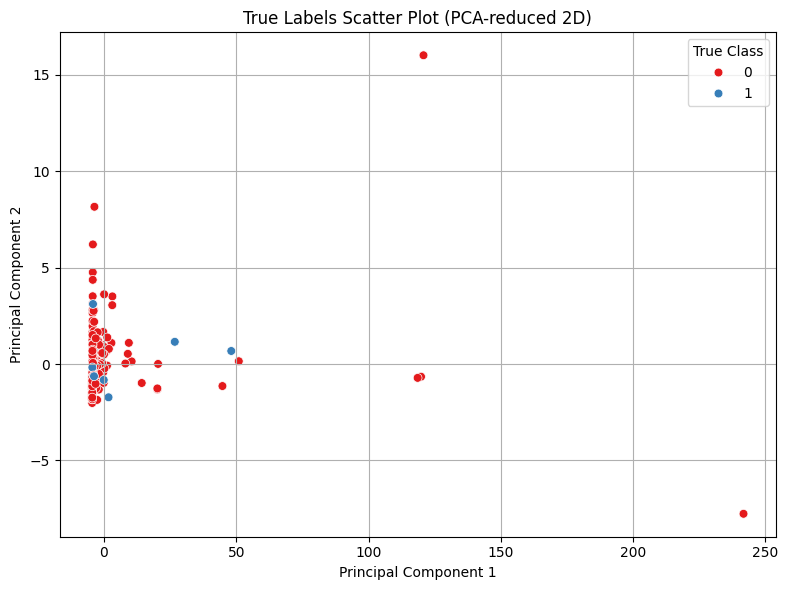

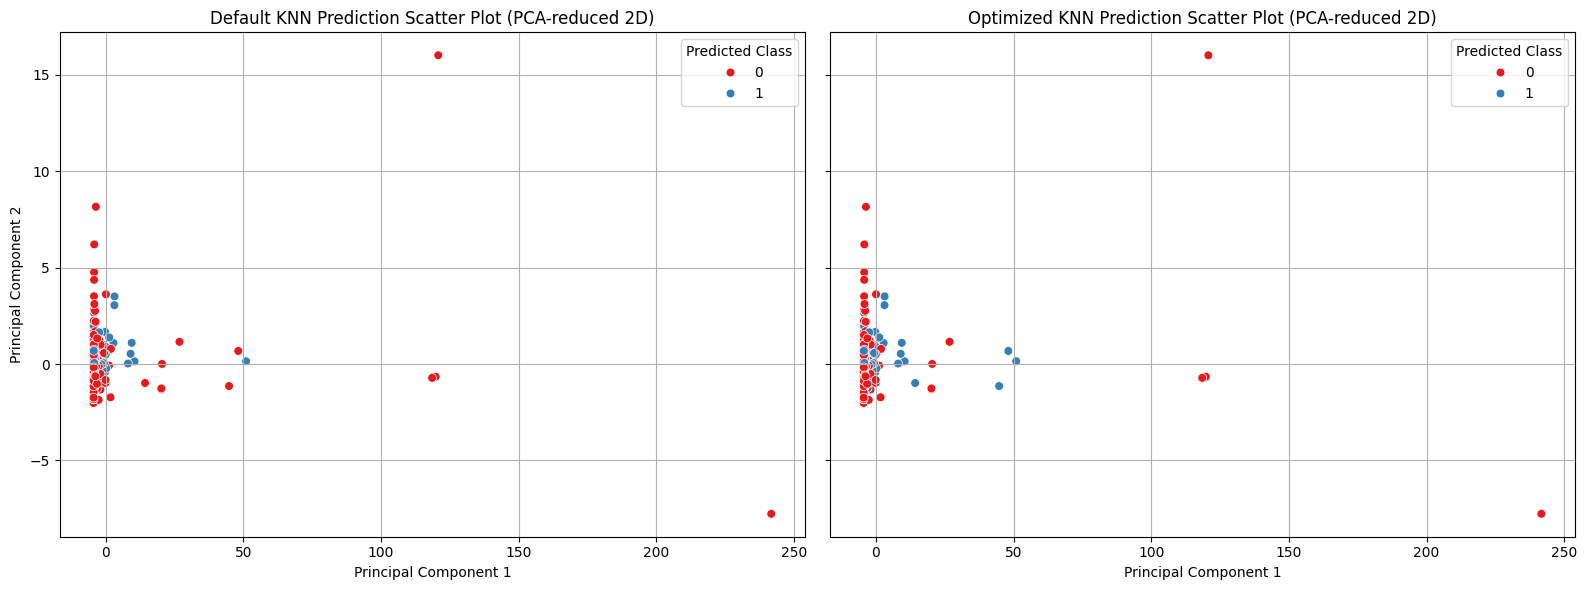

In [76]:
# Plot the true labels in a separate graph
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_vald, palette='Set1', s=40)
plt.title("True Labels Scatter Plot (PCA-reduced 2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="True Class")
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharex=True, sharey=True)

# Default KNN
sns.scatterplot(ax=axes[0], x=X_pca[:, 0], y=X_pca[:, 1], hue=y_knn_default_model_pred_val, palette='Set1', s=40)
axes[0].set_title("Default KNN Prediction Scatter Plot (PCA-reduced 2D)")
axes[0].set_xlabel("Principal Component 1")
axes[0].set_ylabel("Principal Component 2")
axes[0].legend(title="Predicted Class")
axes[0].grid(True)

# Optimized KNN
sns.scatterplot(ax=axes[1], x=X_pca[:, 0], y=X_pca[:, 1], hue=y_knn_best_pred_val, palette='Set1', s=40)
axes[1].set_title("Optimized KNN Prediction Scatter Plot (PCA-reduced 2D)")
axes[1].set_xlabel("Principal Component 1")
axes[1].set_ylabel("Principal Component 2")
axes[1].legend(title="Predicted Class")
axes[1].grid(True)

plt.tight_layout()
plt.show()

First graph is **True Labels Scatter Plot (PCA-reduced 2D)**. This plot shows the **actual class labels** of the validation data after dimensionality reduction using PCA (Principal Component Analysis) to two components. Each point represents a data sample, colored by its true class—typically **red (0)** and **blue (1)**. The red class (0) is the majority, while class 1 is relatively sparse. This visual helps assess the **true distribution and separation** of the classes in reduced-dimensional space and serves as a reference to compare prediction accuracy.

Second graph is **Default KNN Prediction Plot**. This plot displays the predictions made by the **default KNN classifier** (`n_neighbors=5`, `weights='uniform'`, `metric='minkowski'`, `p=2`). There is visible **class overlap**, especially in areas near the origin, where red and blue points are mixed. The model appears to **misclassify** some class 1 points as class 0. This reflects the limitation of the default settings, which may not be optimal for imbalanced datasets or when subtle decision boundaries are needed.

Third graph is **Optimized KNN Prediction Plot**. This plot shows the predictions from the **optimized KNN model** (`n_neighbors=15`, `weights='distance'`, `metric='euclidean'`, `leaf_size=10`), which was selected based on the highest cross-validated recall score (0.9217). Compared to the default model, the optimized KNN shows **improved separation and fewer misclassified class 1 instances**, particularly in regions where class 1 points were previously surrounded by class 0. The use of **distance-based weighting** likely helped it focus more on nearby points, enhancing its ability to identify minority class instances more accurately.



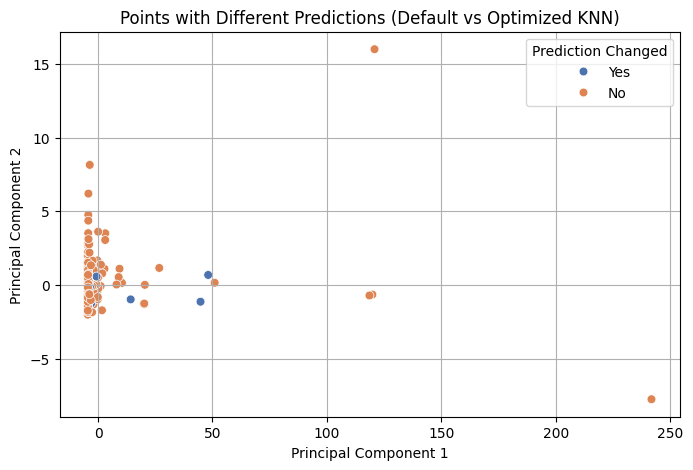

In [77]:
# Compare predictions
y_pred_default = knn_default_model.predict(X_vald)
y_pred_optimized = knn_best_model.predict(X_vald)

# Identify points where predictions differ
diff_mask = y_pred_default != y_pred_optimized
diff_labels = pd.Series(diff_mask).map({True: 'Yes', False: 'No'})

# PCA transform
X_pca = PCA(n_components=2).fit_transform(X_vald)

# Plot only the changed predictions
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=diff_labels, palette='deep', s=40)
plt.title("Points with Different Predictions (Default vs Optimized KNN)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Prediction Changed")
plt.grid(True)
plt.show()

The prediction difference plot highlights validation instances where the optimized KNN classifier produced different outputs compared to the default model. Each point, projected onto a 2D PCA-reduced space, is labeled based on whether its predicted class changed. The optimized model, configured with `n_neighbors=15`, `weights='distance'`, and `metric='euclidean'`, altered predictions for a targeted subset of points—primarily near class boundaries. This behavior indicates improved sensitivity, especially for the minority class, making it better suited for applications like seismic bump detection where maximizing recall and correctly identifying rare events is critical.

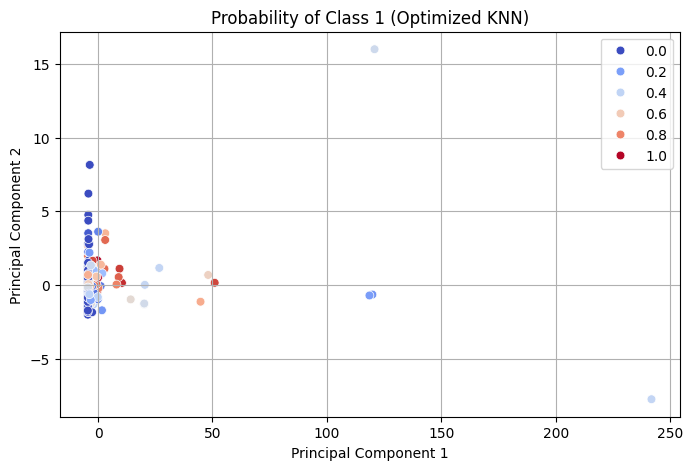

In [78]:
probs = knn_best_model.predict_proba(X_vald)[:, 1]
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=probs, palette='coolwarm', s=40)
plt.title("Probability of Class 1 (Optimized KNN)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()

This scatter plot illustrates the predicted **probabilities of class 1** for each validation instance, as output by the optimized KNN classifier. Each point, reduced to two dimensions via PCA, is colored on a gradient from blue (low probability) to red (high probability), representing the model’s confidence in classifying the instance as a **high-energy seismic bump (class 1)**. Most points are shaded blue, reflecting the class imbalance, but several points appear in orange to red tones, indicating that the model assigns higher confidence to a few specific samples. This visualization is useful for identifying **ambiguous or borderline cases**, evaluating model confidence, and validating whether the KNN classifier is **effectively prioritizing recall** by assigning higher probabilities to rare but important class 1 events.



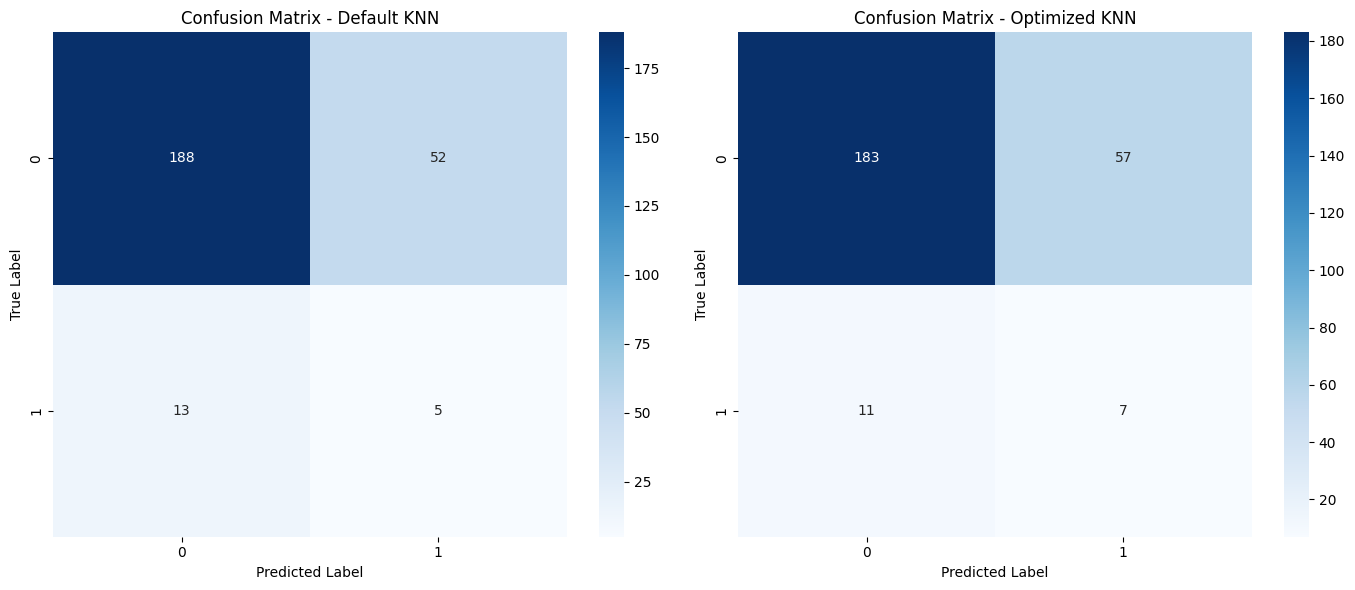

In [79]:
plot_confusion_matrices_side_by_side(y_vald, y_knn_default_model_pred_val, y_knn_best_pred_val, "KNN")

The confusion matrices compare the performance of the default and optimized KNN classifiers on the validation set. The default KNN model correctly classified 188 true negatives and 5 true positives, but it missed 13 positive cases (false negatives) and produced 52 false positives. In contrast, the optimized KNN model, tuned for higher recall, identified 7 true positives and reduced false negatives to 11, albeit with a slight increase in false positives (57) and a minor drop in true negatives (183). This trade-off reflects a **recall-focused improvement**, which is especially important in seismic bump prediction where failing to detect a high-energy event (false negative) can have critical consequences. Overall, the optimized model improves sensitivity toward the minority class and is better aligned with the goal of minimizing missed detections.

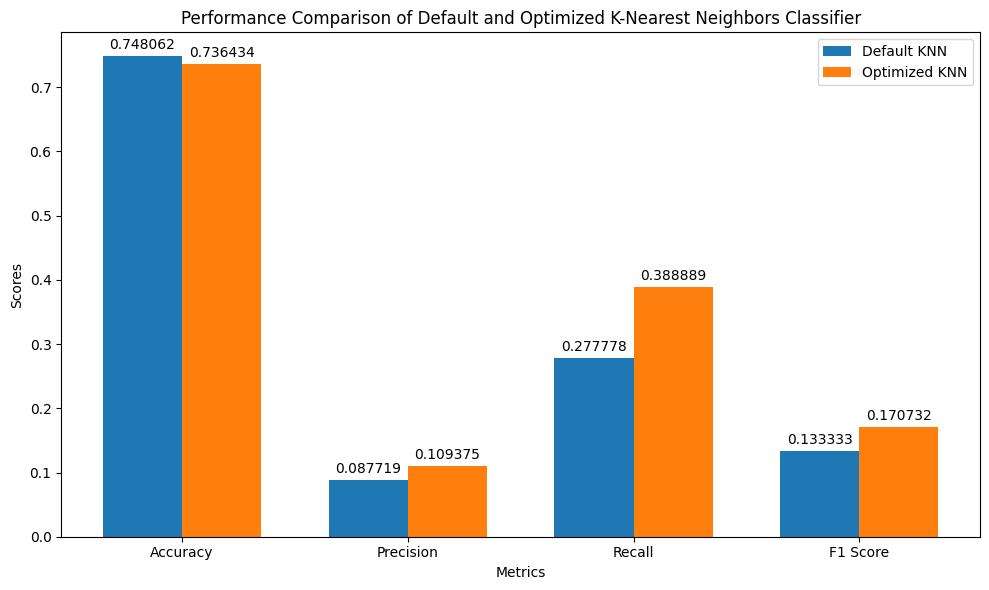

In [80]:
plot_model_comparison(y_vald, y_knn_default_model_pred_val, y_knn_best_pred_val, "K-Nearest Neighbors Classifier", "KNN")

The bar chart compares the performance of the default and optimized K-Nearest Neighbors (KNN) classifiers across four key evaluation metrics: accuracy, precision, recall, and F1 score. While the **default KNN model** achieved slightly higher overall accuracy (0.7481 vs. 0.7364), the **optimized KNN model** significantly outperformed it on **recall** (0.3889 vs. 0.2778) and **F1 score** (0.1707 vs. 0.1333), which are more relevant in the context of imbalanced classification problems like seismic bump prediction. The precision of the optimized model also improved slightly (0.1094 vs. 0.0877), reinforcing that tuning the KNN hyperparameters enhanced the model’s sensitivity to the minority class. This trade-off is a **marginal drop in accuracy for a meaningful gain in recall and F1 score** which supports the use of the optimized model in applications where detecting rare but critical events is essential.

#### Evaluate the models
Perform a comparison between the predictive models. <br>
Report the accuracy, recall, precision and F1-score measures as well as the confusion matrix if it is a classification problem. <br>
Report the R2 score, mean squared error and mean absolute error if it is a regression problem.
______________________________________________________________________________________


In [81]:
def evaluate_model(y_true, y_pred, model_name):
    """
    Evaluate a model using multiple metrics (weighted and macro)
    """
    metrics = {
        'Model': model_name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Weighted Precision': precision_score(y_true, y_pred, average='weighted'),
        'Weighted Recall': recall_score(y_true, y_pred, average='weighted'),
        'Weighted F1 Score': f1_score(y_true, y_pred, average='weighted'),
        'Macro Precision': precision_score(y_true, y_pred, average='macro'),
        'Macro Recall': recall_score(y_true, y_pred, average='macro'),
        'Macro F1 Score': f1_score(y_true, y_pred, average='macro')
    }
    return metrics

In [82]:
def compare_models(y_true, model1_pred, model2_pred, model3_pred, 
                   model1_name, model2_name, model3_name):
    """
    Compare three models using various metrics
    """
    # Calculate metrics for each model
    metrics1 = evaluate_model(y_true, model1_pred, model1_name)
    metrics2 = evaluate_model(y_true, model2_pred, model2_name)
    metrics3 = evaluate_model(y_true, model3_pred, model3_name)
    
    # Create comparison DataFrame
    comparison_df = pd.DataFrame([metrics1, metrics2, metrics3])

    cm_model1 = confusion_matrix(y_true, model1_pred)
    cm_model2 = confusion_matrix(y_true, model2_pred)
    cm_model3 = confusion_matrix(y_true, model3_pred)

    fig, axes = plt.subplots(1, 3, figsize=(14, 4))

    # Confusion matrix for model 1
    sns.heatmap(cm_model1, annot=True, fmt='d', cmap='Blues', ax=axes[0])
    axes[0].set_title(f'Confusion Matrix - Optimized ' + model1_name)
    axes[0].set_xlabel('Predicted Label')
    axes[0].set_ylabel('True Label')
    
    # Confusion matrix for model 2
    sns.heatmap(cm_model2, annot=True, fmt='d', cmap='Blues', ax=axes[1])
    axes[1].set_title(f'Confusion Matrix - Optimized ' + model2_name)
    axes[1].set_xlabel('Predicted Label')
    axes[1].set_ylabel('True Label')

    # Confusion matrix for model 3
    sns.heatmap(cm_model3, annot=True, fmt='d', cmap='Blues', ax=axes[2])
    axes[2].set_title(f'Confusion Matrix - Optimized ' + model3_name)
    axes[2].set_xlabel('Predicted Label')
    axes[2].set_ylabel('True Label')

    plt.tight_layout()
    plt.show()
    
    # Plot comparison bar chart - Accuracy, Weighted Precision, Weighted Recall, Weighted F1 Score
    metrics_to_plot = ['Accuracy', 'Weighted Precision', 'Weighted Recall', 'Weighted F1 Score']
    plt.figure(figsize=(12, 6))
    x = np.arange(len(metrics_to_plot))
    width = 0.25
    
    bars1 = plt.bar(x - width, comparison_df[metrics_to_plot].iloc[0], width, label=model1_name)
    bars2 = plt.bar(x, comparison_df[metrics_to_plot].iloc[1], width, label=model2_name)
    bars3 = plt.bar(x + width, comparison_df[metrics_to_plot].iloc[2], width, label=model3_name)

    # Annotate bars with their values
    for bar in bars1:
        height = bar.get_height()
        plt.annotate(f'{height:.4f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')
    for bar in bars2:
        height = bar.get_height()
        plt.annotate(f'{height:.4f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')
    for bar in bars3:
        height = bar.get_height()
        plt.annotate(f'{height:.4f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')
    
    plt.xlabel('Metrics')
    plt.ylabel('Score')
    plt.title('Model Comparison (Weighted Avg)')
    plt.xticks(x, metrics_to_plot)
    plt.legend()
    plt.show()

    # Plot comparison bar chart - Accuracy, Macro Precision, Macro Recall, Macro F1 Score
    metrics_to_plot = ['Accuracy', 'Macro Precision', 'Macro Recall', 'Macro F1 Score']
    plt.figure(figsize=(12, 6))
    x = np.arange(len(metrics_to_plot))
    width = 0.25
    
    bars1 = plt.bar(x - width, comparison_df[metrics_to_plot].iloc[0], width, label=model1_name)
    bars2 = plt.bar(x, comparison_df[metrics_to_plot].iloc[1], width, label=model2_name)
    bars3 = plt.bar(x + width, comparison_df[metrics_to_plot].iloc[2], width, label=model3_name)

    # Annotate bars with their values
    for bar in bars1:
        height = bar.get_height()
        plt.annotate(f'{height:.4f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')
    for bar in bars2:
        height = bar.get_height()
        plt.annotate(f'{height:.4f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')
    for bar in bars3:
        height = bar.get_height()
        plt.annotate(f'{height:.4f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')
    
    plt.xlabel('Metrics')
    plt.ylabel('Score')
    plt.title('Model Comparison (Macro Avg)')
    plt.xticks(x, metrics_to_plot)
    plt.legend()
    plt.show()
    
    # Print detailed classification reports
    print(f"\nClassification Report for {model1_name}:")
    print(classification_report(y_true, model1_pred))
    print(f"\nClassification Report for {model2_name}:")
    print(classification_report(y_true, model2_pred))
    print(f"\nClassification Report for {model3_name}:")
    print(classification_report(y_true, model3_pred))
    
    return comparison_df

##### Support Vector Machine (SVM)

In [83]:
y_pred_svm = svm_best_model.predict(X_test)

##### Decision Tree Classifier (DTC)

In [84]:
y_pred_dtc = dtc_best_model.predict(X_test)

##### K-Nearest Neighbour (KNN)

In [85]:
y_pred_knn = knn_best_model.predict(X_test)

#### Model Comparison

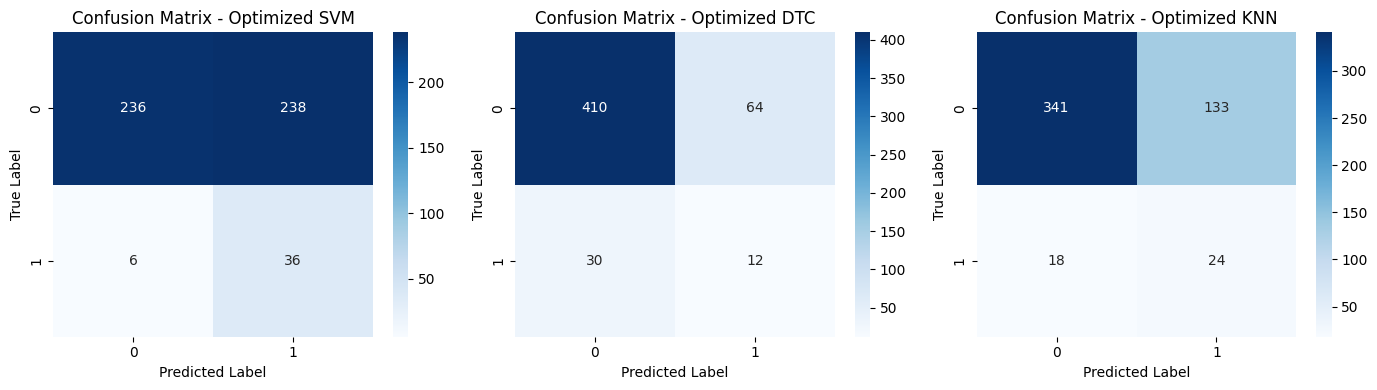

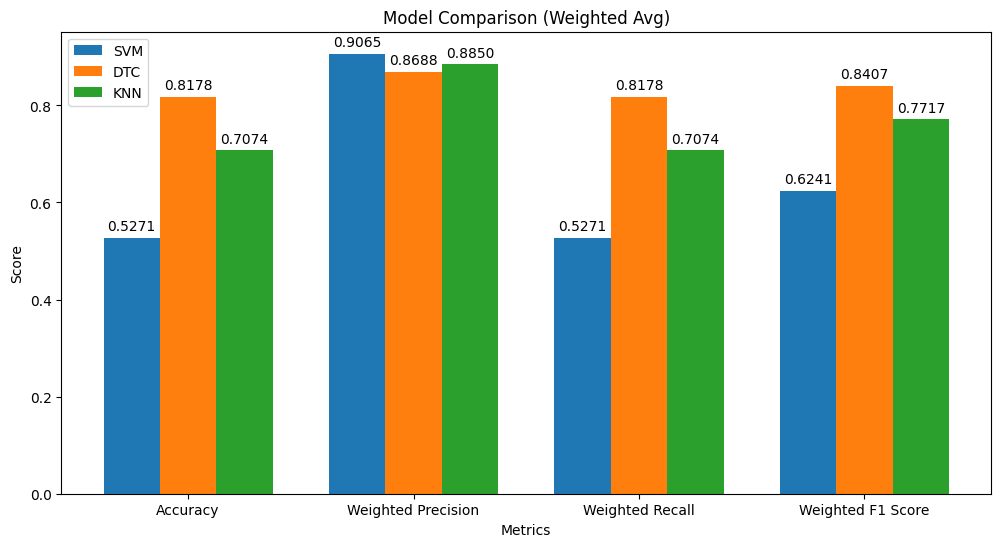

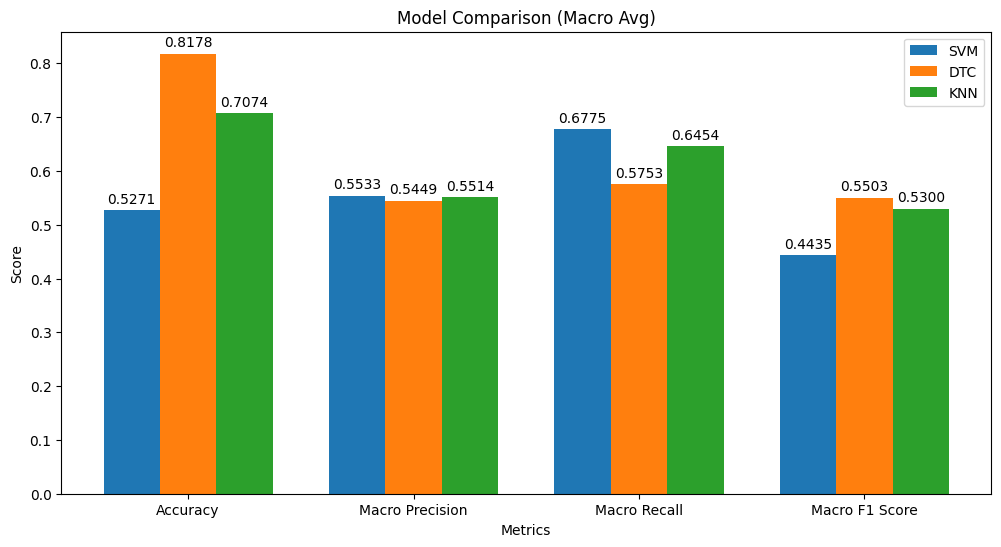


Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.98      0.50      0.66       474
           1       0.13      0.86      0.23        42

    accuracy                           0.53       516
   macro avg       0.55      0.68      0.44       516
weighted avg       0.91      0.53      0.62       516


Classification Report for DTC:
              precision    recall  f1-score   support

           0       0.93      0.86      0.90       474
           1       0.16      0.29      0.20        42

    accuracy                           0.82       516
   macro avg       0.54      0.58      0.55       516
weighted avg       0.87      0.82      0.84       516


Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.95      0.72      0.82       474
           1       0.15      0.57      0.24        42

    accuracy                           0.71       516
   macro avg       0.55      0.6

In [86]:
results = compare_models(
    y_test,
    y_pred_svm,
    y_pred_dtc,
    y_pred_knn,
    model1_name="SVM",
    model2_name="DTC",
    model3_name="KNN"
    )

In [87]:
# Print detailed results
print("\nDetailed Model Comparison:")
print(results.to_string(index=False))


Detailed Model Comparison:
Model  Accuracy  Weighted Precision  Weighted Recall  Weighted F1 Score  Macro Precision  Macro Recall  Macro F1 Score
  SVM  0.527132            0.906524         0.527132           0.624106         0.553297      0.677517        0.443533
  DTC  0.817829            0.868824         0.817829           0.840686         0.544856      0.575347        0.550273
  KNN  0.707364            0.884989         0.707364           0.771720         0.551363      0.645419        0.529967


#### **Model Evaluation Description:**
The **model evaluation** compares the performance of three optimized classifiers: **Support Vector Machine (SVM)**, **Decision Tree Classifier (DTC)**, and **K-Nearest Neighbors (KNN)**. The evaluation focuses on key metrics such as **accuracy**, **precision**, **recall**, and **F1-score**, with a particular emphasis on **recall** due to the imbalanced nature of the dataset. The goal is to identify the model best suited for detecting high-energy seismic bumps (class 1), where minimizing false negatives is critical.

##### **Key Observations:**

1. Confusion Matrices:
- SVM: Demonstrated the highest sensitivity to class 1, correctly identifying 36 true positives. However, it misclassified 232 class 0 instances as class 1, resulting in a high false positive rate.
- DTC: Achieved the highest true negatives (410), indicating strong performance for class 0. However, it struggled with class 1, missing 30 instances (false negatives).
- KNN: Balanced performance, with fewer false negatives (18) than DTC and fewer false positives (133) than SVM, making it a middle-ground option.

2. Bar Charts:
- Weighted Metrics: xxxxx
- Macro Metrics: SVM led in macro recall (0.67), highlighting its ability to handle class imbalance effectively. DTC achieved the highest macro F1-score (0.55), indicating balanced performance across both classes.

3. Classification Reports:
- SVM: Achieved the highest recall for class 1 (0.86), making it the most sensitive model for detecting high-energy seismic bumps. However, its precision for class 1 was low (0.13), reflecting a high false positive rate.
- DTC: Delivered balanced performance with high accuracy (0.82) and strong precision for class 0 (0.93). However, its recall for class 1 was lower (0.29), leading to more missed detections.
- KNN: Performed moderately, with a recall of 0.57 for class 1 and better precision than SVM (0.24). However, it struggled with overall accuracy (0.71).

##### **Conclusion**: 

- **SVM is the most suitable model** for this task due to its ability to handle imbalanced datasets effectively and its superior recall and F1-score, which are critical for identifying high-energy seismic bumps.

- DTC not as performant as SVM in terms of recall and F1-score but can be a good alternative if interpretability is a priority, as it provides clear decision-making rules.

- KNN is less preferred due to its computational cost and sensitivity to hyperparameters, but it can still be useful for smaller datasets or as a baseline model.